In [69]:
# License John Lambert

import numpy as np
import matplotlib.pyplot as plt

from scipy.misc import imread, imresize, imsave
import scipy.misc

import os, sys
import csv
import os.path

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
# DIRECTORIES

final_project_dir = '/Users/johnlambert/Documents/Stanford_2015-2016/SpringQuarter_2015-2016/CS_231A/FinalProject/'
data_dir = 'DendriticSpineData'
xy_coords_file = 'Results_june_6_2011_415-5_sh.csv'
image_dir = 'June 6 2011 (415-5)'  #'June_6_2011_415-5_Series008'

cropped_positive_examples_dir = 'Cropped36By36PositiveExamples'
cropped_negative_examples_dir = 'Cropped36By36NegativeExamples'

In [71]:
path_to_data_dir = os.path.join( final_project_dir , data_dir )
path_to_xy_coords_file = os.path.join( path_to_data_dir , xy_coords_file )
path_to_image_dir = os.path.join( path_to_data_dir, image_dir )

In [72]:
resize_scale = 2.0

imageToLocations = {}

with open( path_to_xy_coords_file ) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        z = row["Slice"]
        if len(str(z))==1:
            z = "0"+str(z)
        z = str(z)
        fileName = 'June 6 2011 (415-5)_Series008_z0' + z + '_ch00' #.tif'
        #fileName = "June 8 2011 (411-6 c1)_Series009_z0"+z+"_ch00"
        x_center = ( float( row["XM"] ) * 34.4086 ) / resize_scale
        y_center = ( float( row["YM"] ) * 34.4086 ) / resize_scale
        if fileName in imageToLocations: # if not found in dictionary
            imageToLocations[fileName].append( [x_center, y_center ])
        else: # if found in dictionary
            imageToLocations[fileName] = [ [x_center, y_center ] ]
            
print imageToLocations

{'June 6 2011 (415-5)_Series008_z036_ch00': [[234.70106059999998, 352.0859995], [209.35912670000002, 358.8128808], [58.0128996, 394.5290076], [427.870941, 496.516098], [394.7870721, 496.9806141]], 'June 6 2011 (415-5)_Series008_z035_ch00': [[331.8537427, 399.4150288], [153.8924635, 360.5505151]], 'June 6 2011 (415-5)_Series008_z045_ch00': [[181.1784833, 371.16556820000005], [319.86234559999997, 443.182768]], 'June 6 2011 (415-5)_Series008_z028_ch00': [[312.4472923, 415.2945977], [402.408577, 474.4085725]], 'June 6 2011 (415-5)_Series008_z005_ch00': [[55.8795664, 27.148385400000002]], 'June 6 2011 (415-5)_Series008_z033_ch00': [[329.20428050000004, 392.7569647], [82.7182744, 353.66879509999995], [25.1526866, 384.4472878], [137.10106670000002, 393.4451367], [153.47956029999997, 386.71825540000003], [325.60858179999997, 432.12040310000003]], 'June 6 2011 (415-5)_Series008_z012_ch00': [[91.0451556, 70.9161246], [230.709663, 212.6107394], [264.0688007, 229.95267379999999], [289.204283, 264.

In [73]:
from PIL import Image

# add to save, the following arguments: optimize=True, progressive=True

yourpath = path_to_image_dir # os.getcwd()
print 'yourpath',yourpath
for root, dirs, files in os.walk(yourpath, topdown=False): # files is the list of all of the files
    for name in files:
        print 'name',name
        print
        print(os.path.join(root, name))
        if os.path.splitext(os.path.join(root, name))[1].lower() == ".tif":
            
            os.remove( os.path.join(root, name) )
            if os.path.isfile(os.path.splitext(os.path.join(root, name))[0] + ".jpg"):
                print "A jpeg file already exists for %s" % name
            # If a jpeg is *NOT* present, create one from the tiff.
            else:
                outfile = os.path.splitext(os.path.join(root, name))[0] + ".jpg"
                try:
                    im = Image.open(os.path.join(root, name)).convert('RGB')
                    print "Generating jpeg for %s" % name
                    im.thumbnail(im.size)
                    im.save(outfile, "JPEG", quality=100)
                except Exception, e:
                    print e

yourpath /Users/johnlambert/Documents/Stanford_2015-2016/SpringQuarter_2015-2016/CS_231A/FinalProject/DendriticSpineData/June 6 2011 (415-5)
name .DS_Store

/Users/johnlambert/Documents/Stanford_2015-2016/SpringQuarter_2015-2016/CS_231A/FinalProject/DendriticSpineData/June 6 2011 (415-5)/.DS_Store
name June 6 2011 (415-5)_Series005_z000_ch00.jpg

/Users/johnlambert/Documents/Stanford_2015-2016/SpringQuarter_2015-2016/CS_231A/FinalProject/DendriticSpineData/June 6 2011 (415-5)/June 6 2011 (415-5)_Series005_z000_ch00.jpg
name June 6 2011 (415-5)_Series005_z001_ch00.jpg

/Users/johnlambert/Documents/Stanford_2015-2016/SpringQuarter_2015-2016/CS_231A/FinalProject/DendriticSpineData/June 6 2011 (415-5)/June 6 2011 (415-5)_Series005_z001_ch00.jpg
name June 6 2011 (415-5)_Series005_z002_ch00.jpg

/Users/johnlambert/Documents/Stanford_2015-2016/SpringQuarter_2015-2016/CS_231A/FinalProject/DendriticSpineData/June 6 2011 (415-5)/June 6 2011 (415-5)_Series005_z002_ch00.jpg
name June 6 2011 (415-5

In [74]:
# We'll Cropy 36 by 36 pixel patches

import copy

def in_range(center, xmin, xmax, ymin, ymax):
    x,y = center
    if x > xmin and x < xmax:
        if y < ymin and y > ymax:
            return 1
    return 0

def slide_one_image(image, groundTruthCoordinates, window_sz, k ):
    # if the coords of the ground truth don't fall within the patch's xmin, xmax, ymin, ymax, 
    # this is a negative example
    
    # otherwise, this is a positive example
    
    for x_start in range(k):
        for y_start in range(k):
            x_min = x_start * window_sz
            x_max = x_min + window_sz
            y_max = y_start * window_sz
            y_min = y_max + window_sz
            imageToChange = copy.deepcopy(image)
            crop = imageToChange[ x_min:x_max, y_max:y_min, :]
            print 'Cropped Image has shape', crop.shape
            containsDendriticSpine = 0
            for xyCoordPair in groundTruthCoordinates:
                result = in_range( xyCoordPair , x_min,x_max, y_min, y_max)
                if result == 1:
                    containsDendriticSpine = 1
            if containsDendriticSpine == 1:
                print 'This was a dendritic spine'
                plt.imshow( crop.astype('uint8') )
                plt.savefig( 'outfileDemoPositive.jpg' )
                plt.show()
                #print x_start, y_start, "x_start, y_start"
                
            else:
                print 'This was NOT a dendritic spine'
                plt.imshow( crop.astype('uint8') )
                plt.savefig( 'outfileDemoNegative.jpg' )
                plt.show()

14

June 6 2011 (415-5)_Series005_z000_ch00
June 6 2011 (415-5)_Series005_z001_ch00
June 6 2011 (415-5)_Series005_z002_ch00
June 6 2011 (415-5)_Series005_z003_ch00
June 6 2011 (415-5)_Series005_z004_ch00
June 6 2011 (415-5)_Series005_z005_ch00
June 6 2011 (415-5)_Series005_z006_ch00
June 6 2011 (415-5)_Series005_z007_ch00
June 6 2011 (415-5)_Series005_z008_ch00
June 6 2011 (415-5)_Series005_z009_ch00
June 6 2011 (415-5)_Series005_z010_ch00
June 6 2011 (415-5)_Series005_z011_ch00
June 6 2011 (415-5)_Series005_z012_ch00
June 6 2011 (415-5)_Series005_z013_ch00
June 6 2011 (415-5)_Series005_z014_ch00
June 6 2011 (415-5)_Series005_z015_ch00
June 6 2011 (415-5)_Series005_z016_ch00
June 6 2011 (415-5)_Series005_z017_ch00
June 6 2011 (415-5)_Series005_z018_ch00
June 6 2011 (415-5)_Series005_z019_ch00
June 6 2011 (415-5)_Series005_z020_ch00
June 6 2011 (415-5)_Series005_z021_ch00
June 6 2011 (415-5)_Series005_z022_ch00
June 6 2011 (415-5)_Series005_z023_ch00
June 6 2011 (415-5)_Series005_z024_c

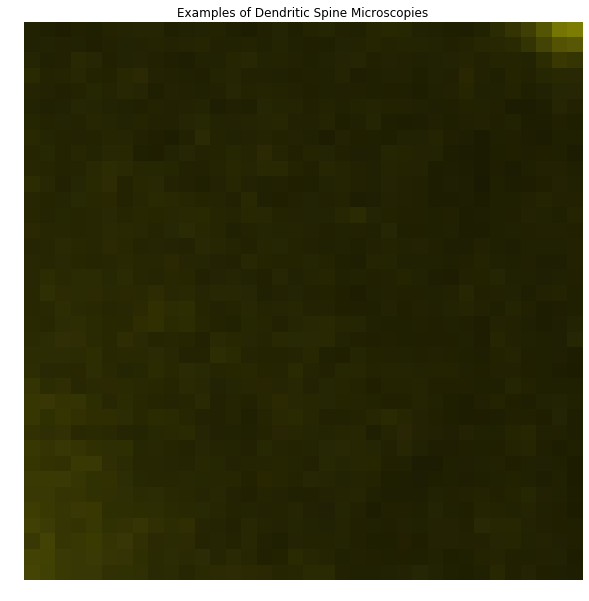

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


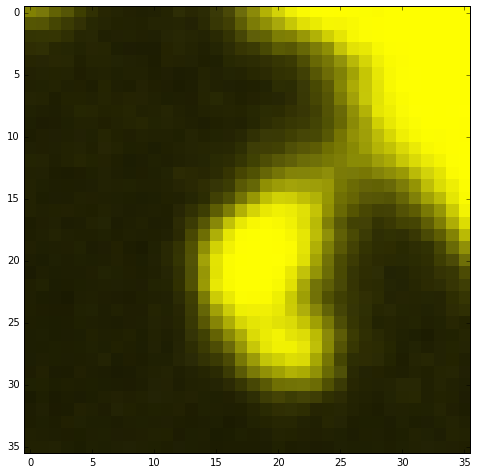

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


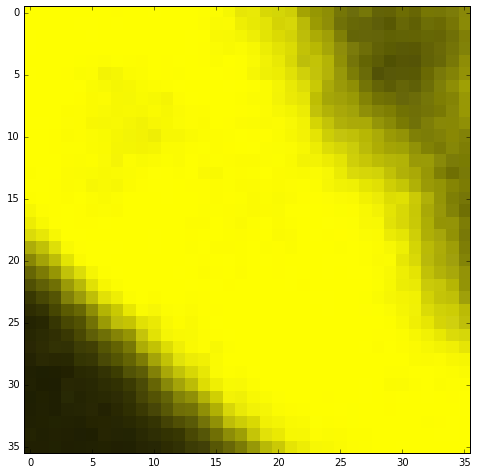

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


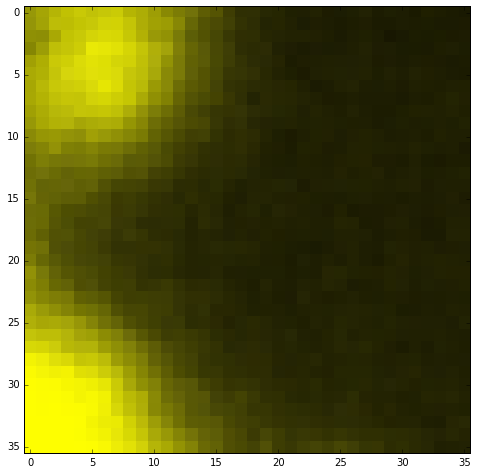

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


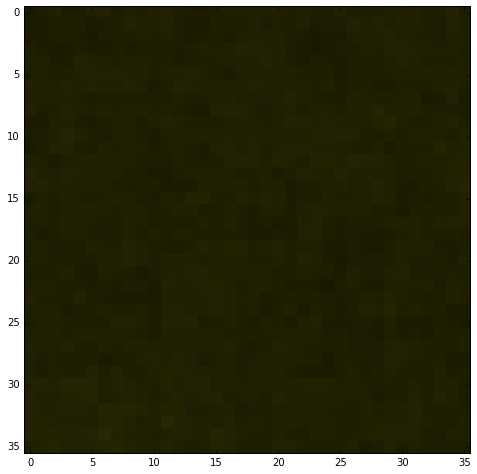

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


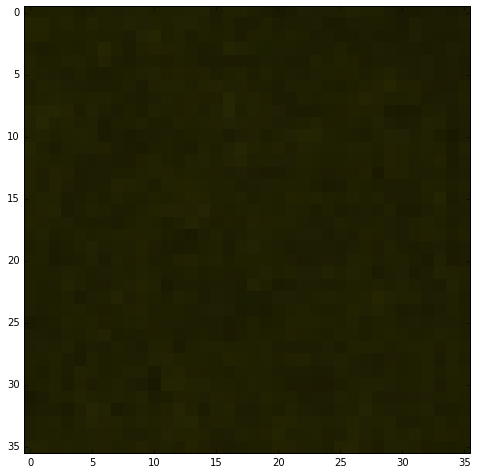

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


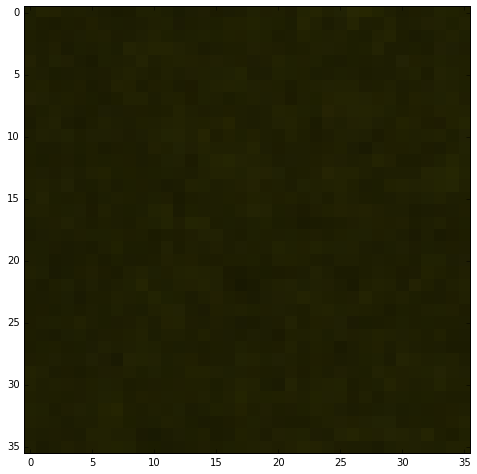

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


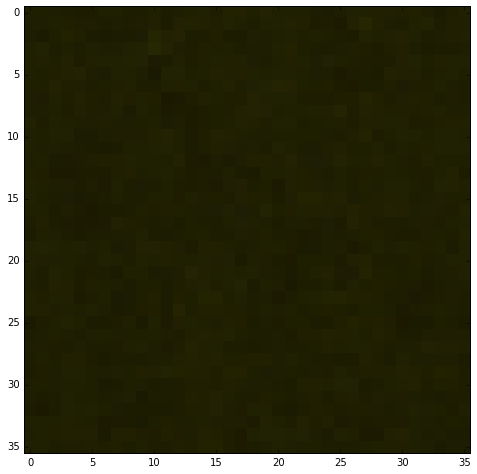

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


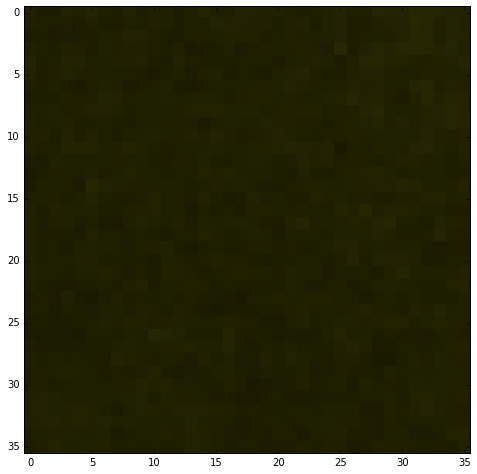

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


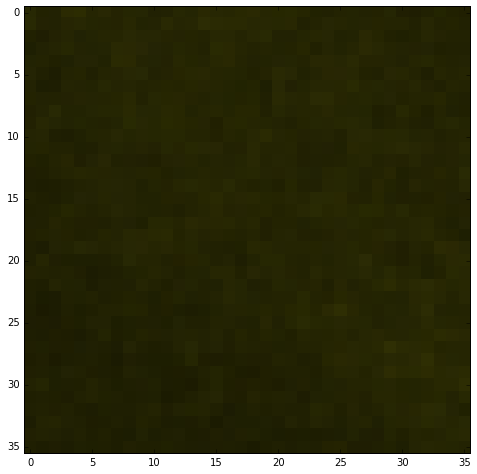

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


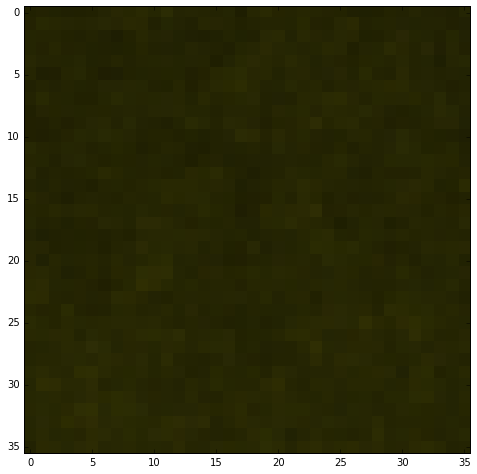

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


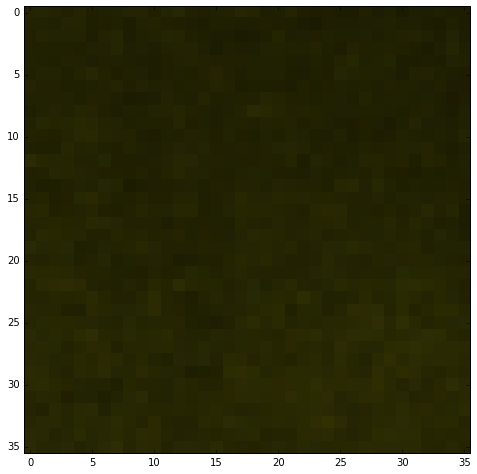

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


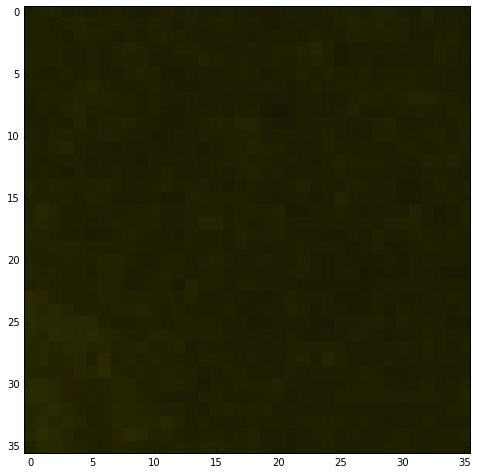

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


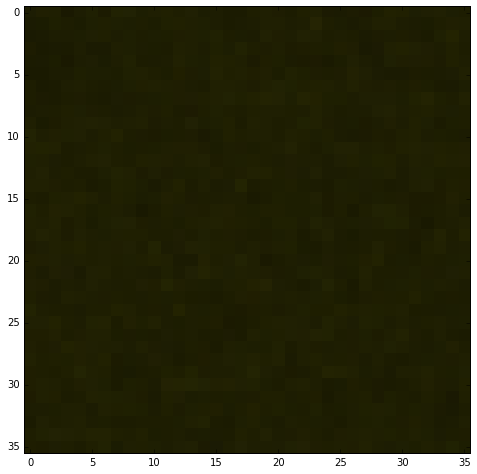

Cropped Image has shape (36, 36, 3)
This was a dendritic spine


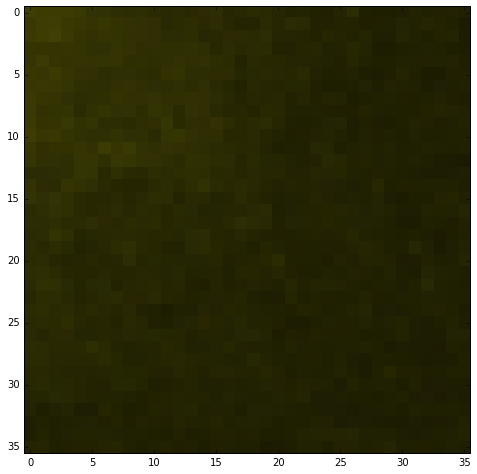

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


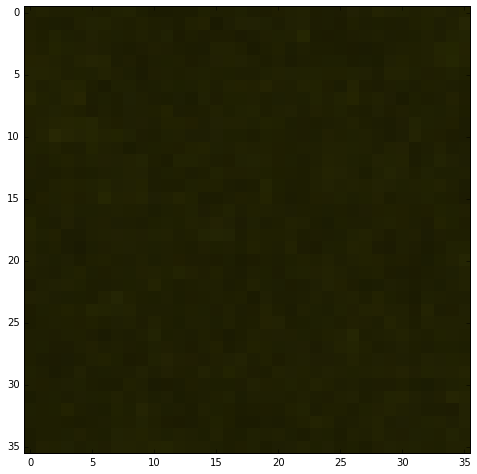

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


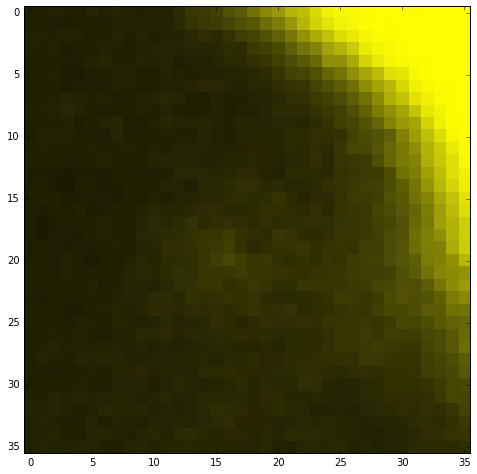

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


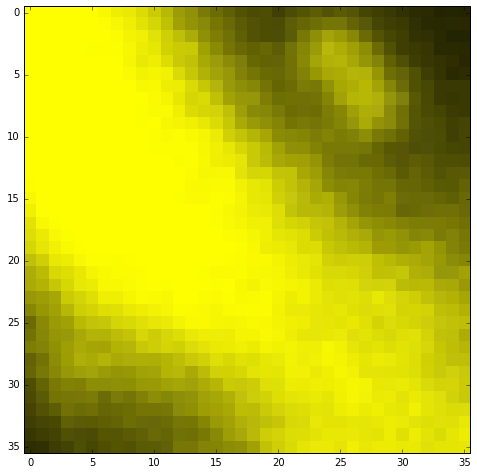

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


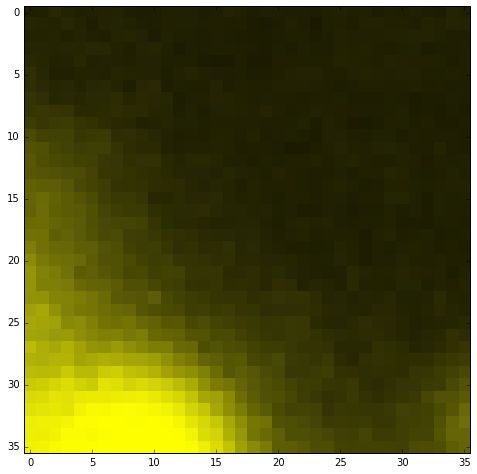

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


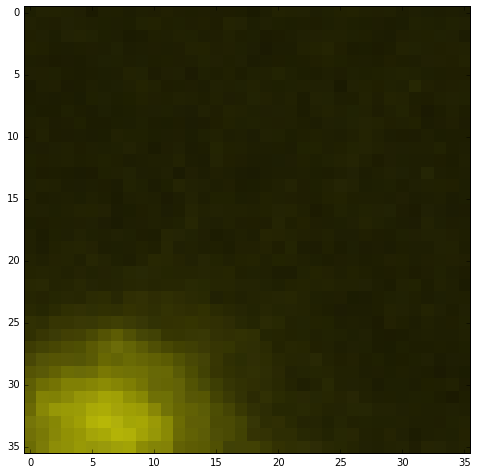

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


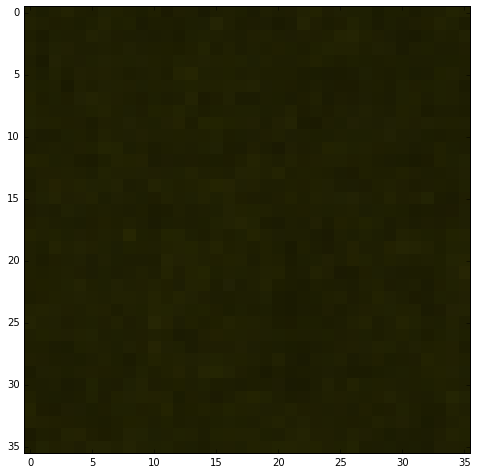

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


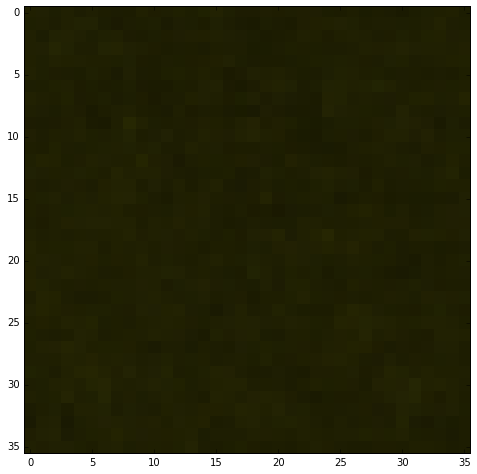

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


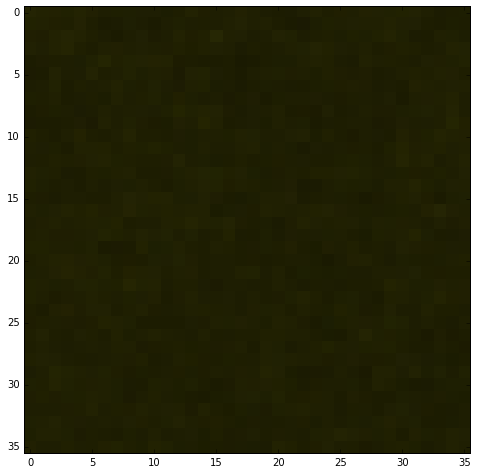

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


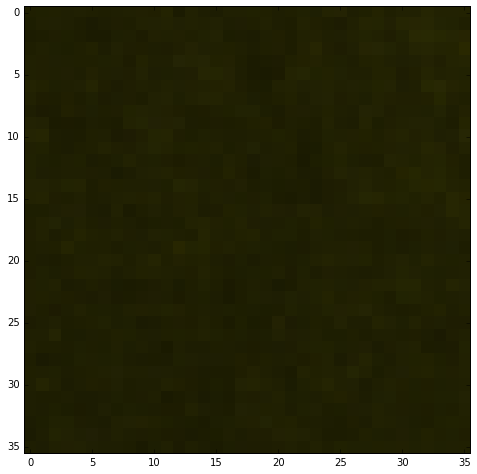

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


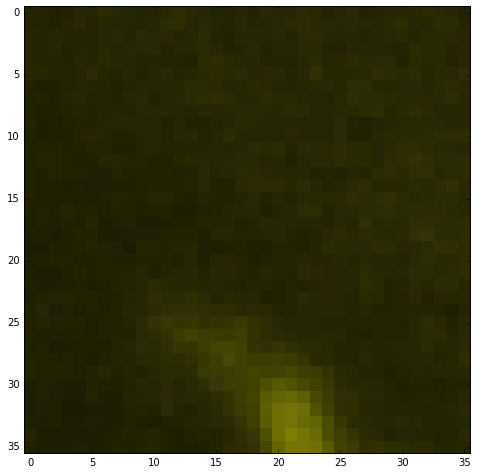

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


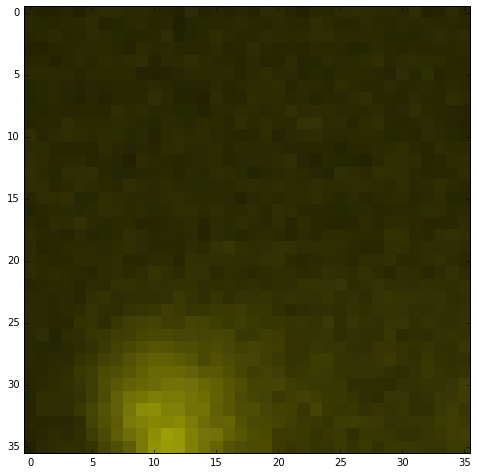

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


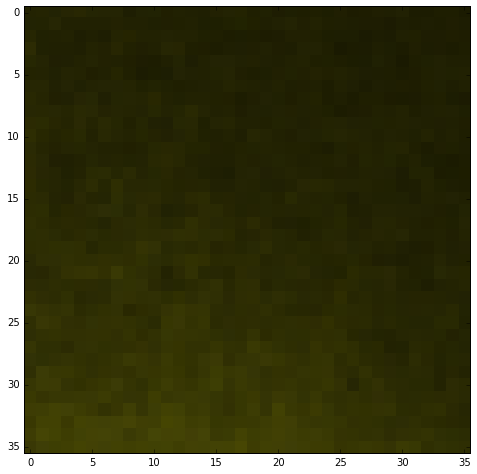

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


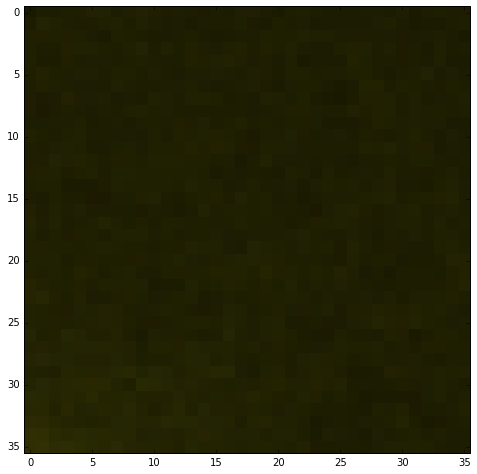

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


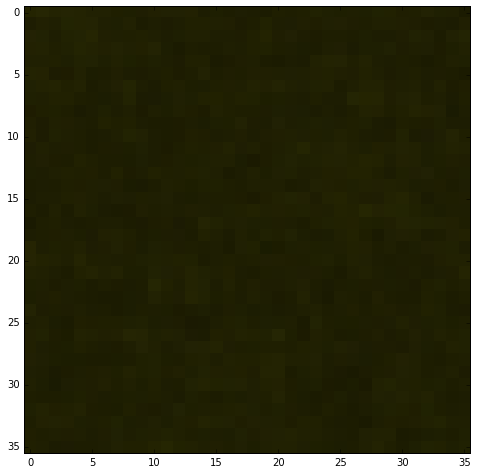

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


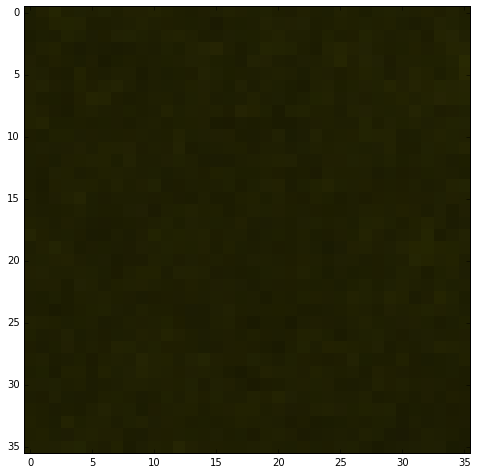

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


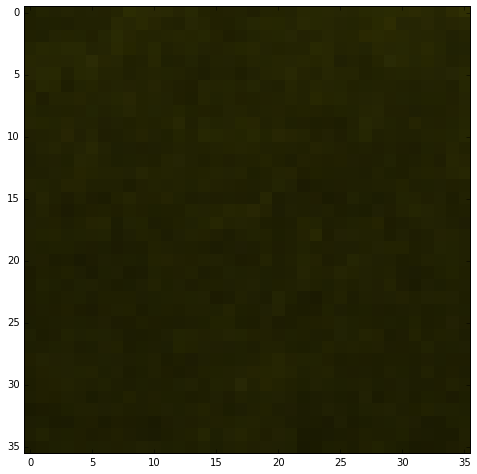

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


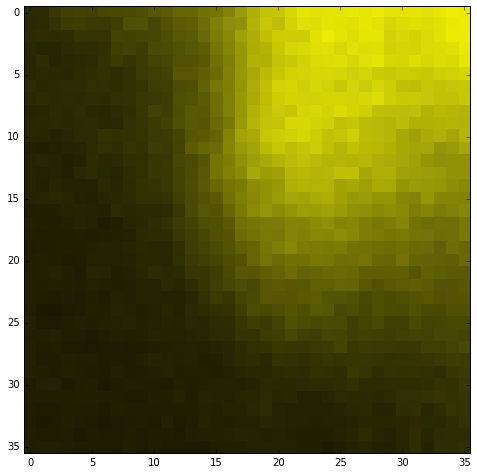

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


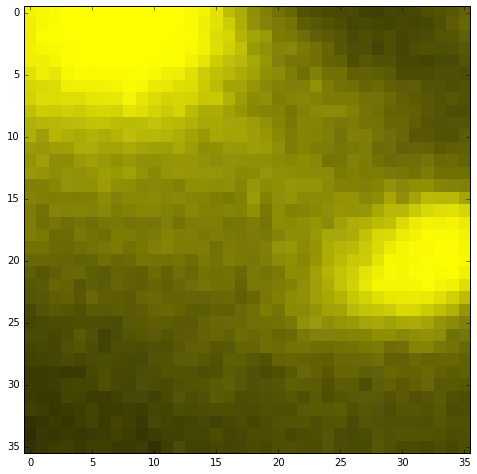

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


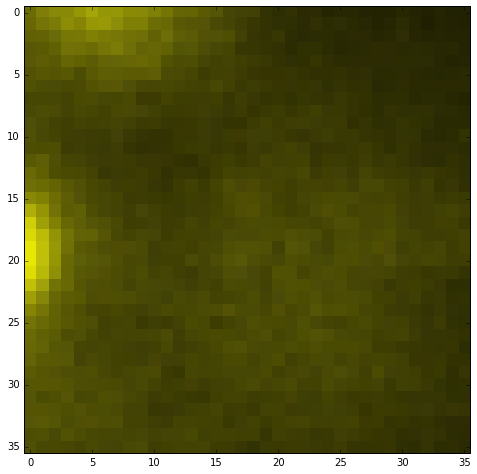

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


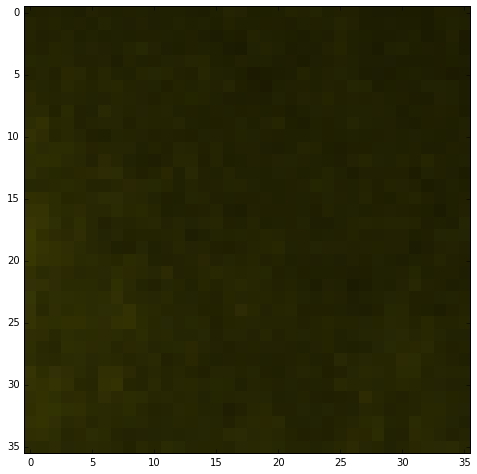

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


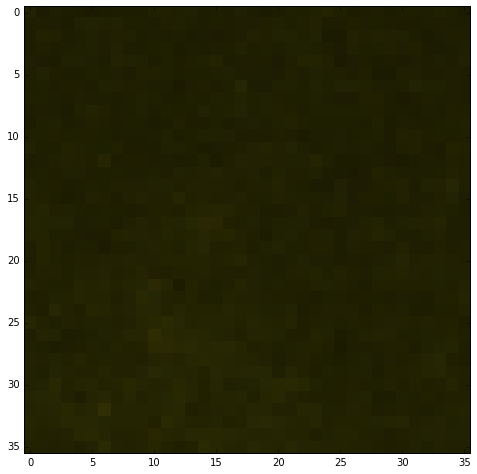

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


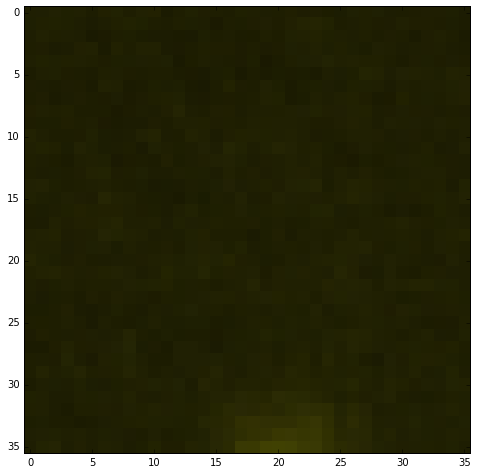

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


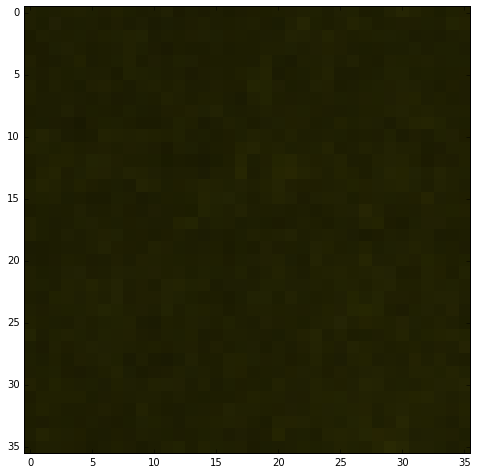

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


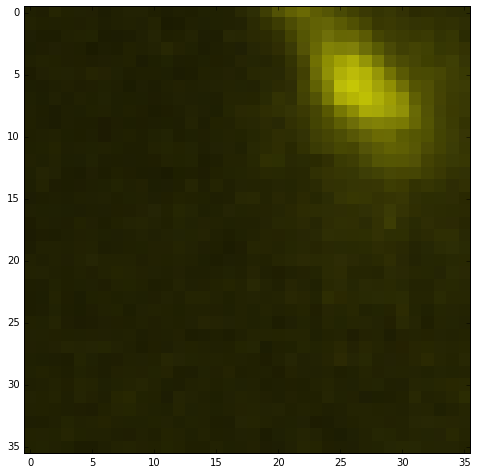

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


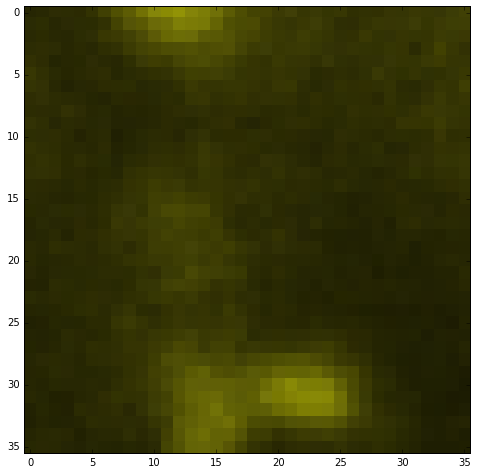

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


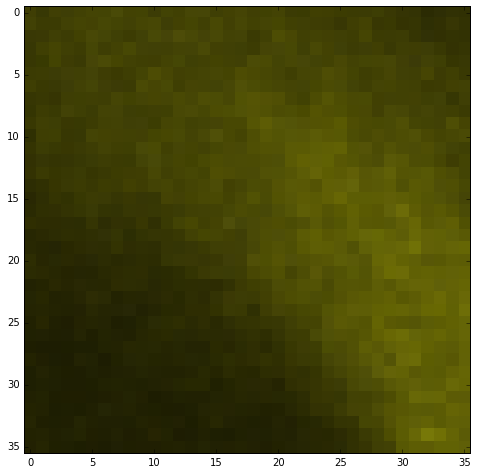

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


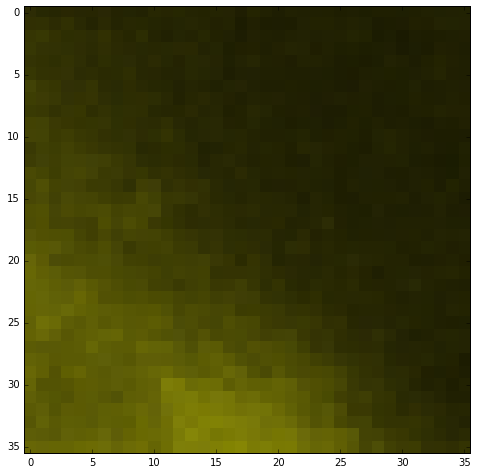

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


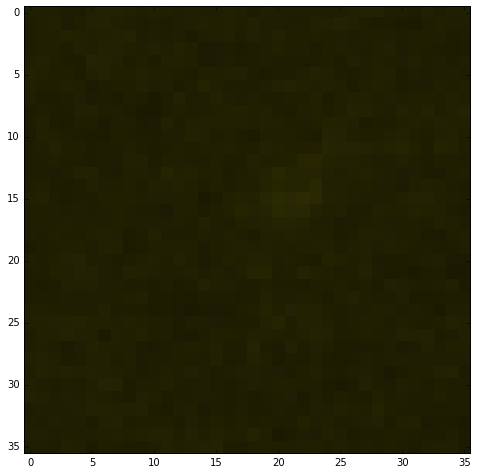

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


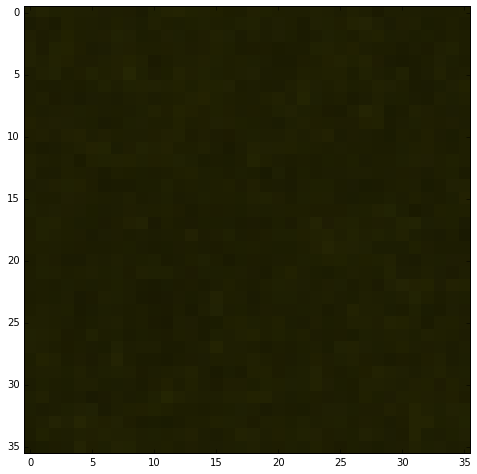

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


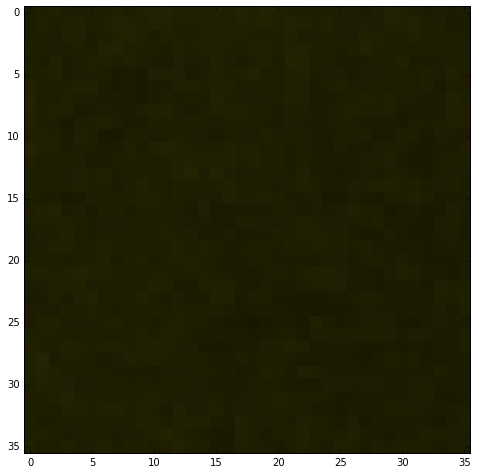

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


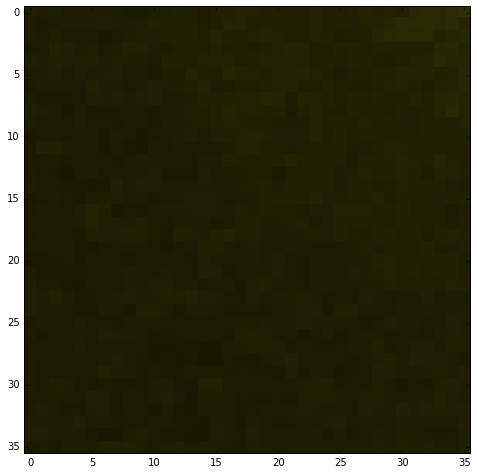

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


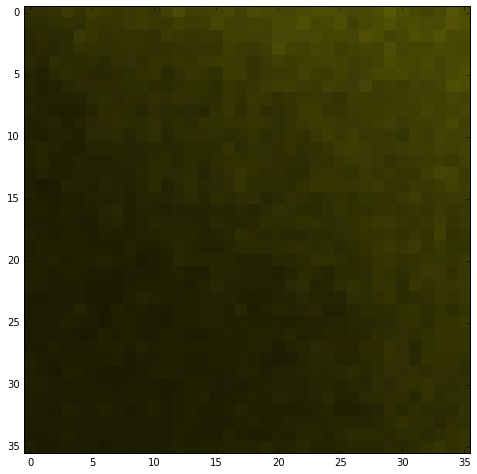

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


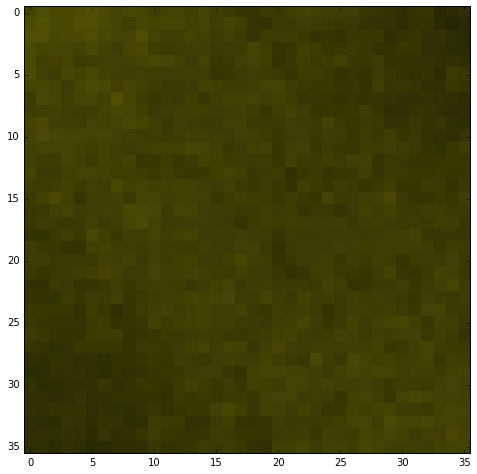

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


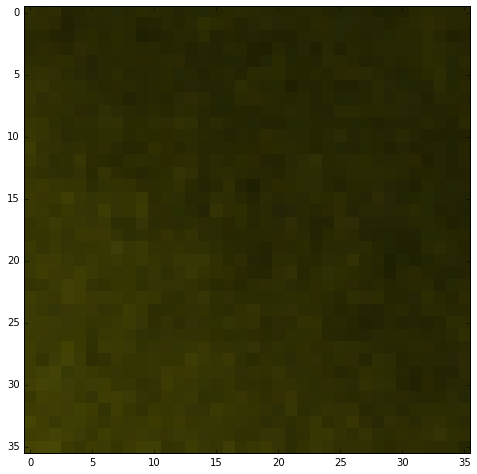

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


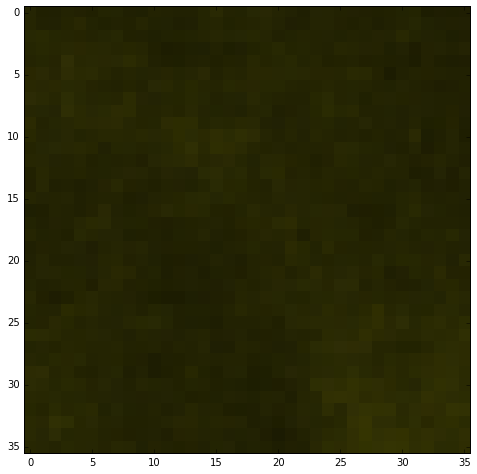

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


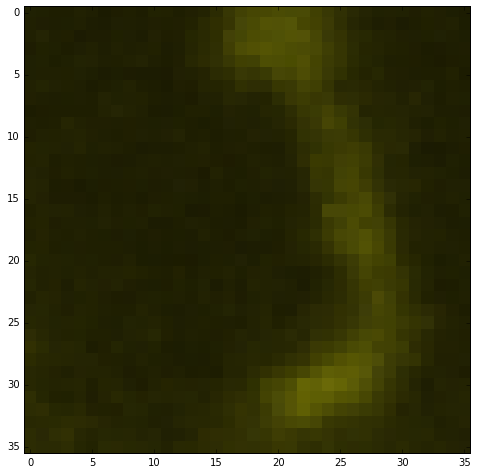

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


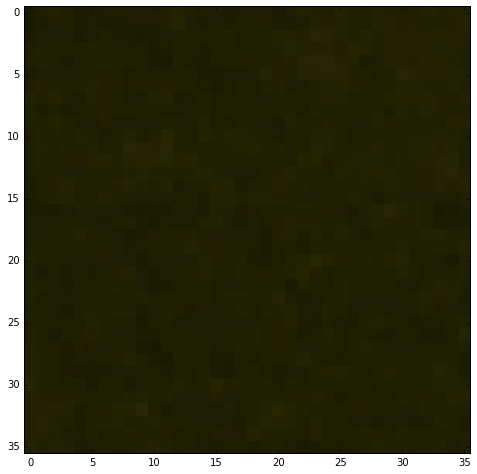

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


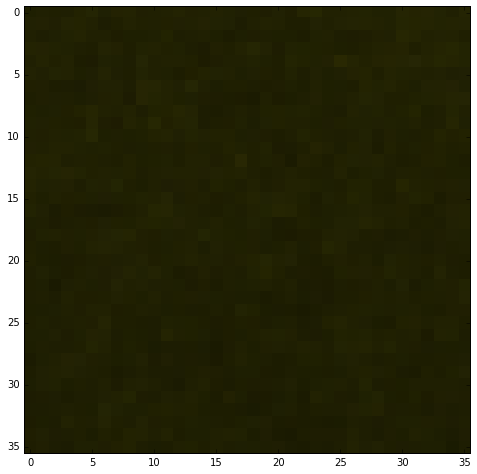

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


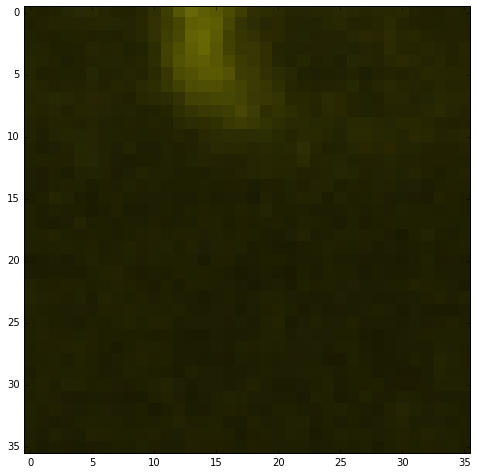

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


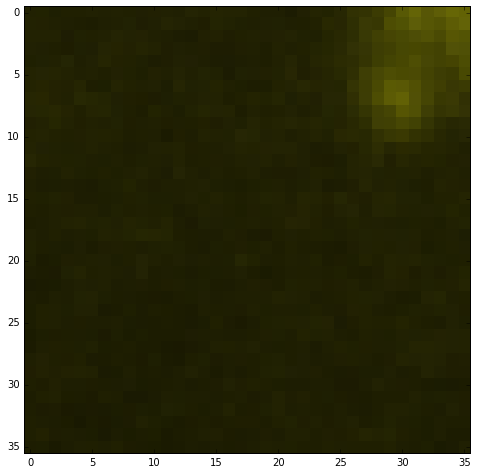

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


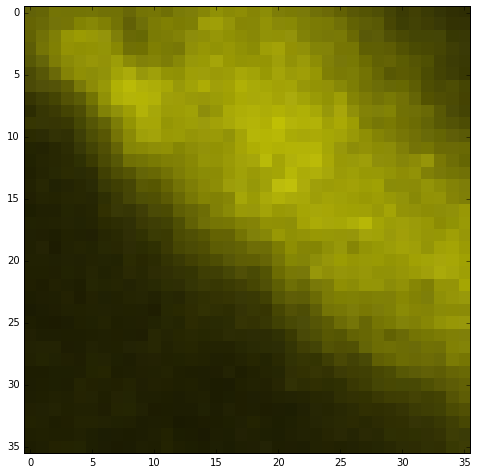

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


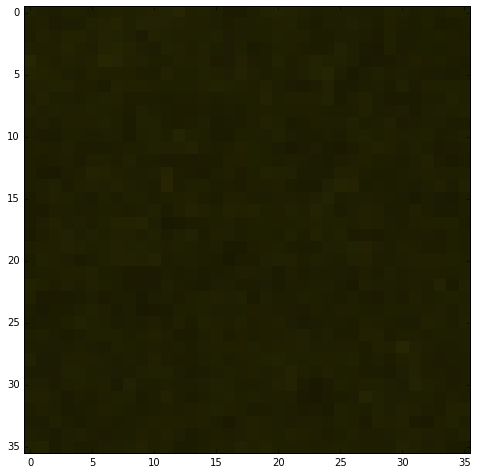

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


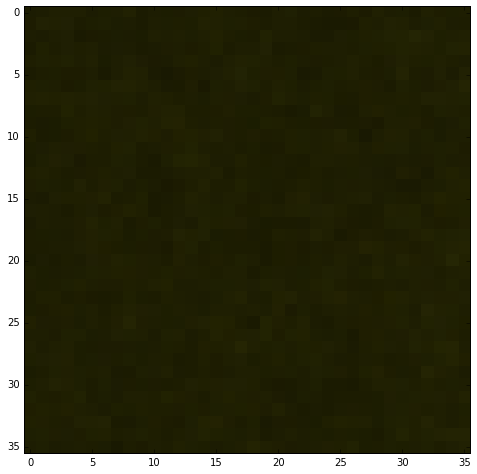

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


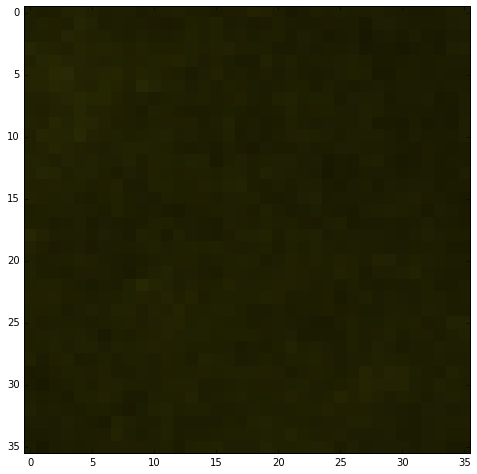

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


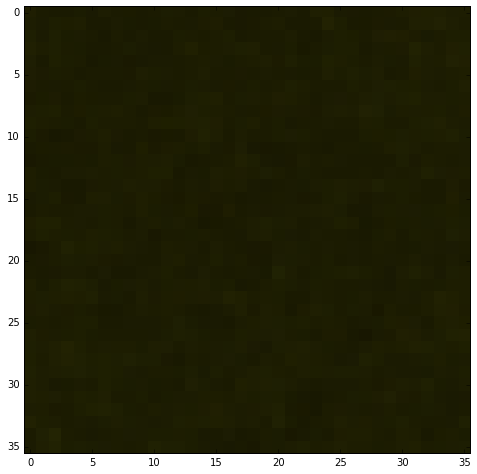

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


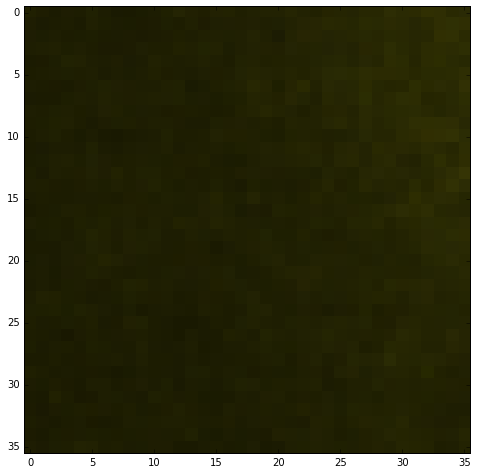

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


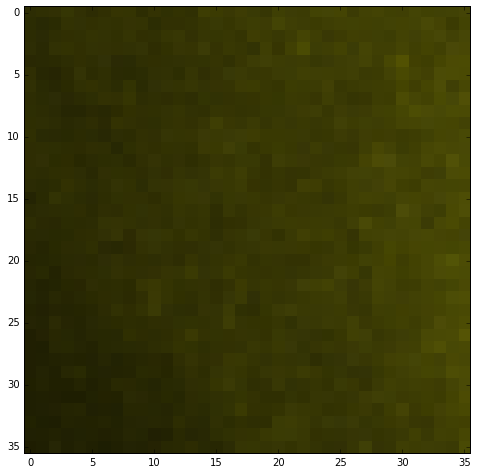

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


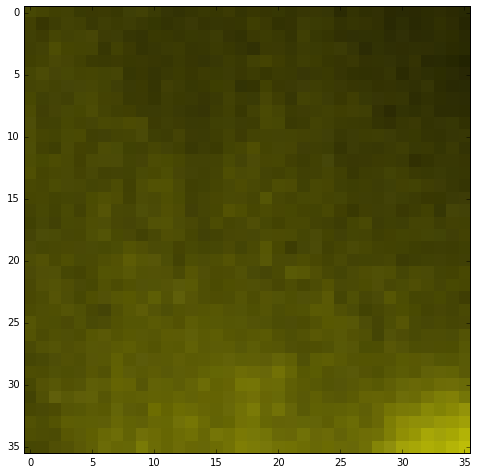

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


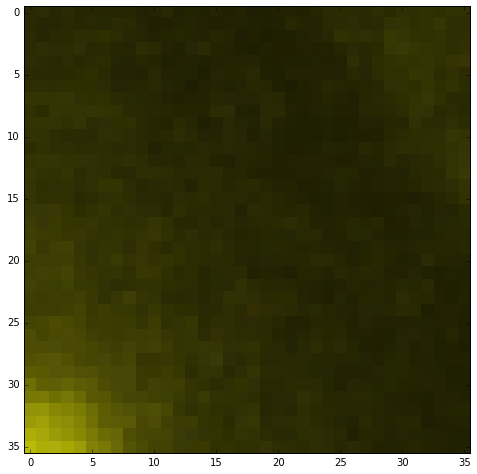

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


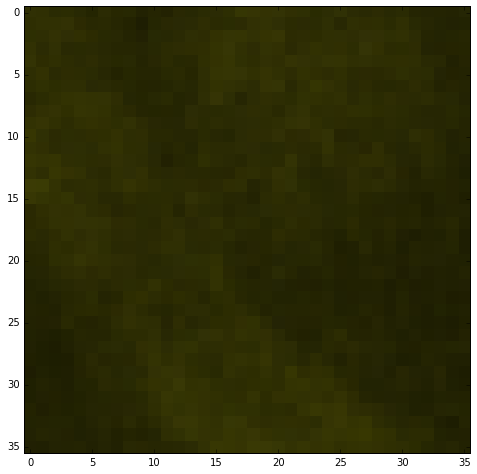

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


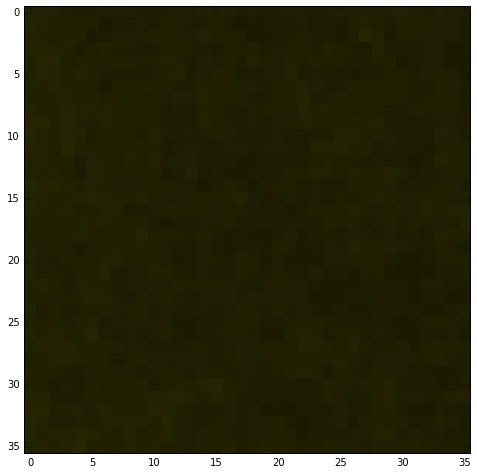

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


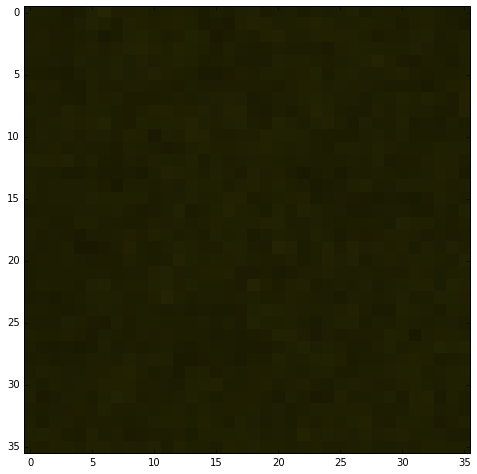

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


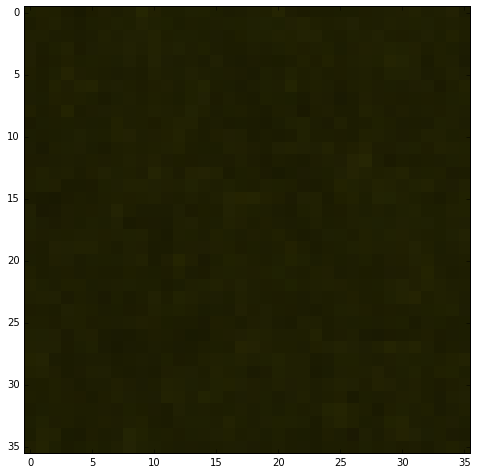

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


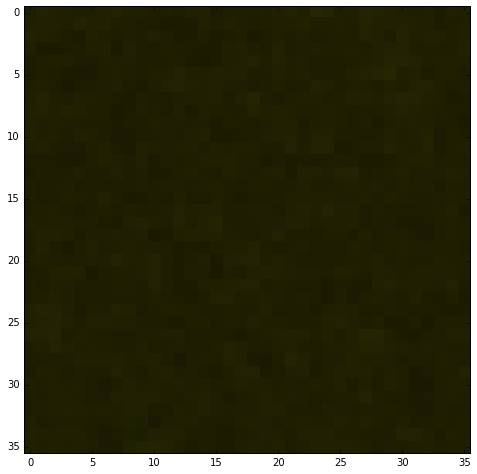

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


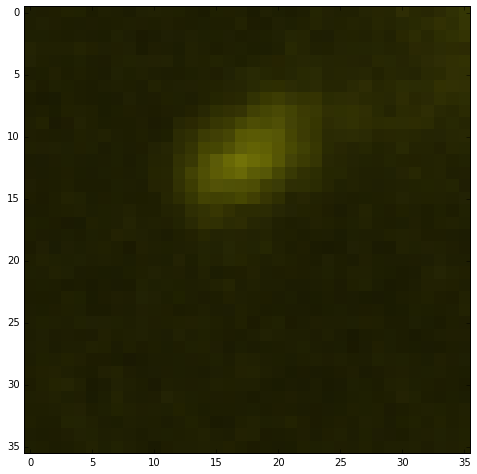

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


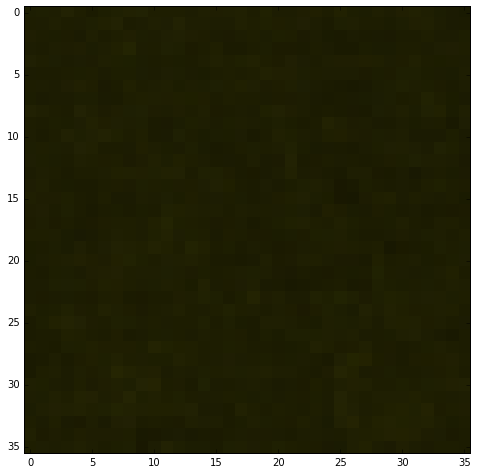

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


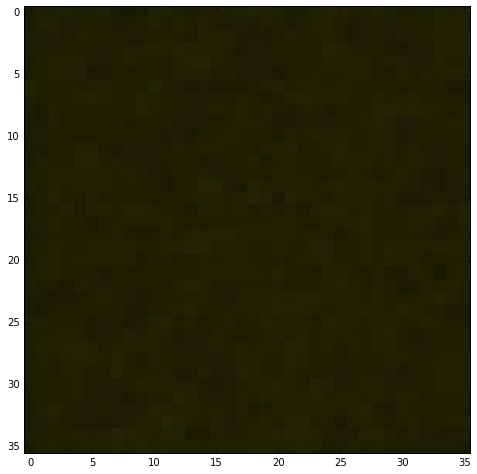

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


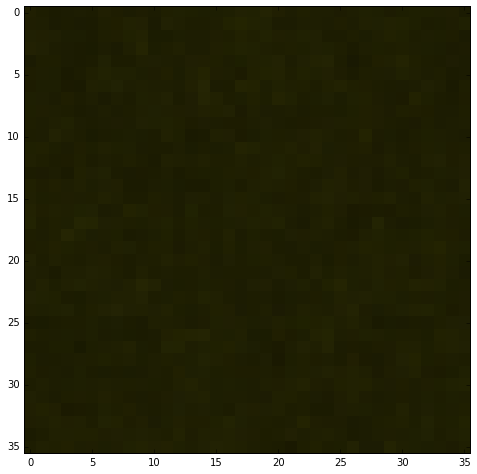

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


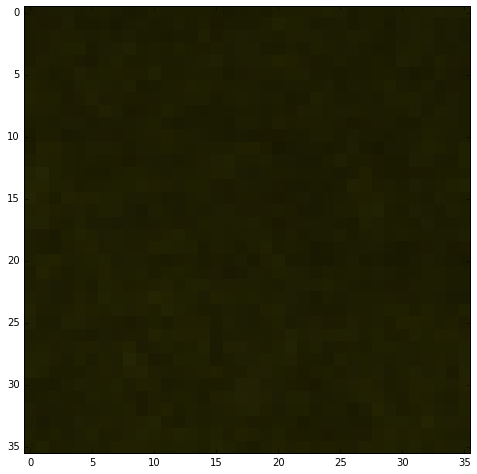

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


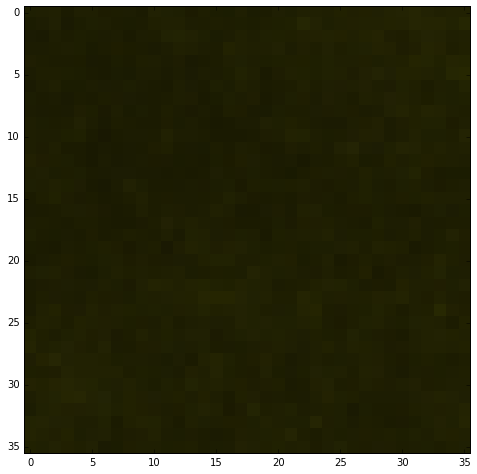

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


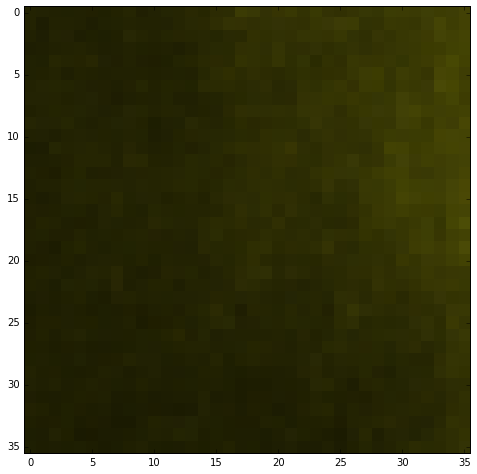

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


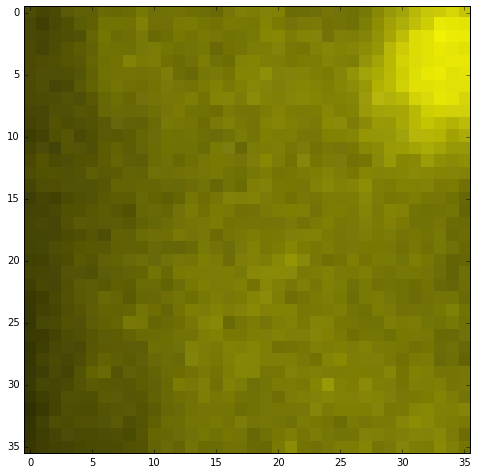

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


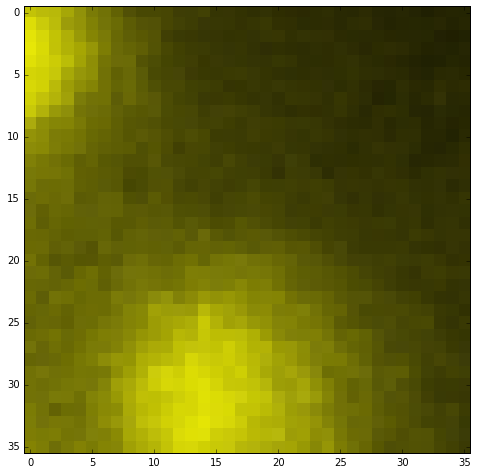

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


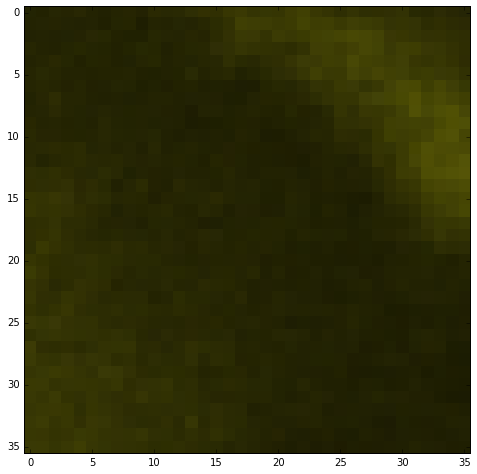

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


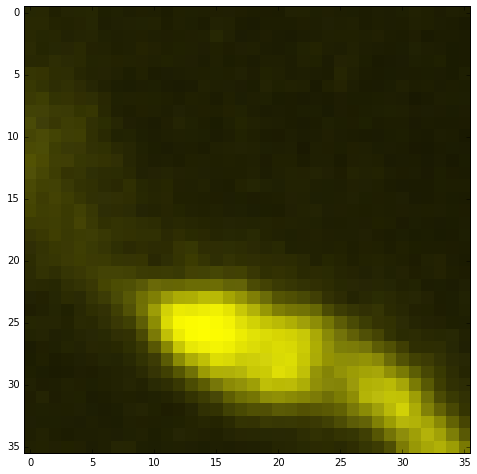

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


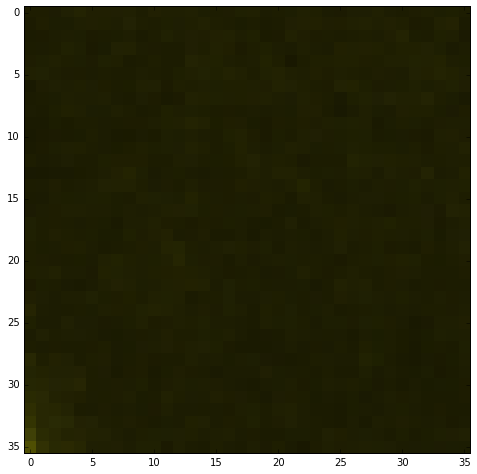

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


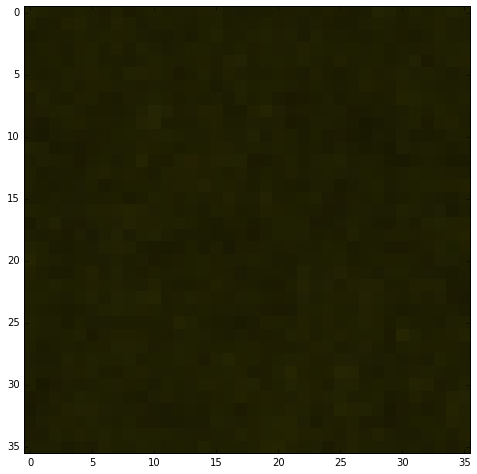

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


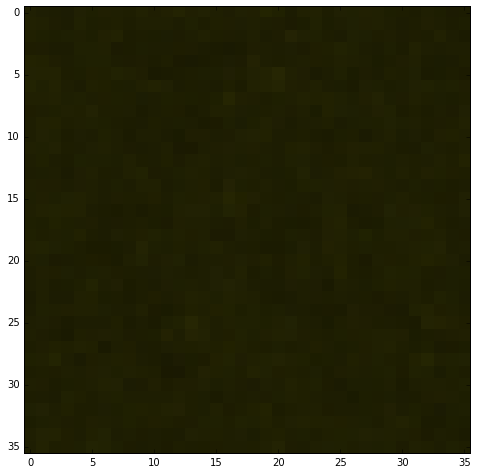

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


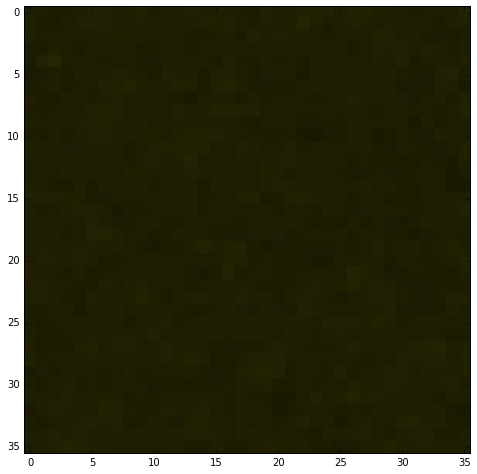

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


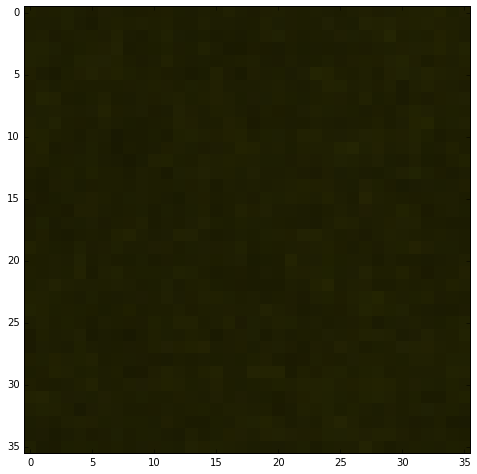

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


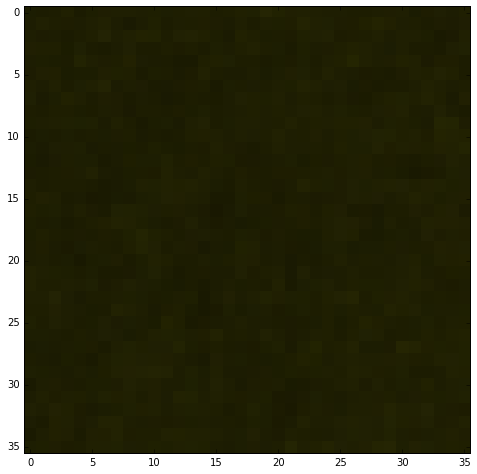

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


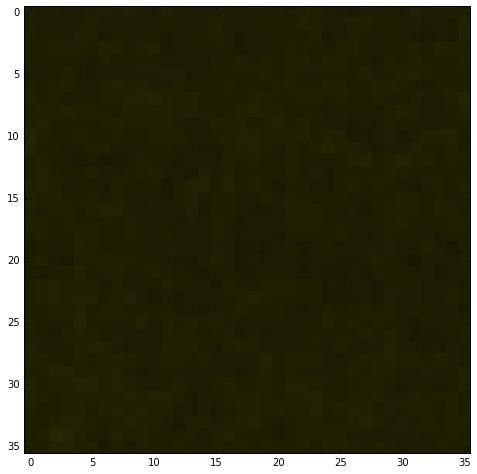

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


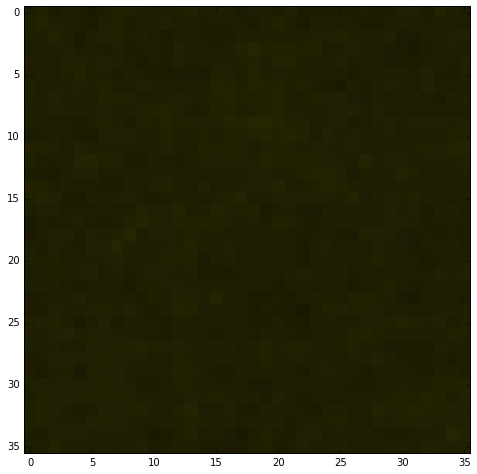

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


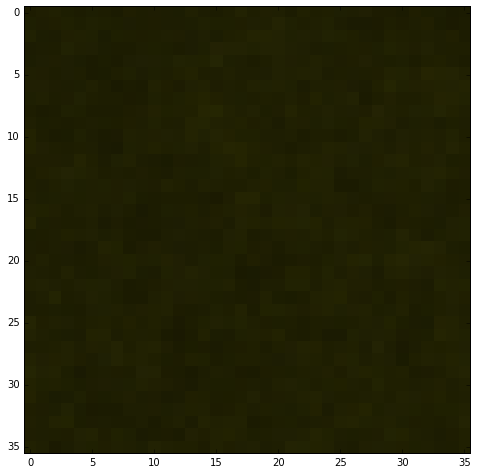

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


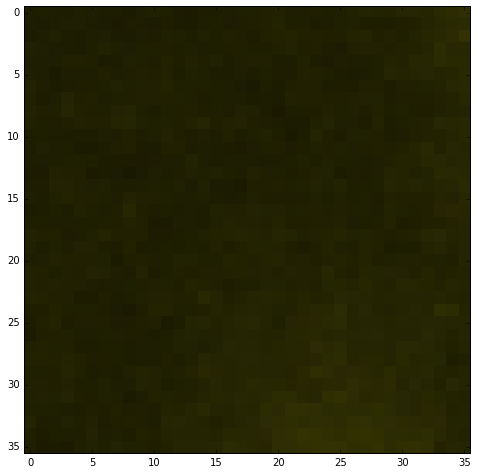

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


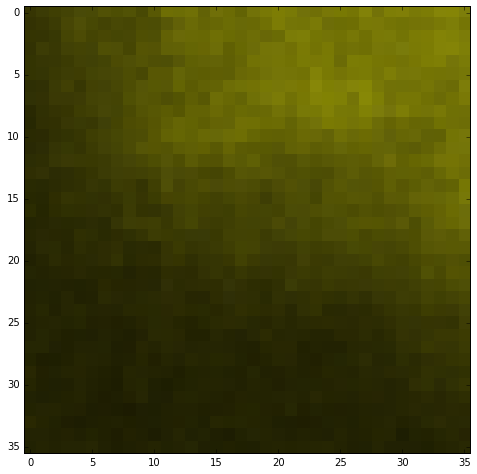

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


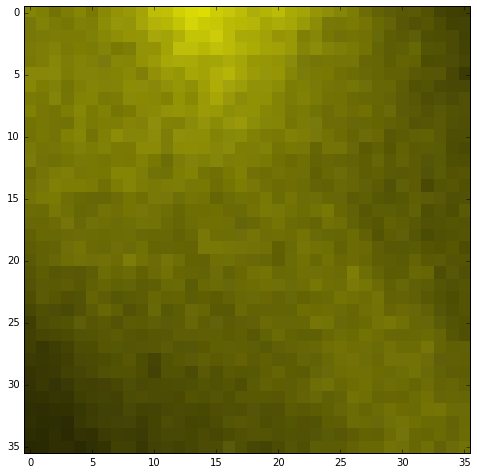

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


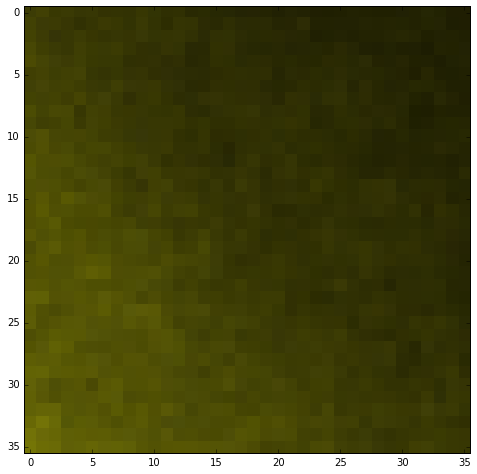

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


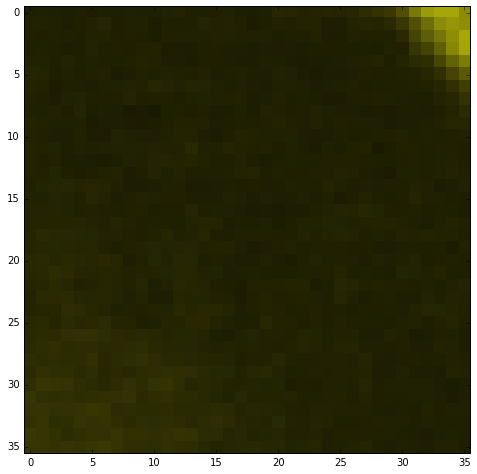

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


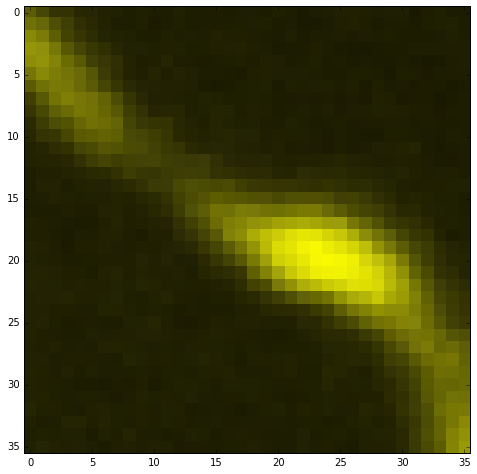

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


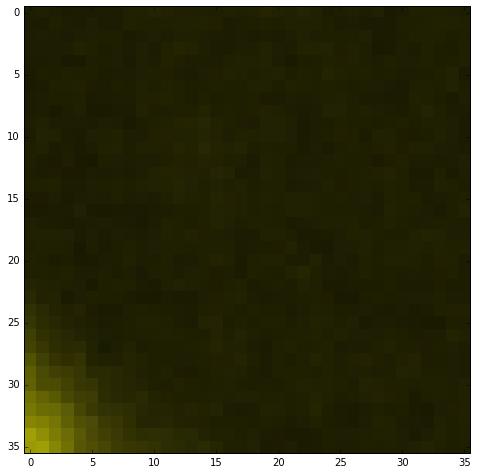

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


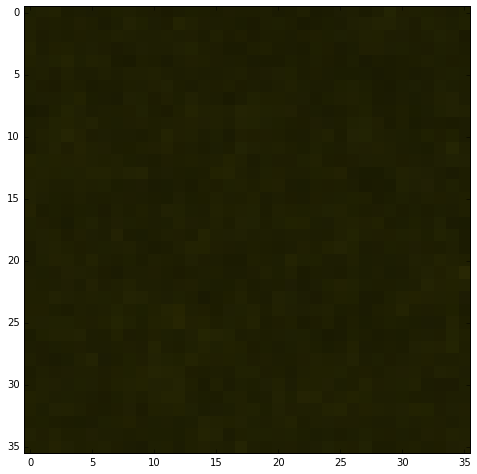

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


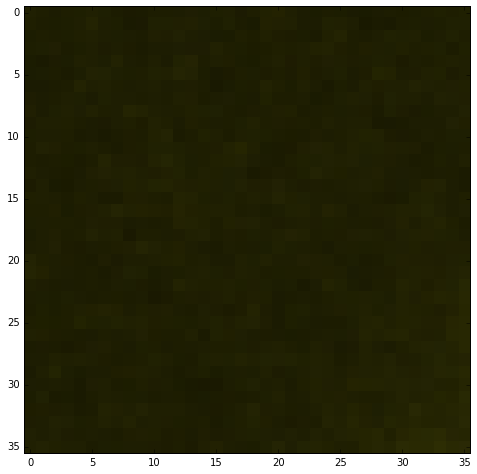

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


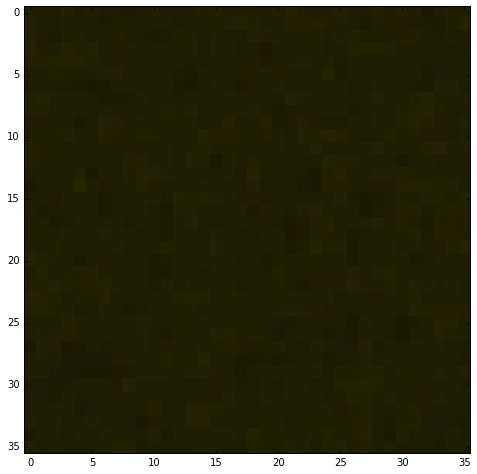

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


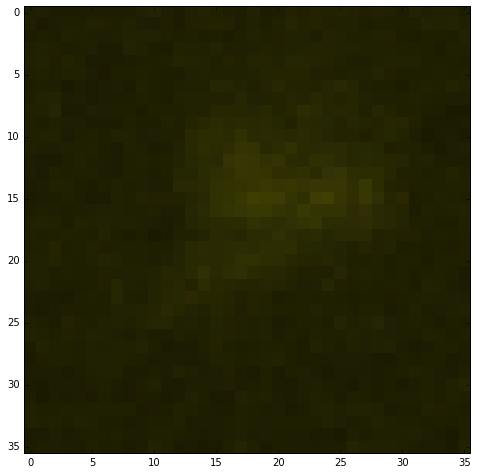

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


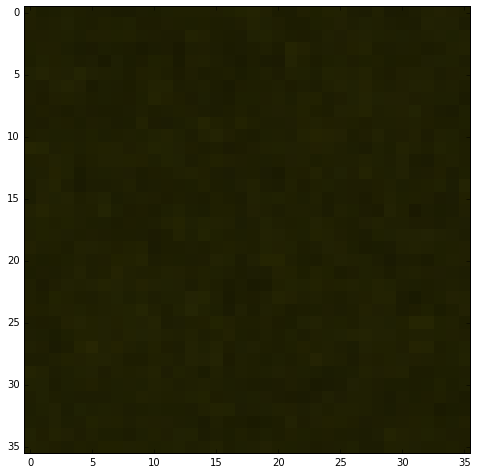

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


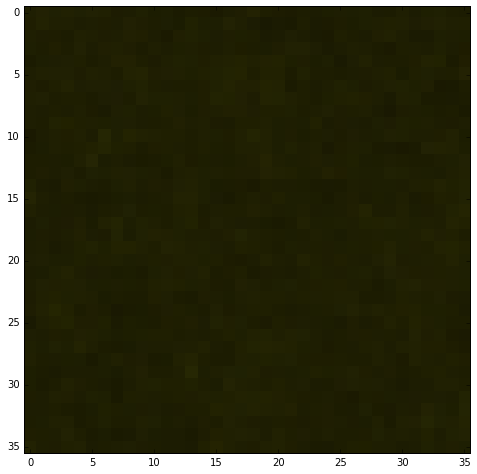

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


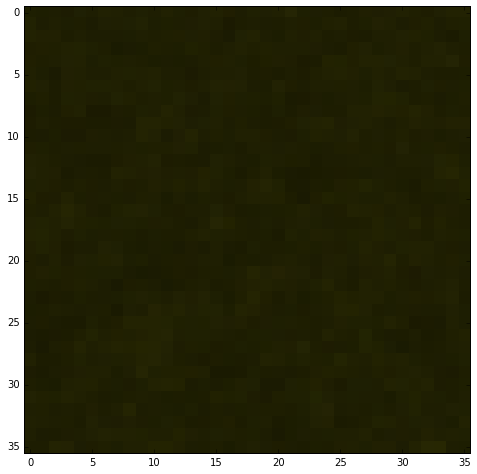

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


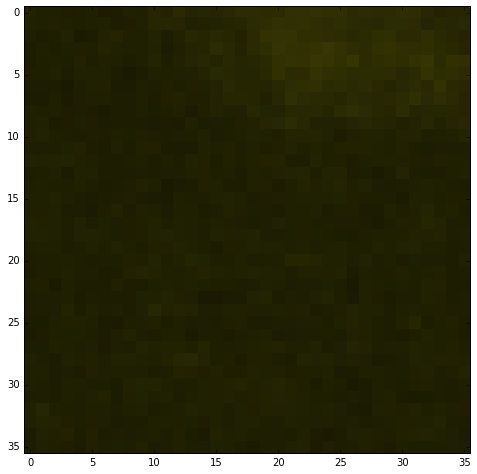

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


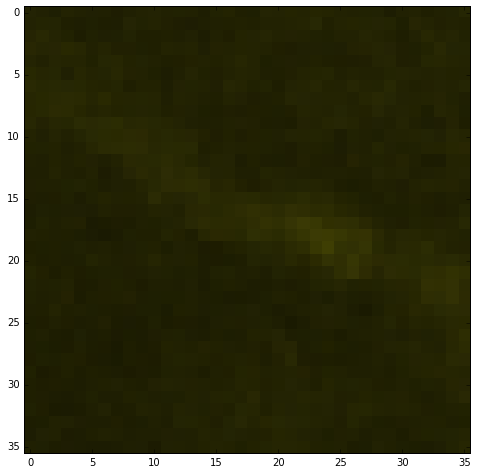

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


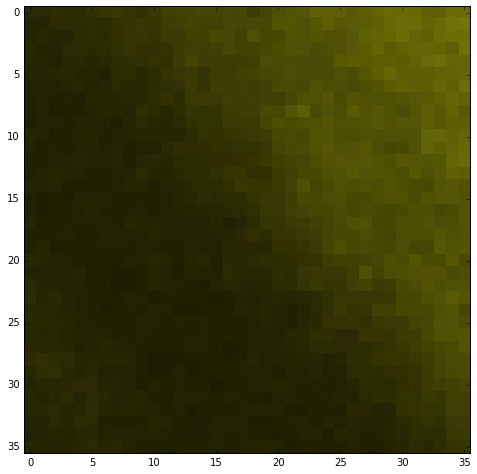

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


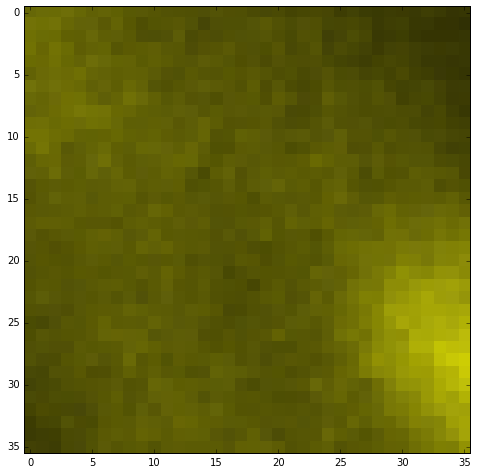

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


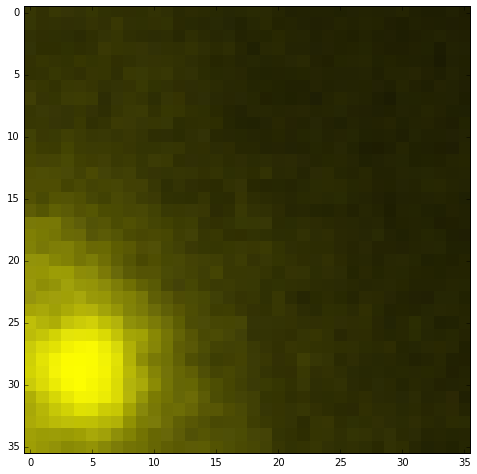

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


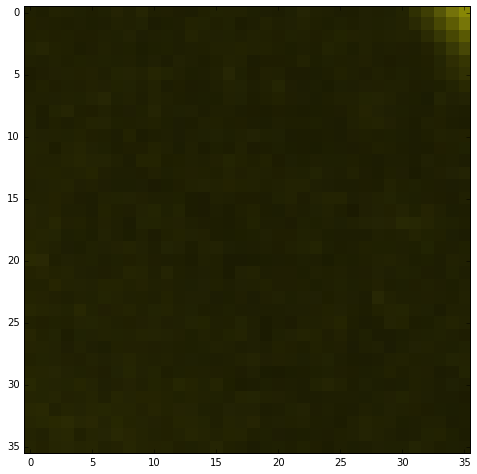

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


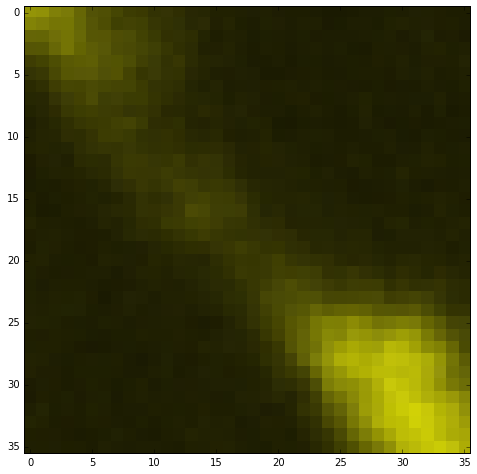

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


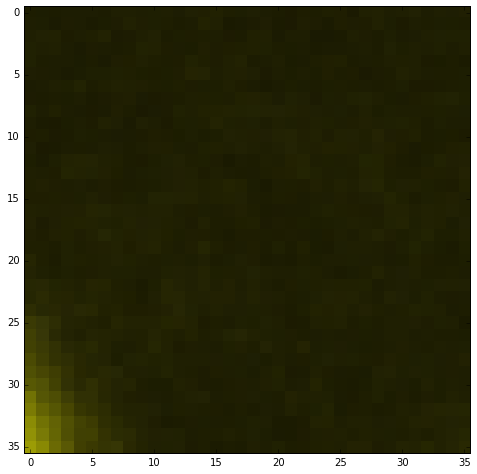

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


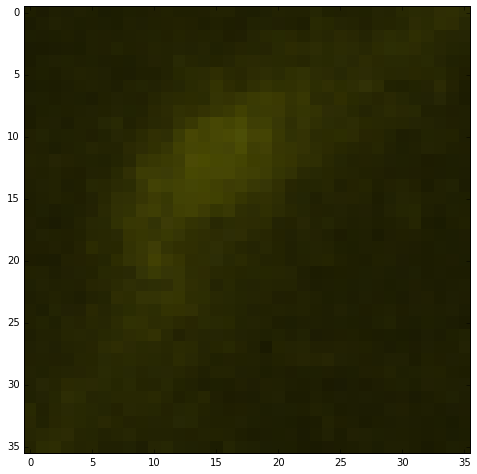

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


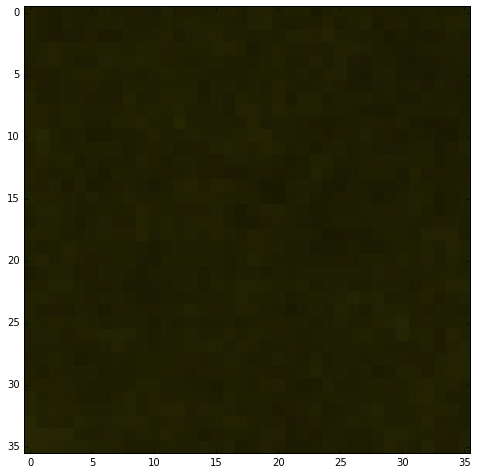

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


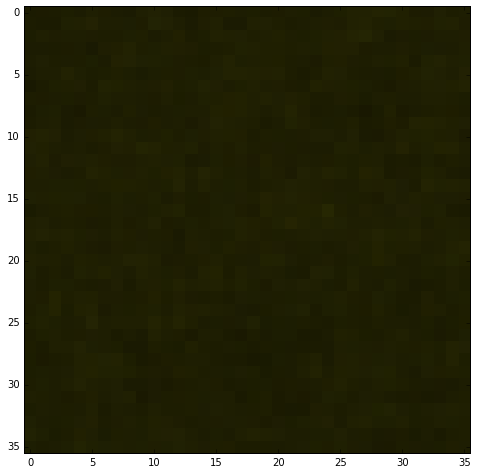

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


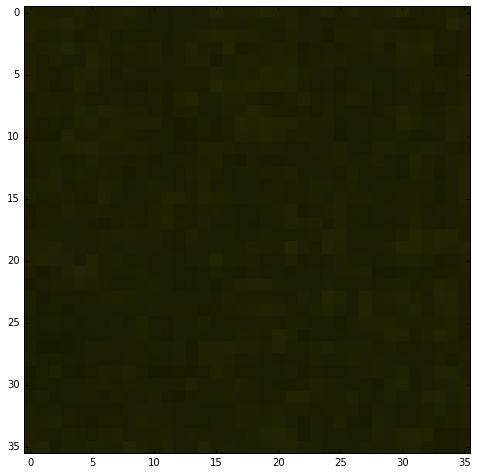

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


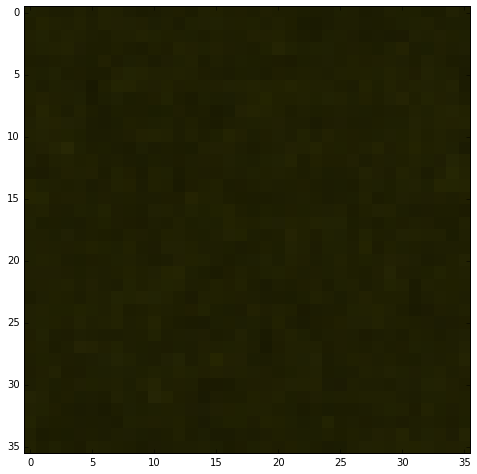

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


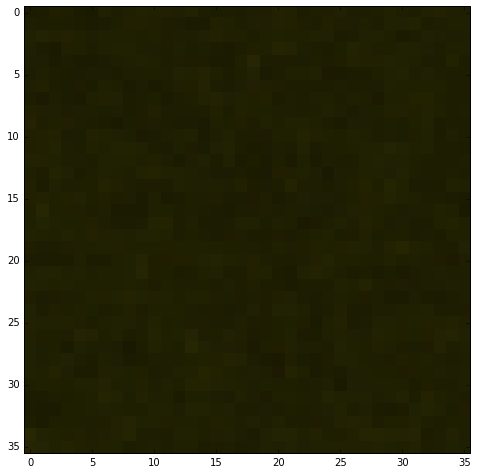

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


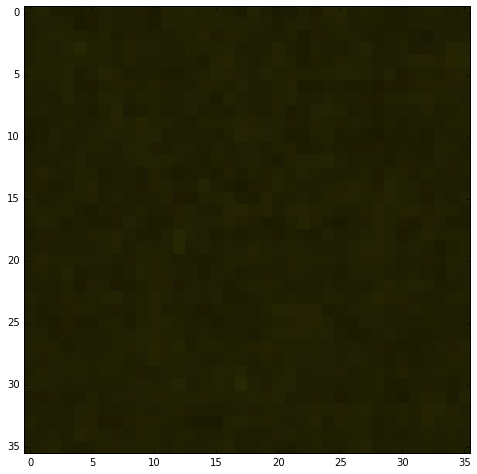

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


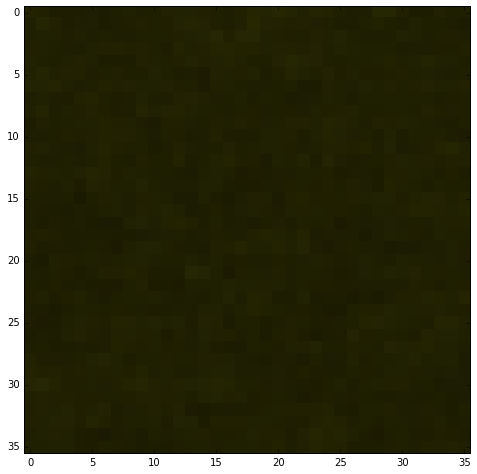

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


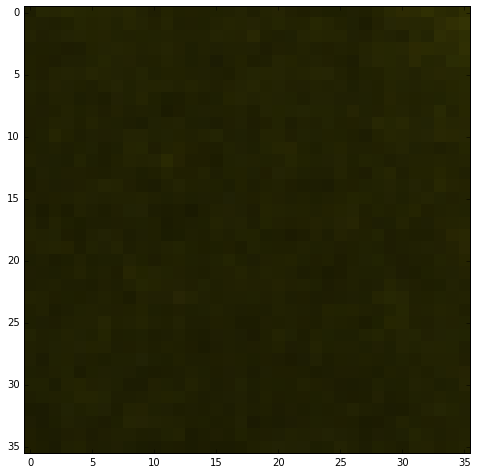

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


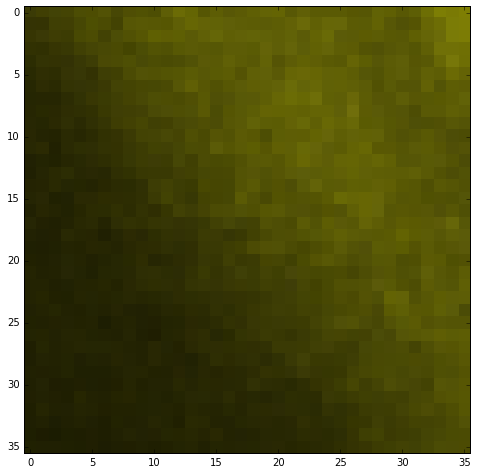

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


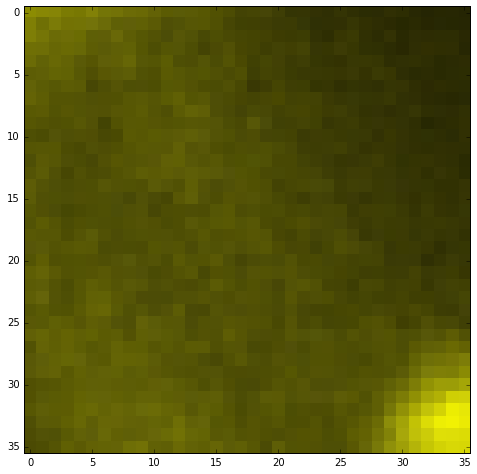

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


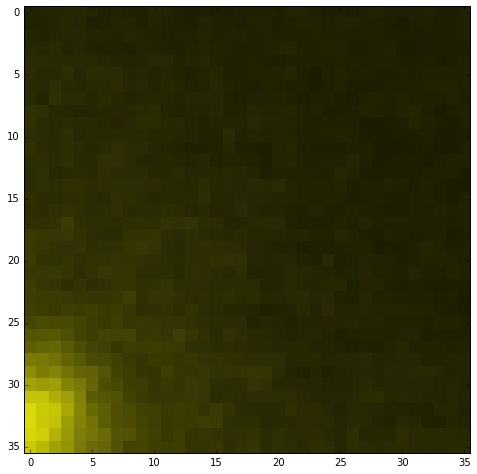

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


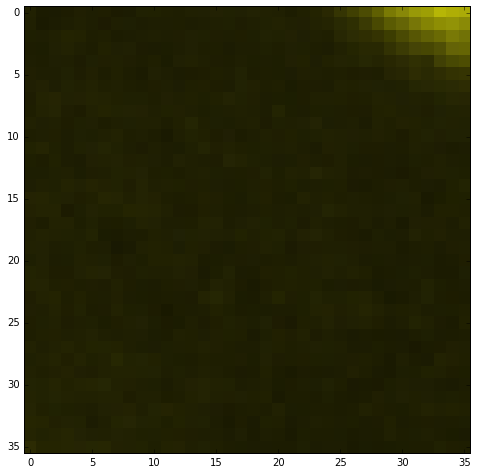

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


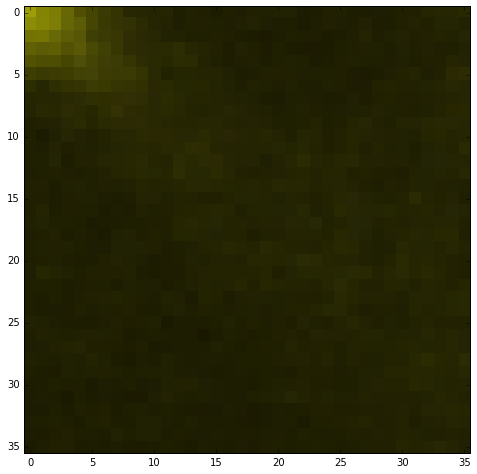

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


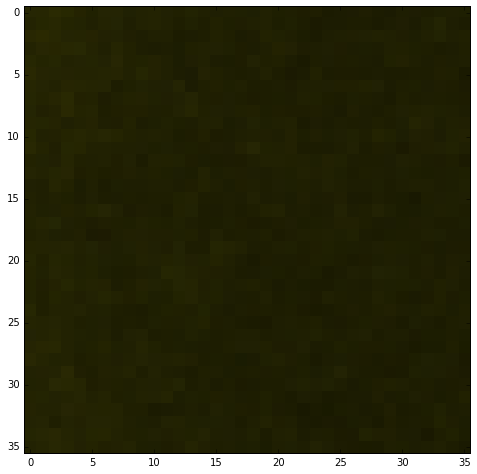

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


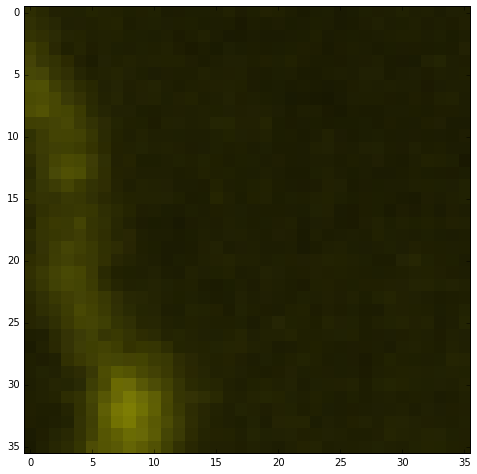

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


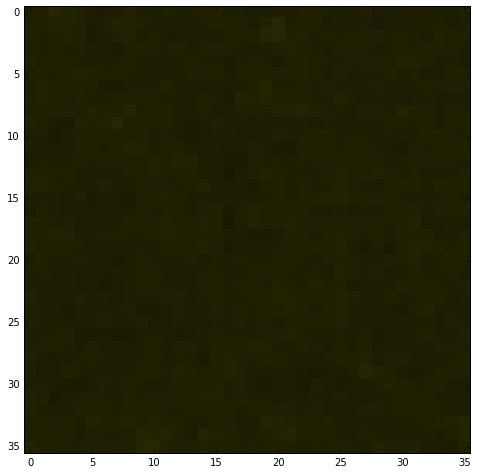

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


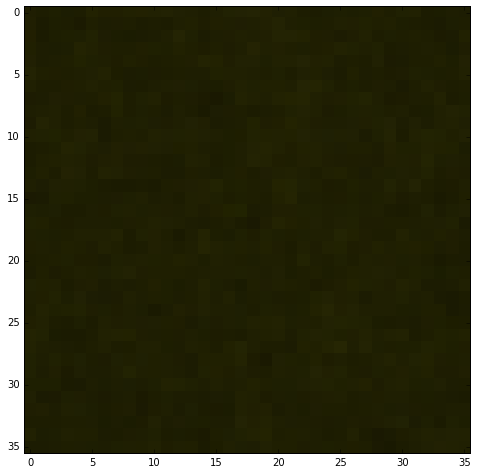

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


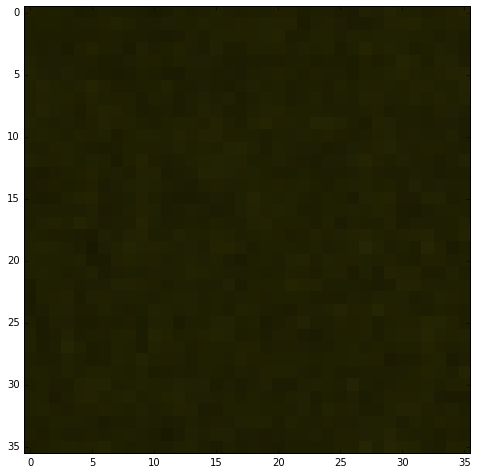

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


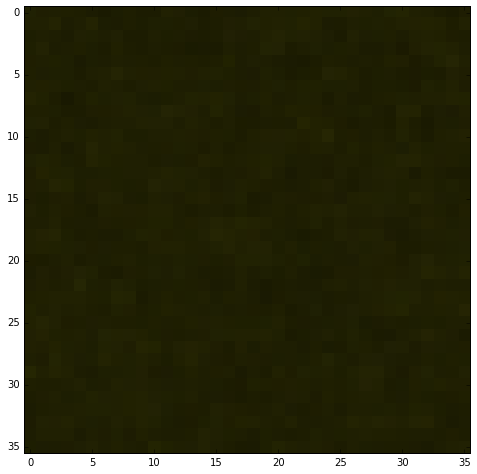

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


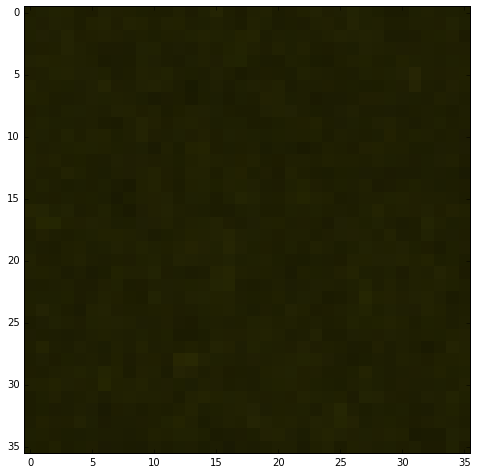

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


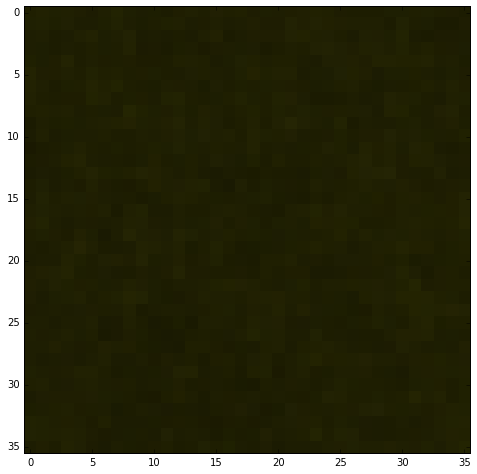

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


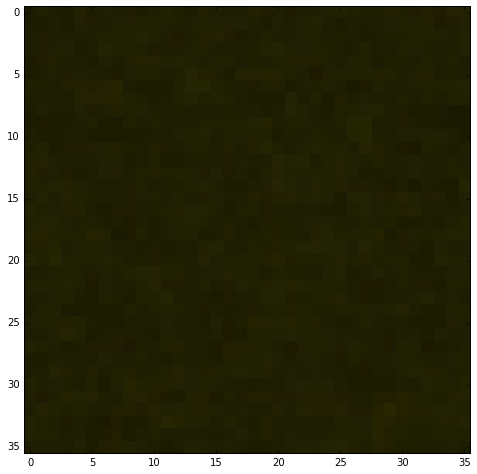

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


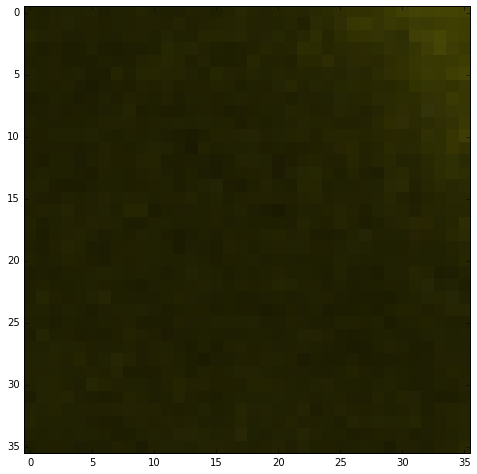

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


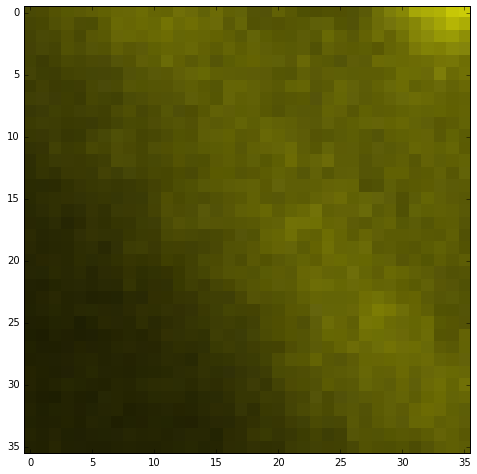

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


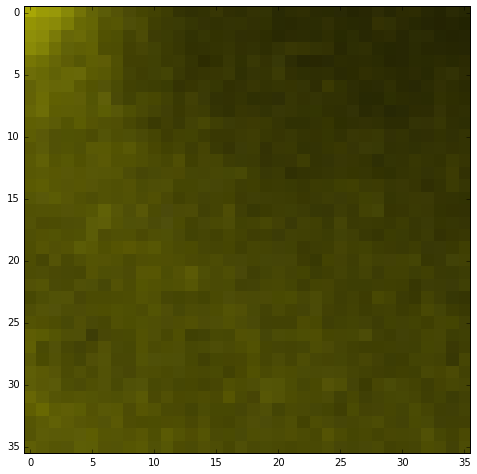

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


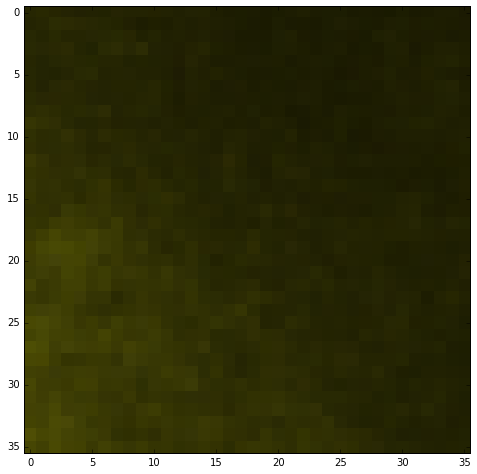

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


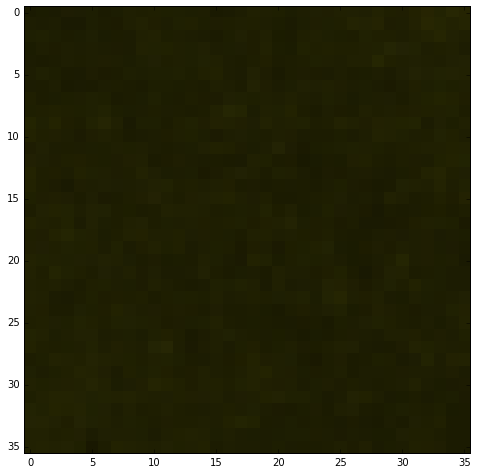

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


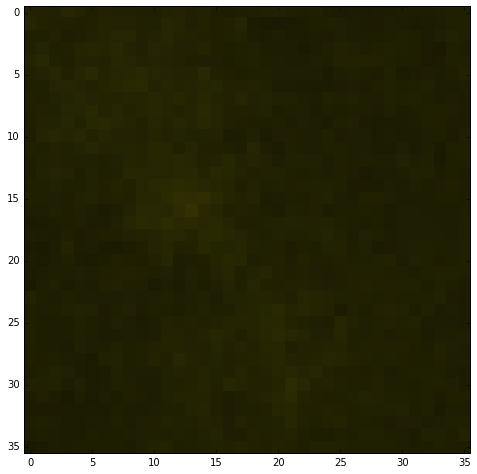

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


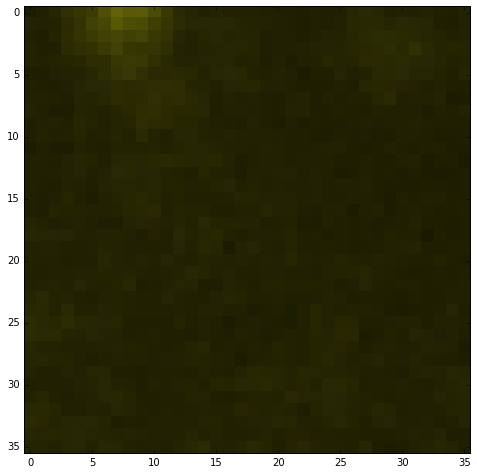

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


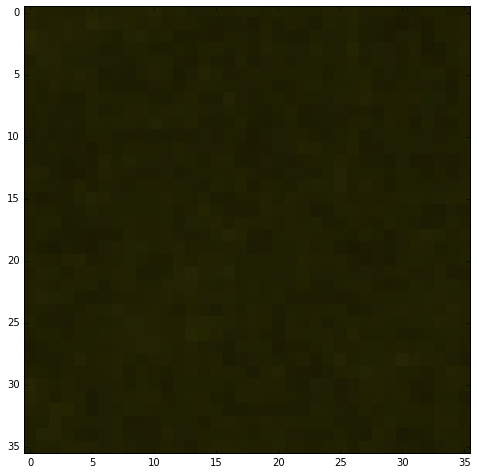

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


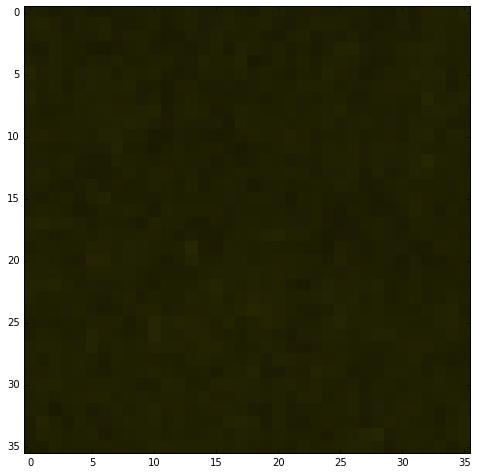

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


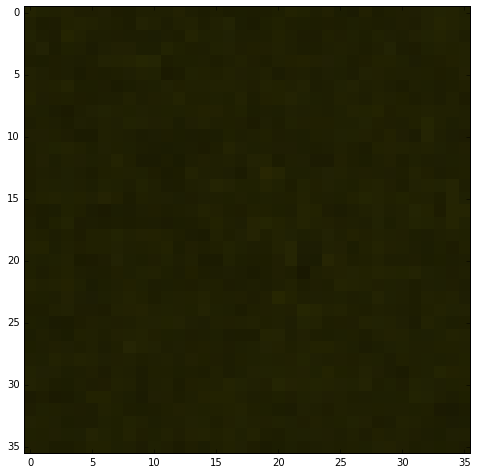

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


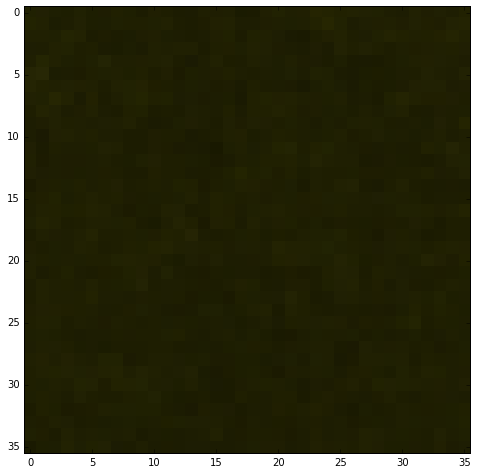

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


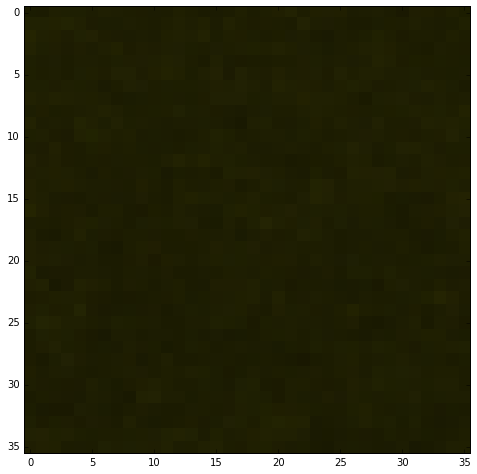

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


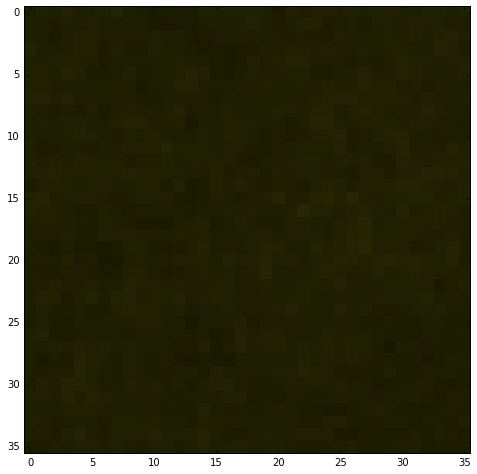

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


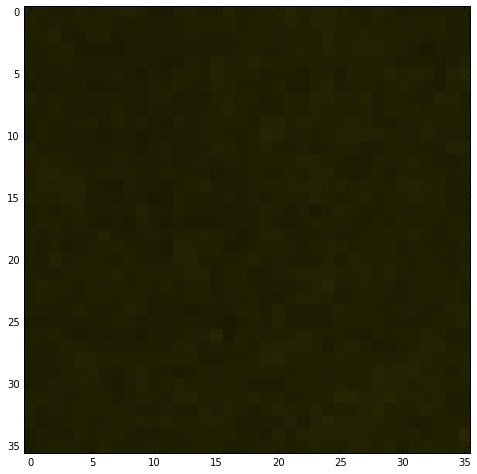

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


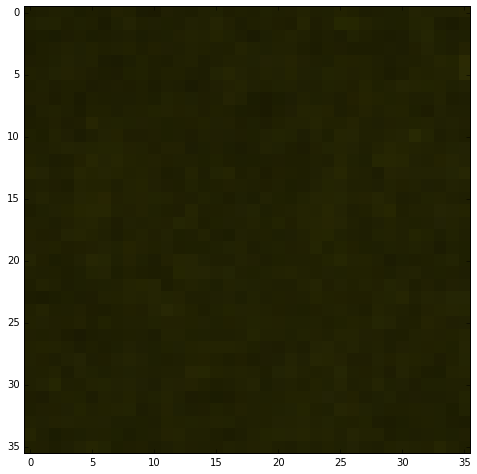

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


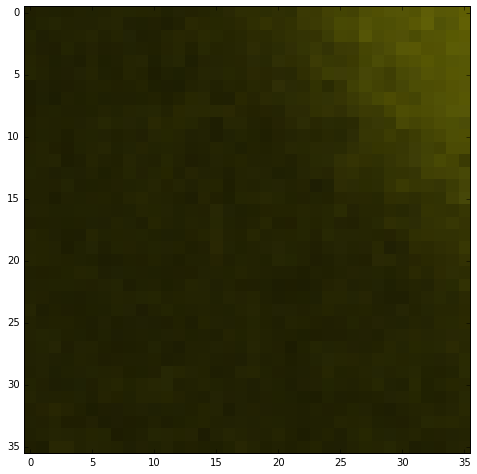

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


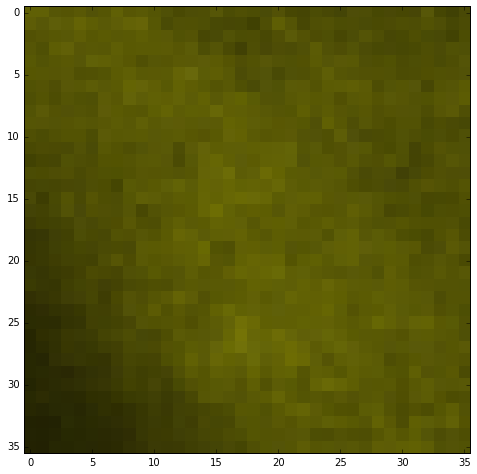

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


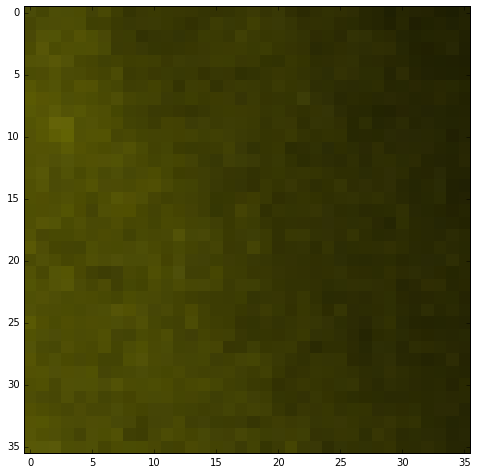

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


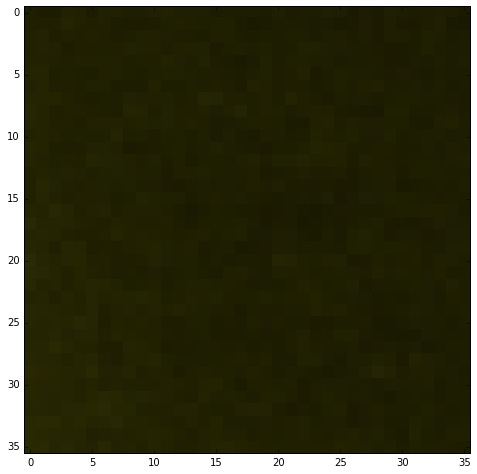

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


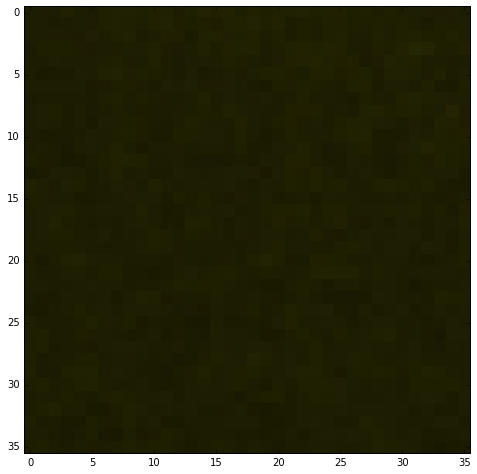

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


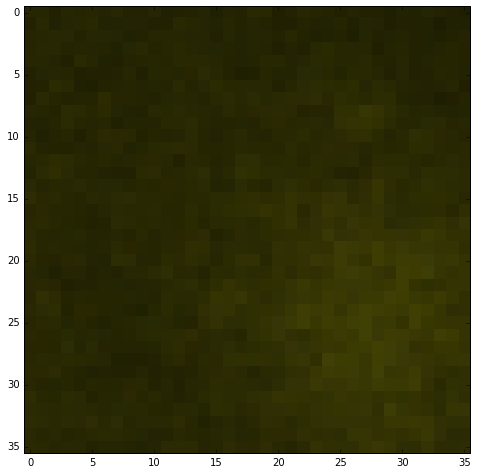

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


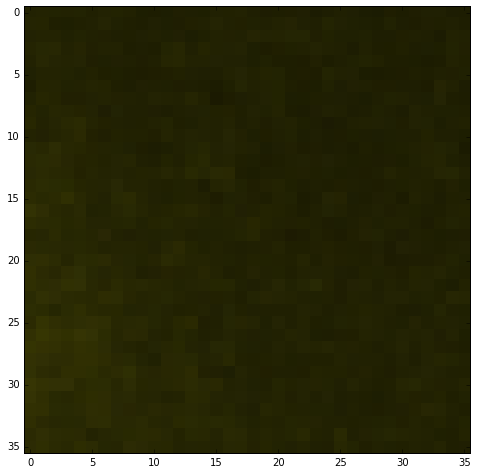

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


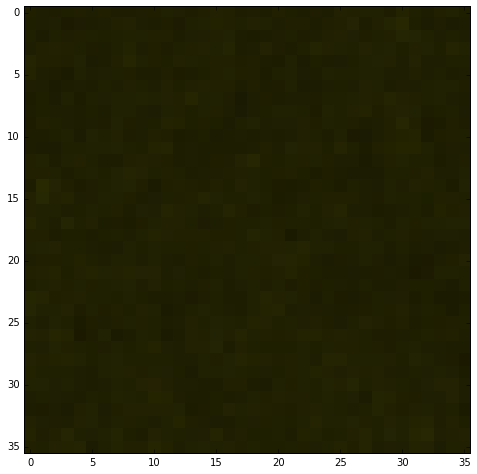

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


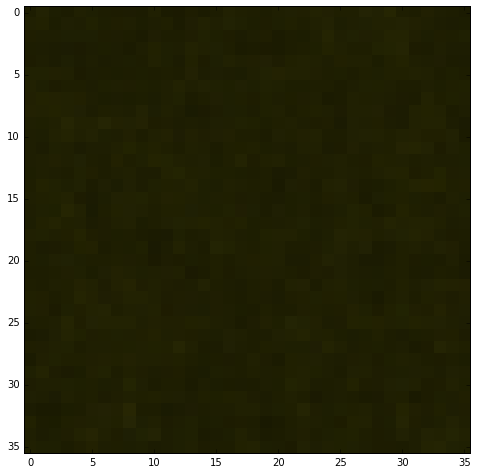

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


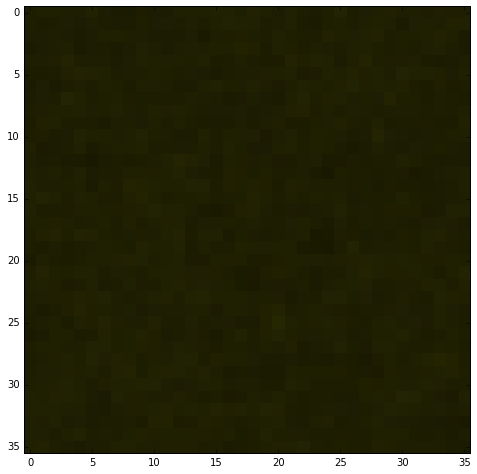

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


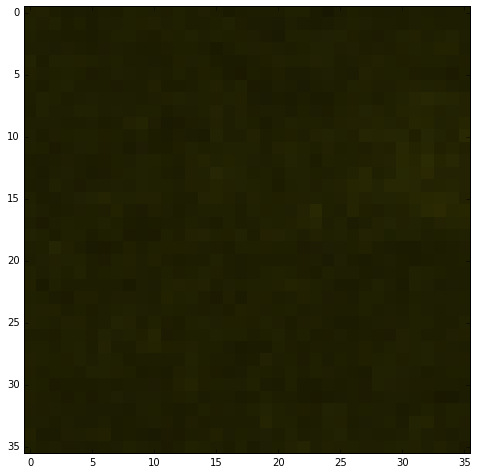

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


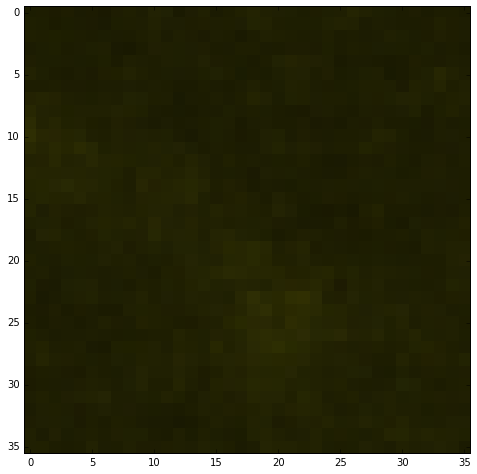

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


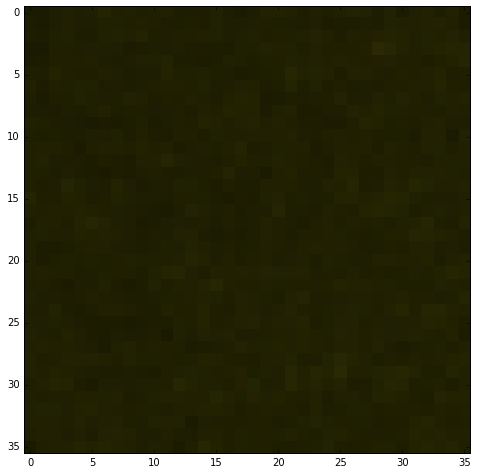

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


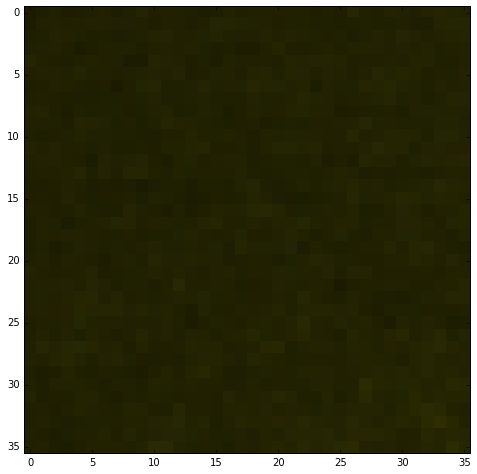

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


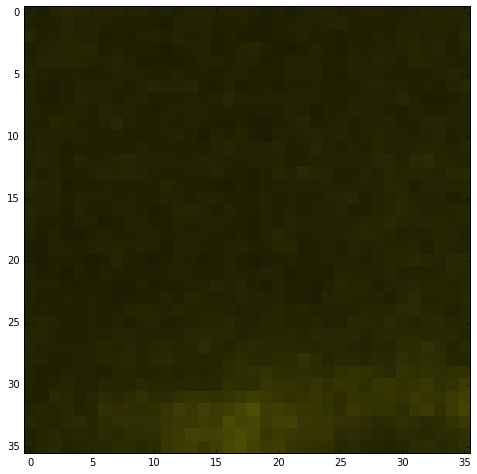

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


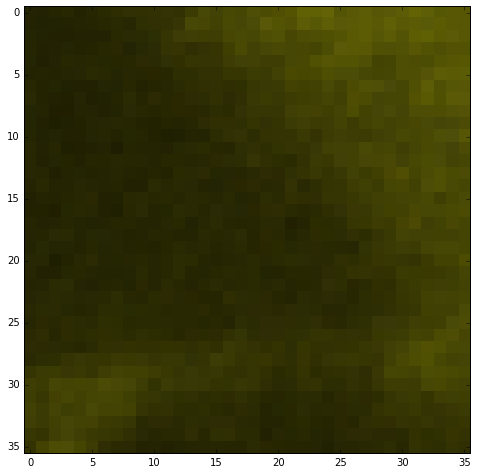

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


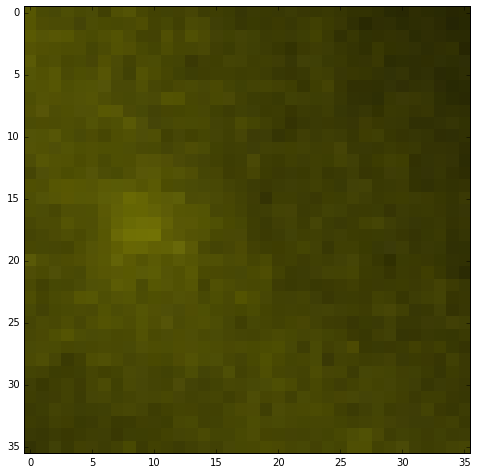

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


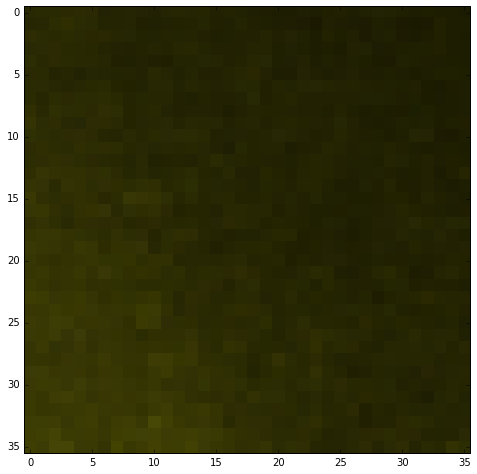

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


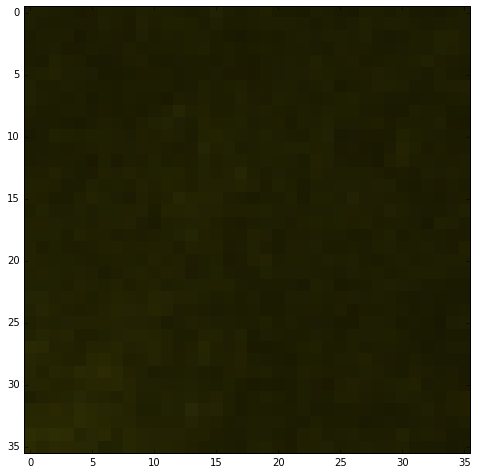

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


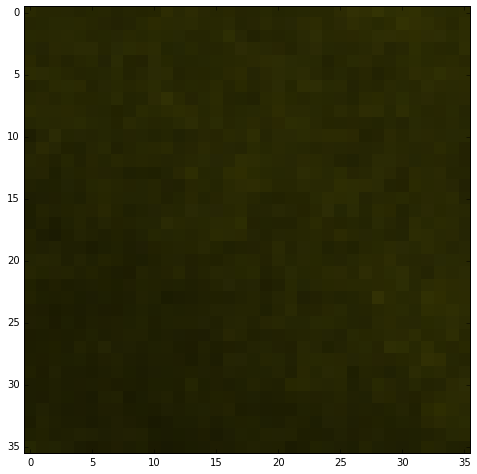

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


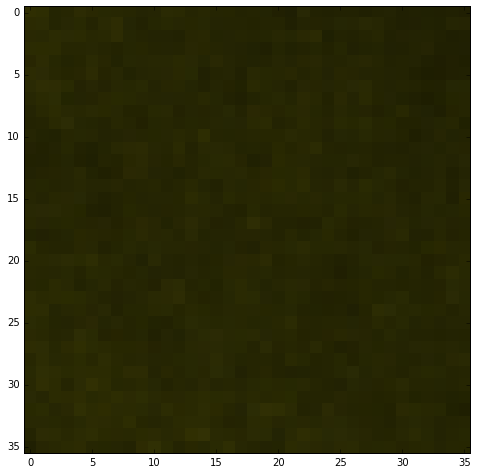

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


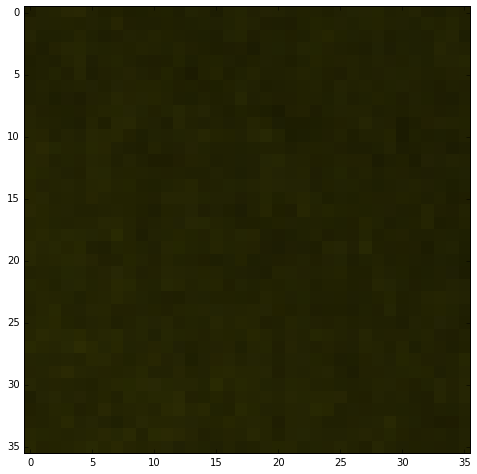

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


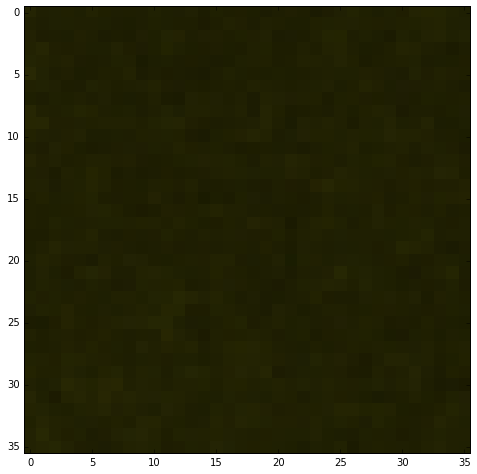

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


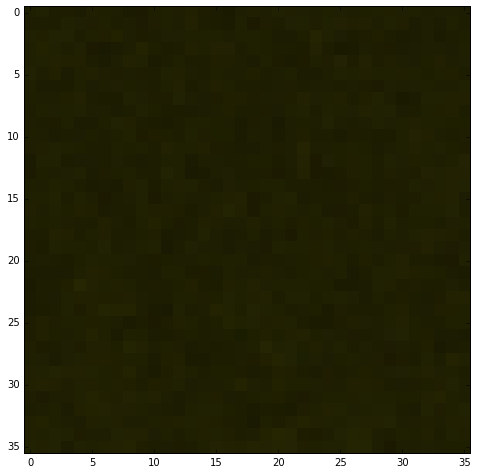

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


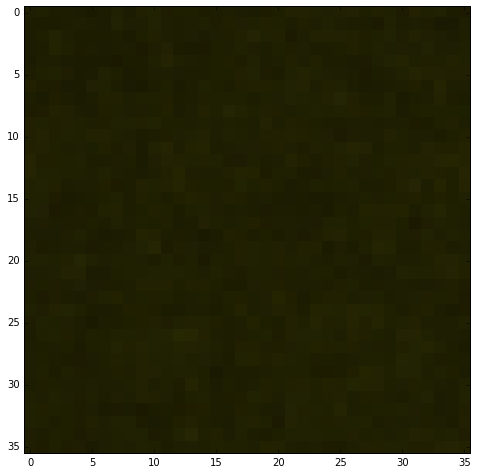

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


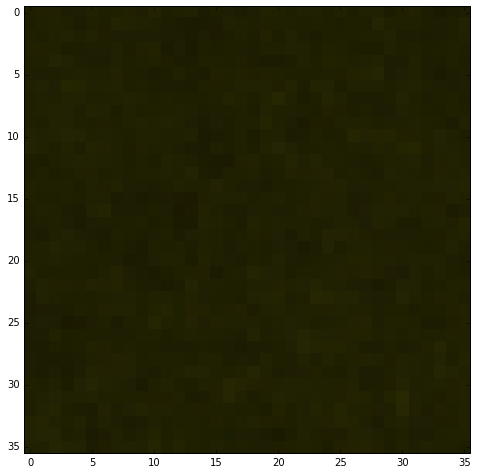

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


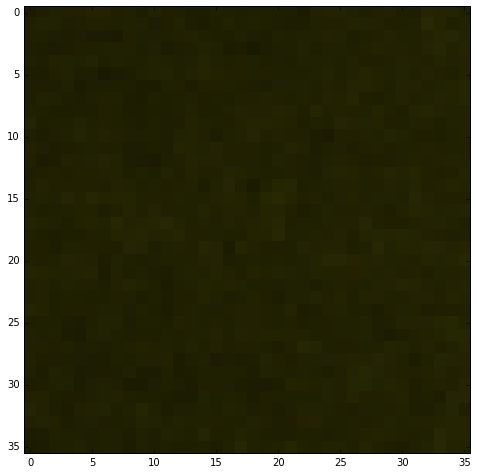

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


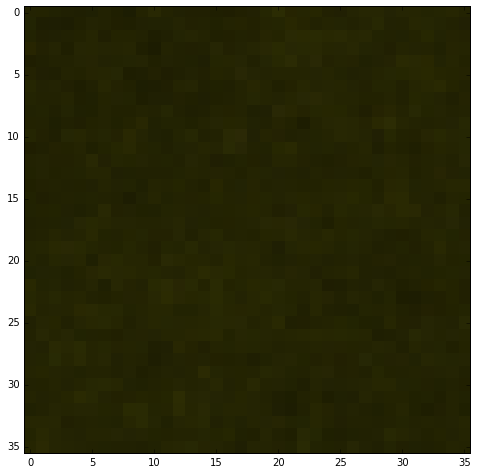

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


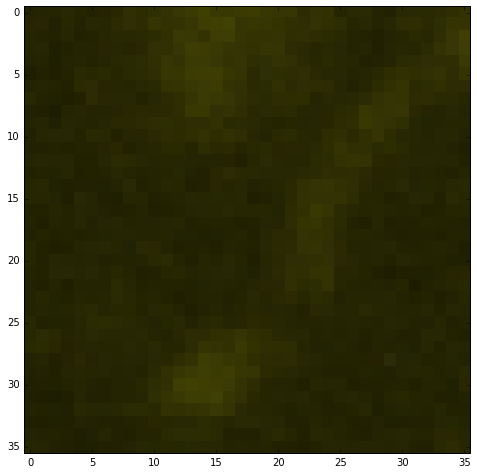

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


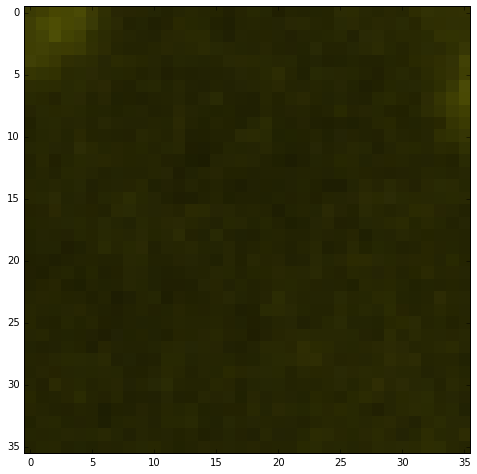

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


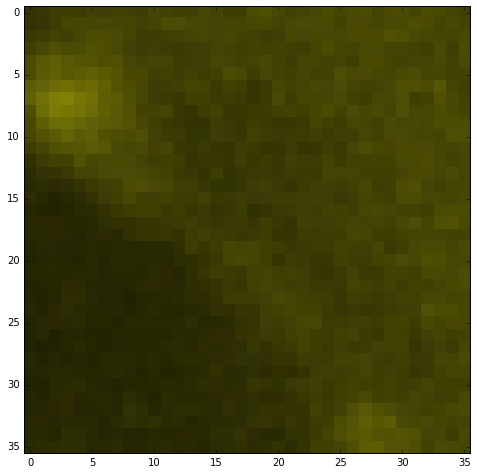

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


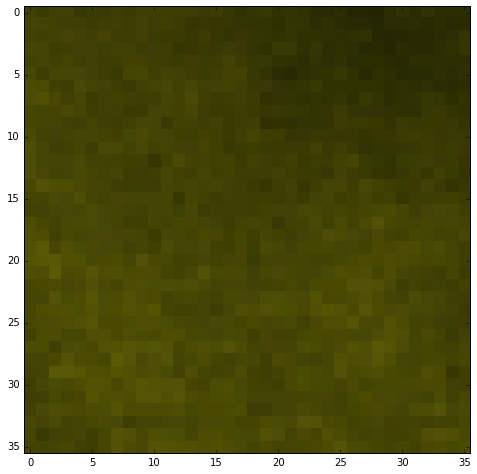

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


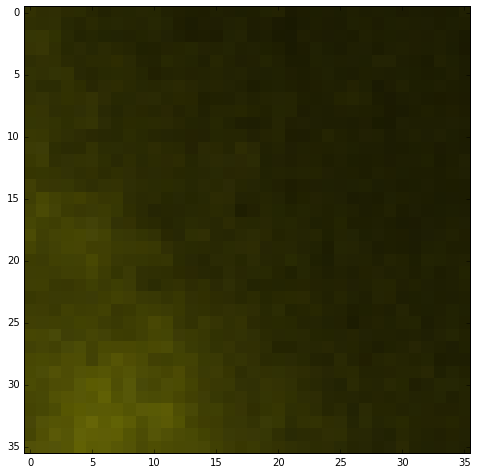

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


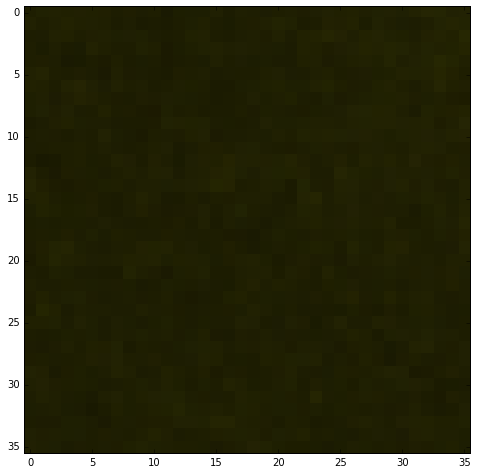

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


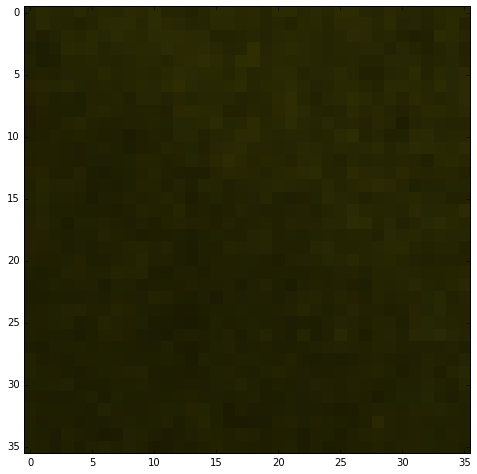

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


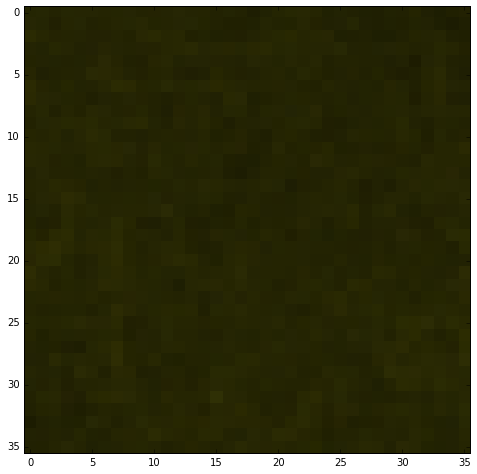

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


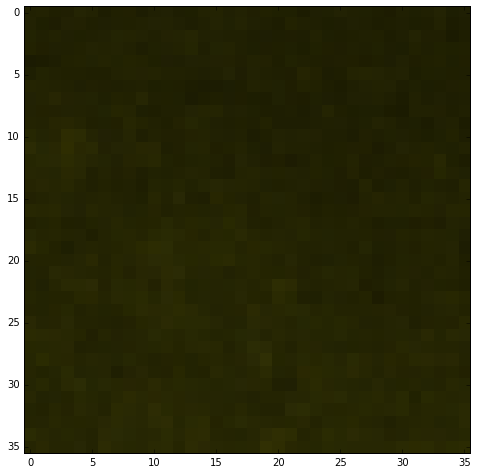

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


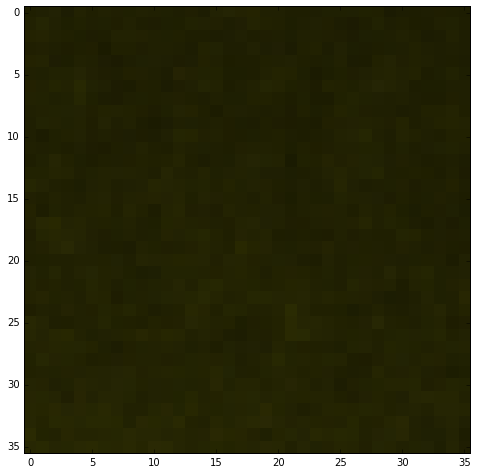

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


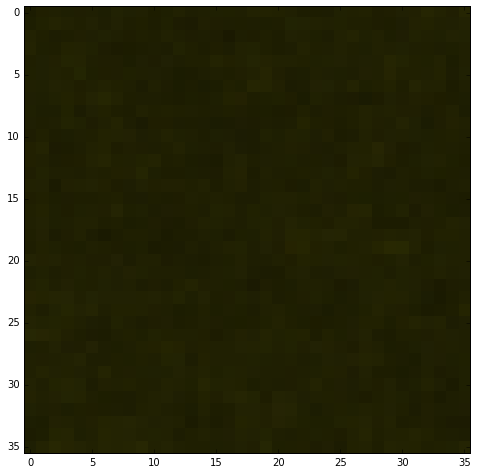

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


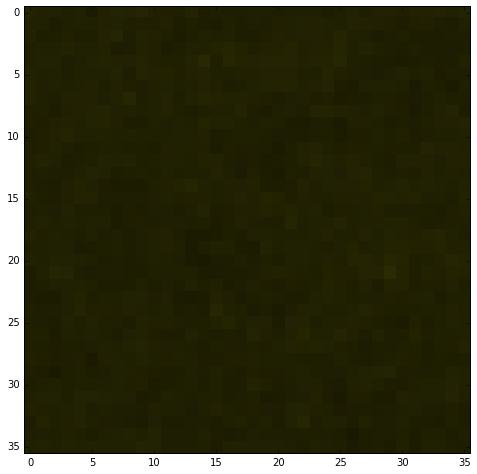

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


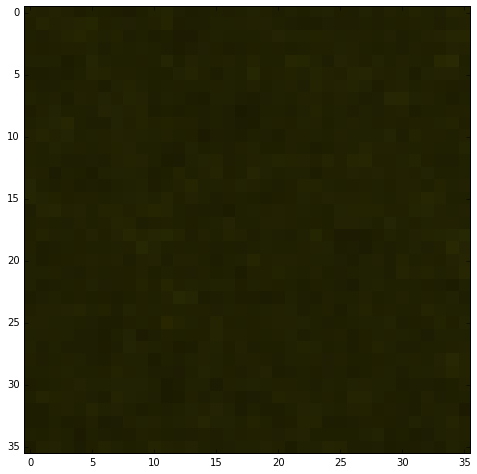

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


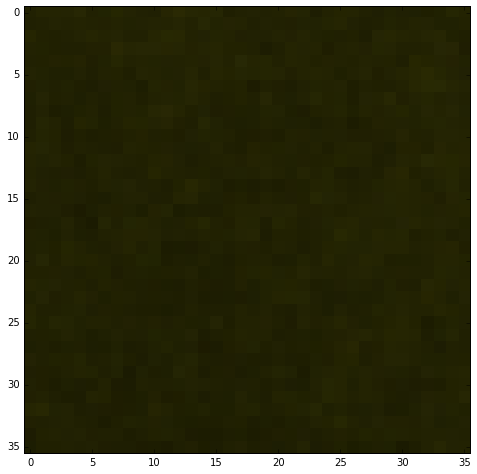

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


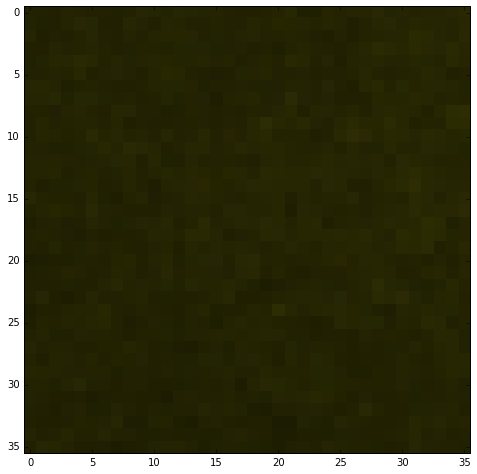

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


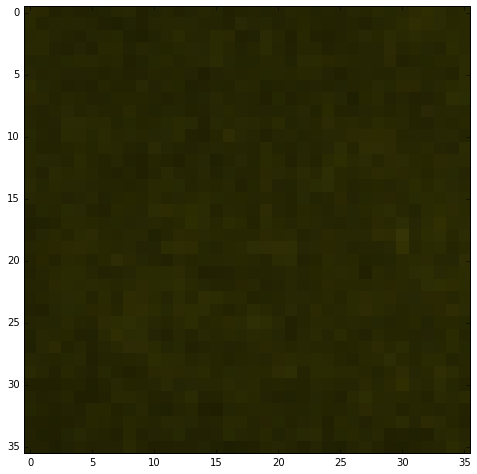

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


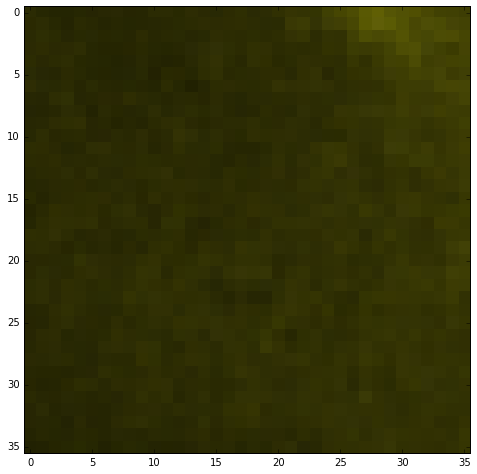

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


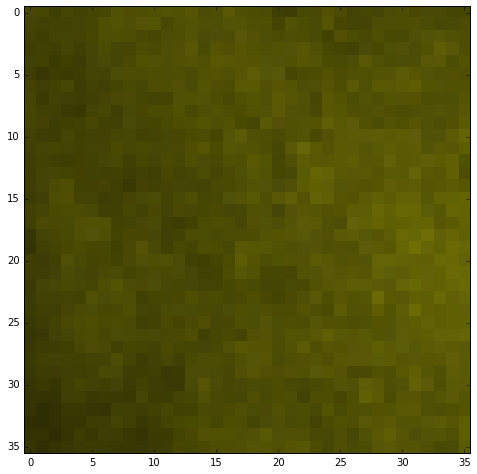

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


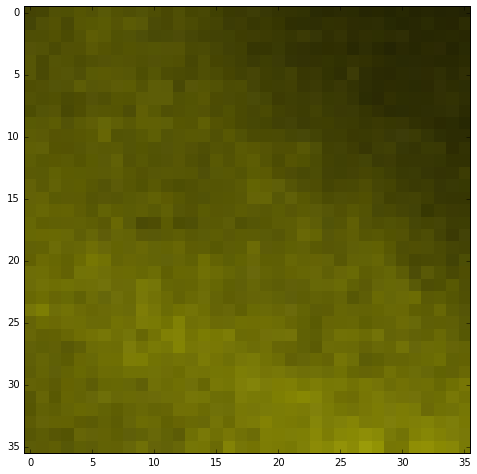

[55.8795664, 27.148385400000002]


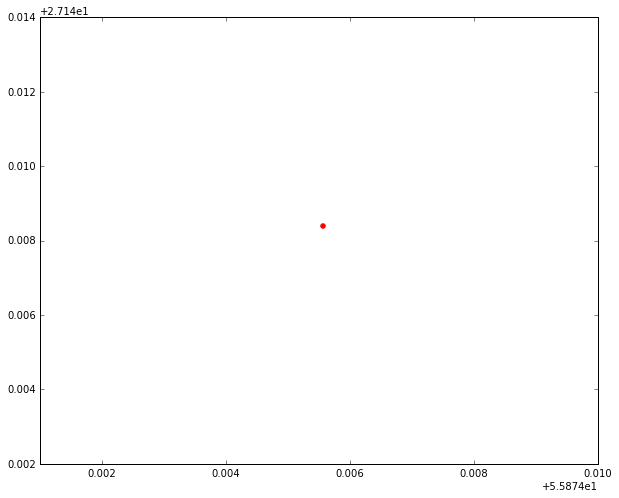

June 6 2011 (415-5)_Series008_z006_ch00
June 6 2011 (415-5)_Series008_z007_ch00
im shape (512, 512, 3)
Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


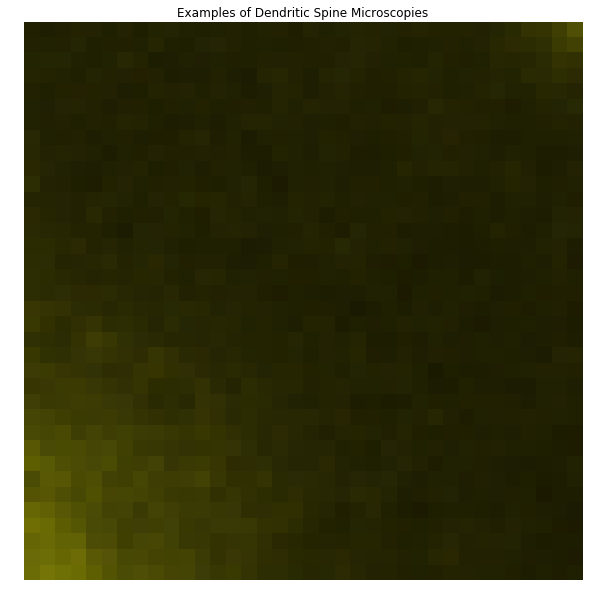

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


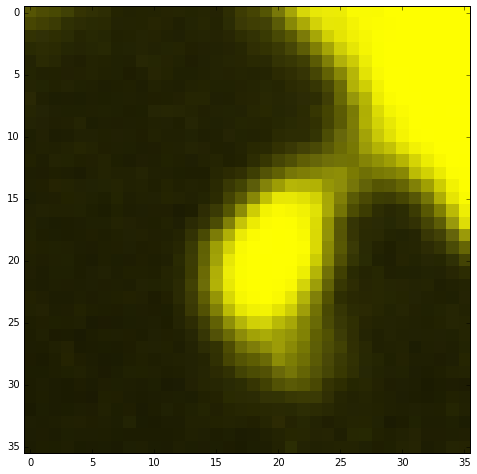

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


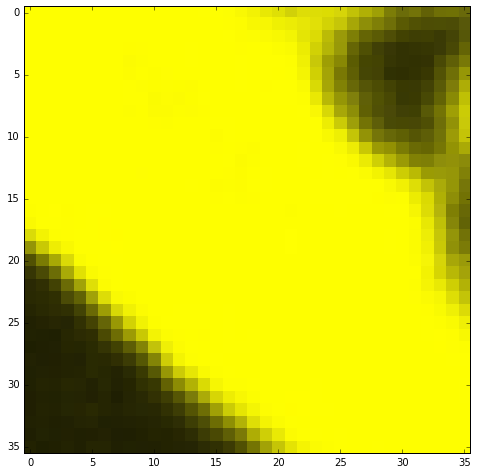

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


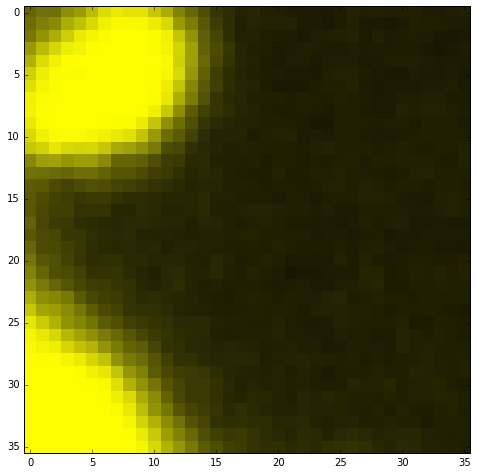

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


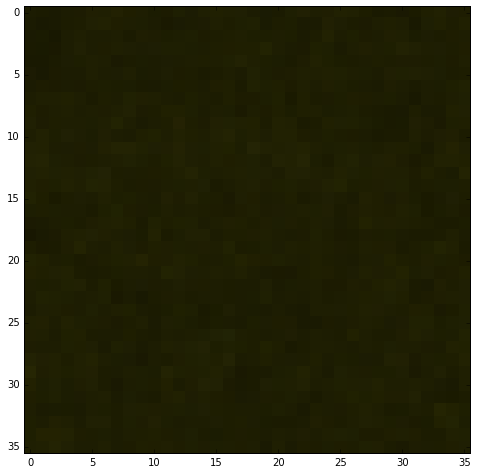

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


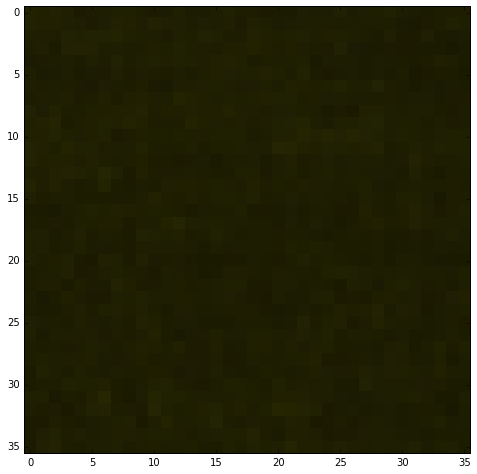

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


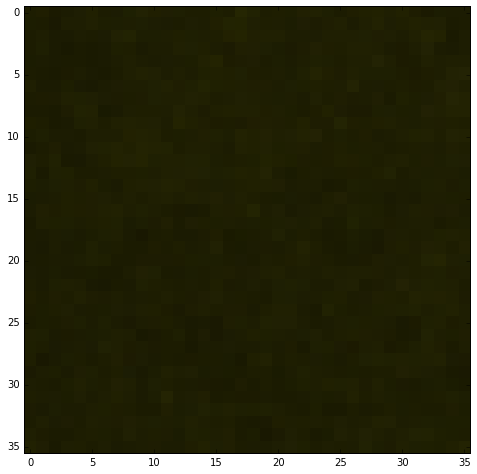

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


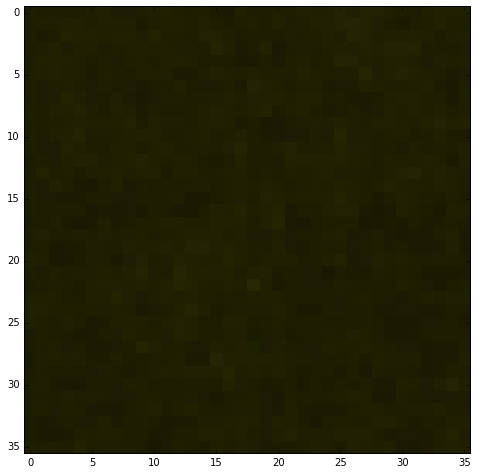

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


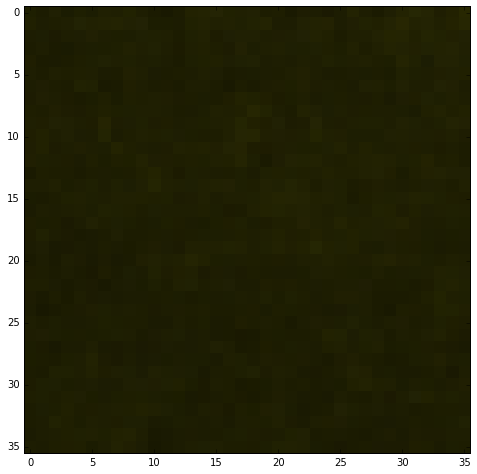

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


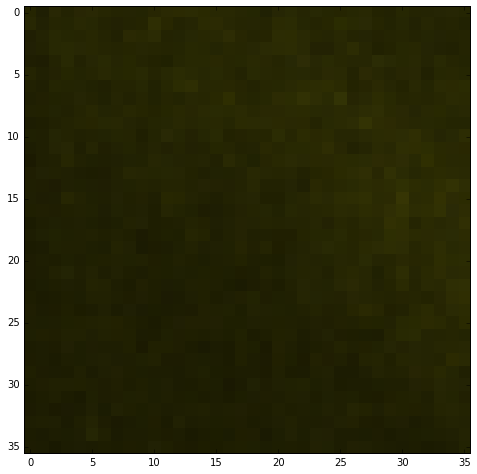

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


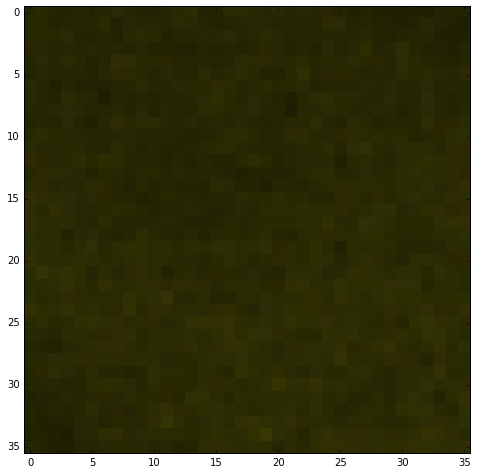

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


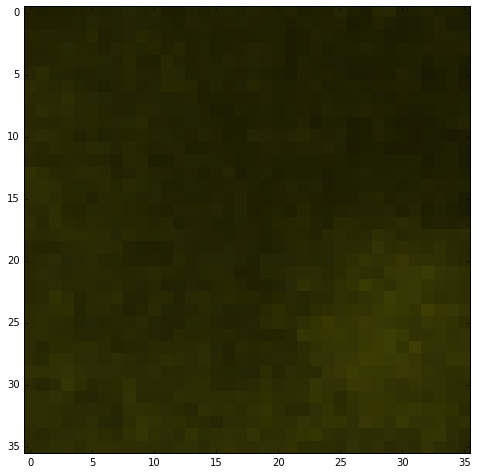

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


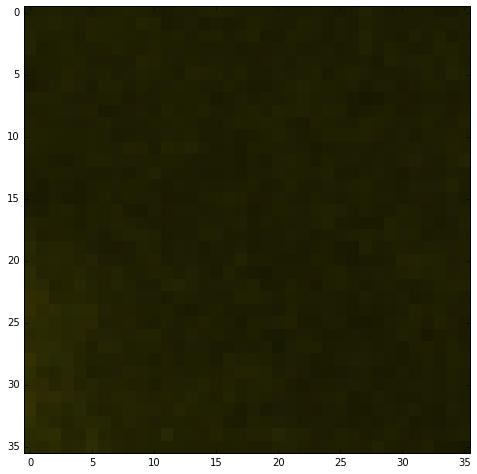

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


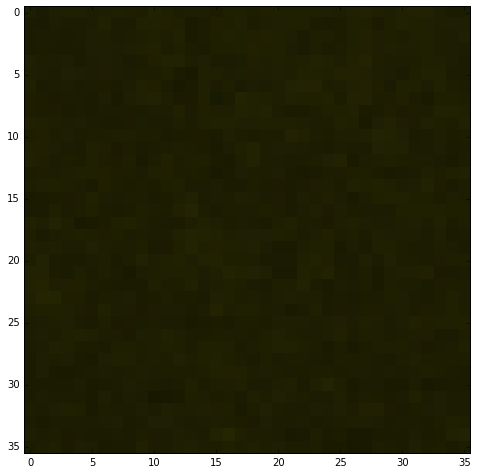

Cropped Image has shape (36, 36, 3)
This was a dendritic spine


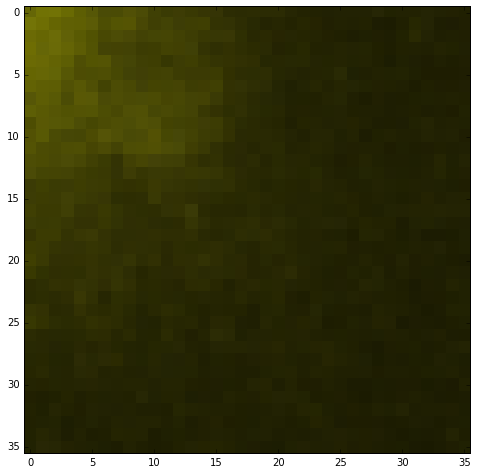

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


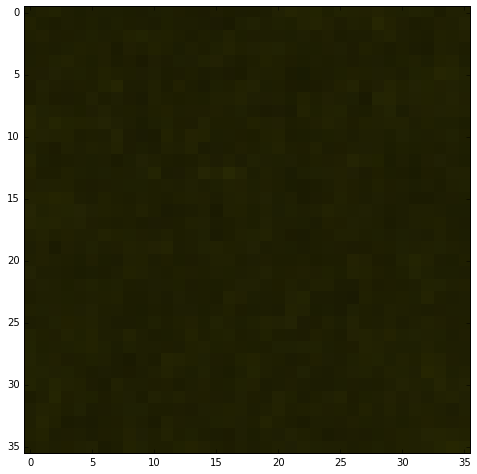

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


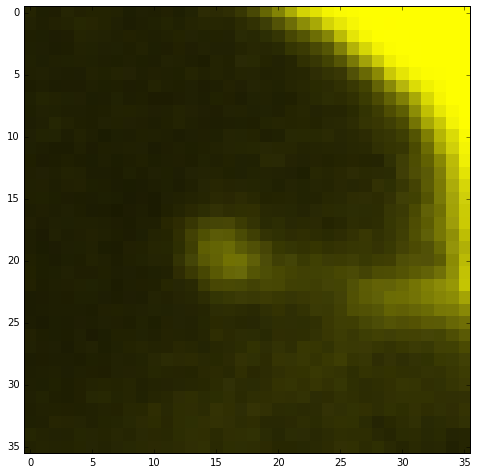

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


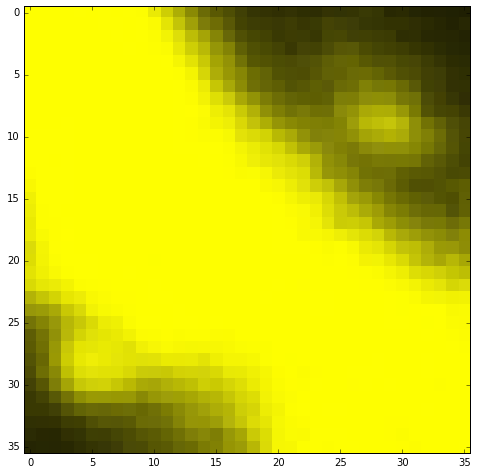

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


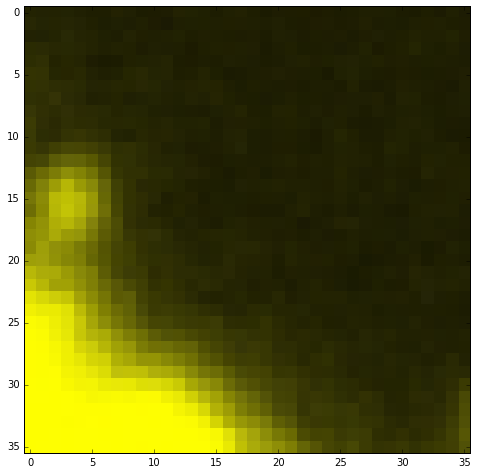

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


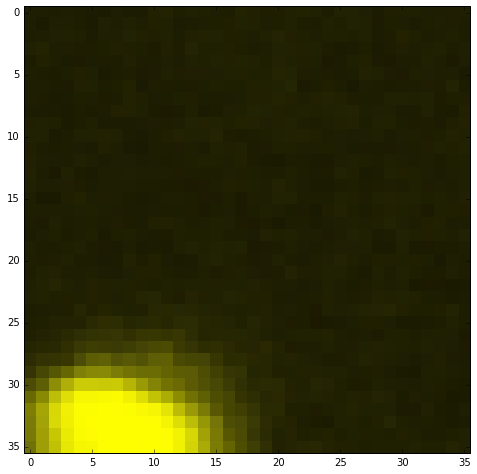

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


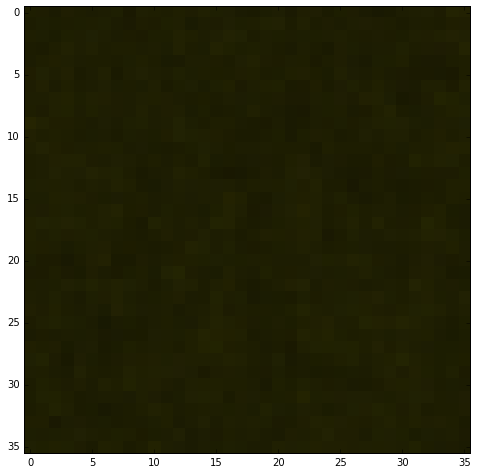

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


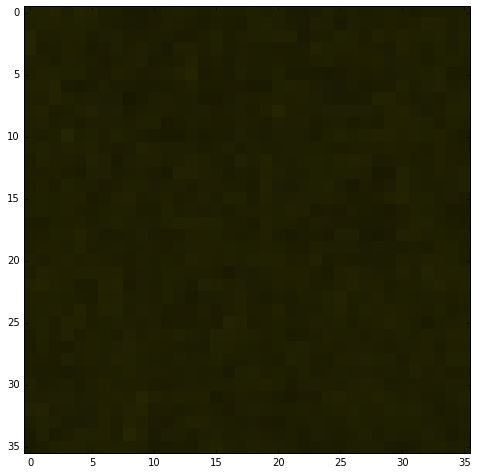

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


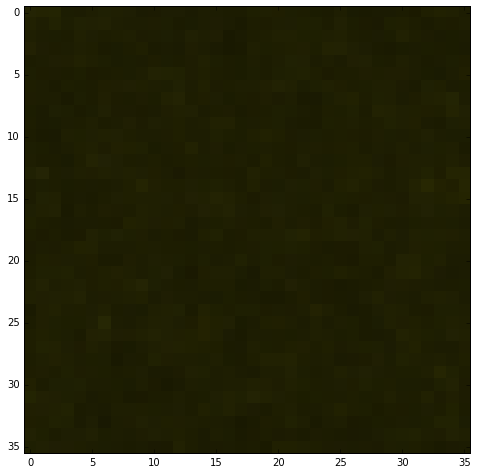

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


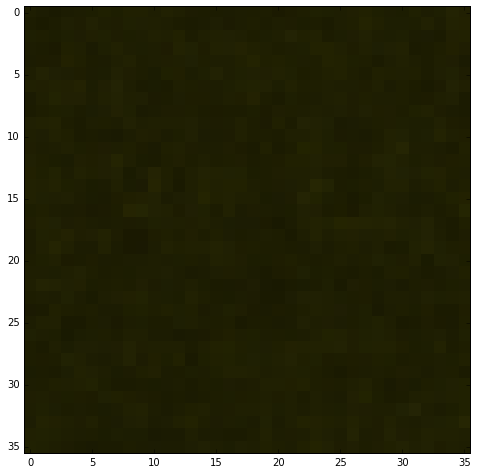

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


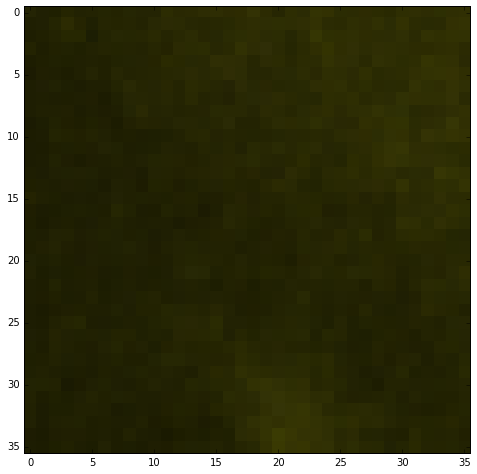

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


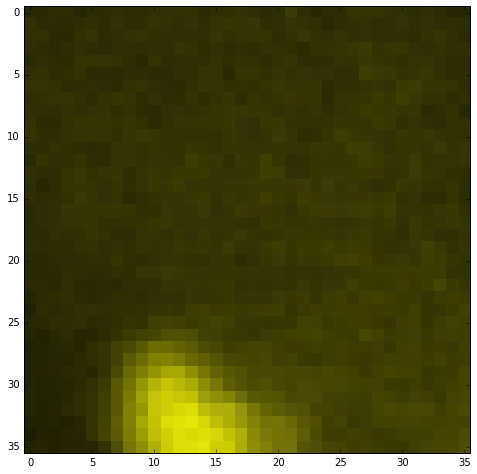

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


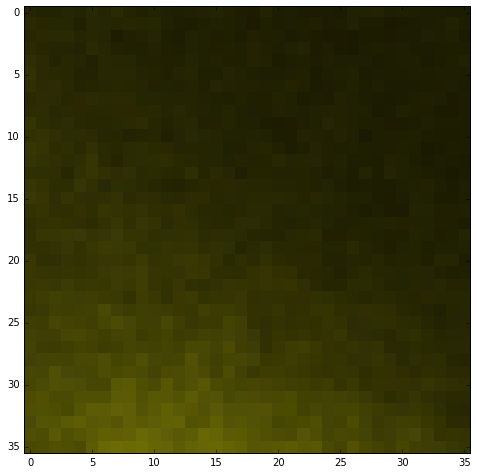

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


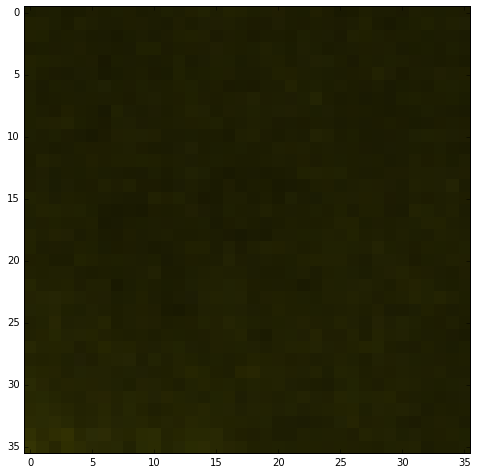

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


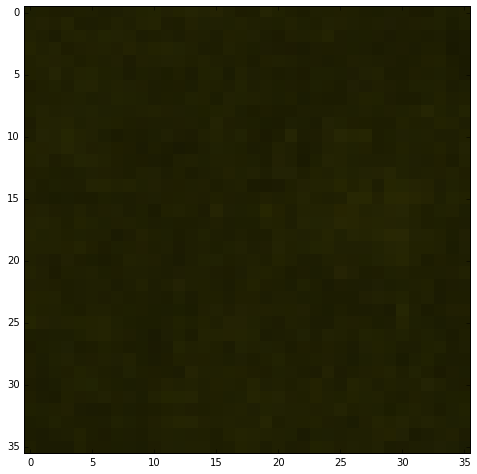

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


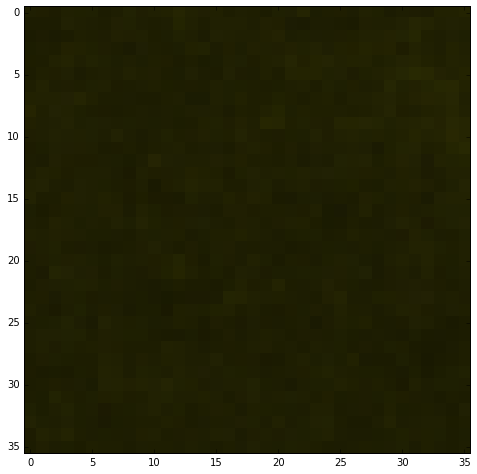

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


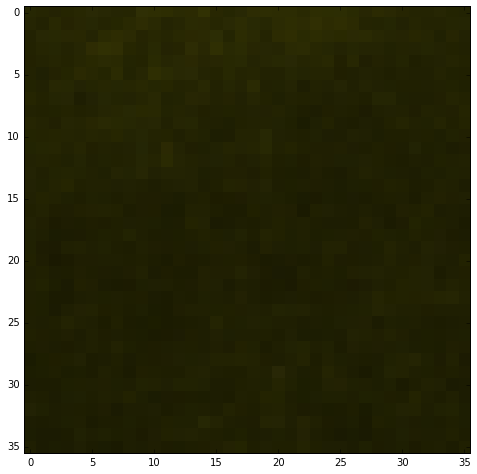

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


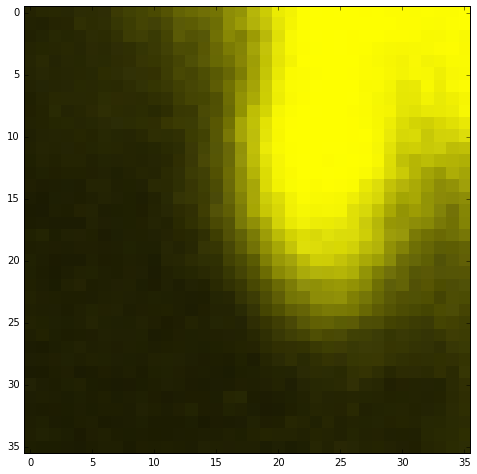

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


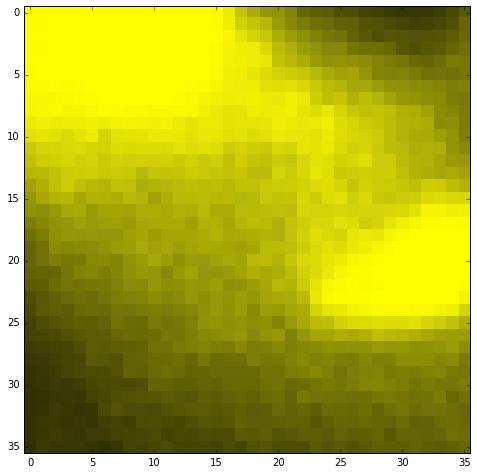

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


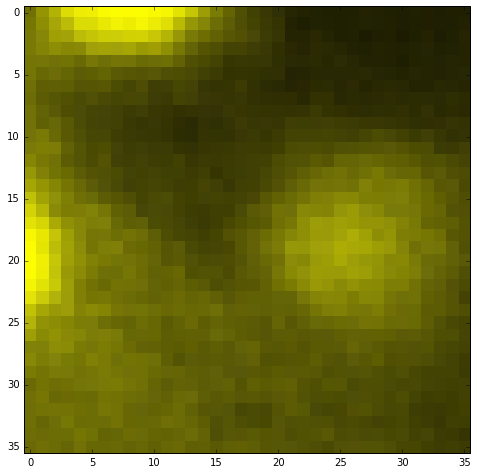

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


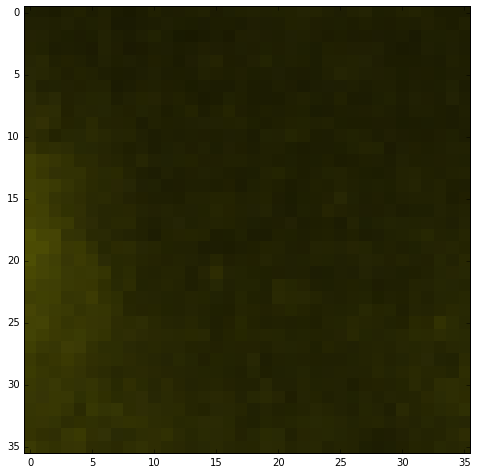

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


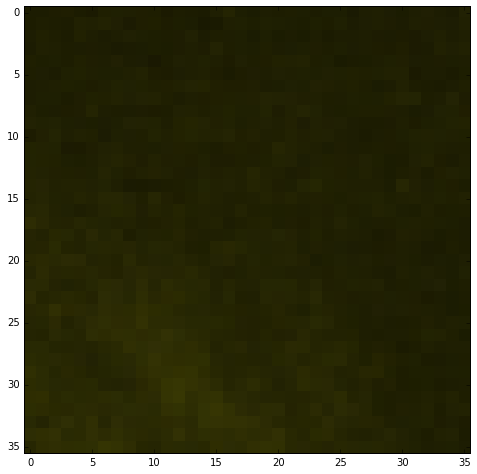

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


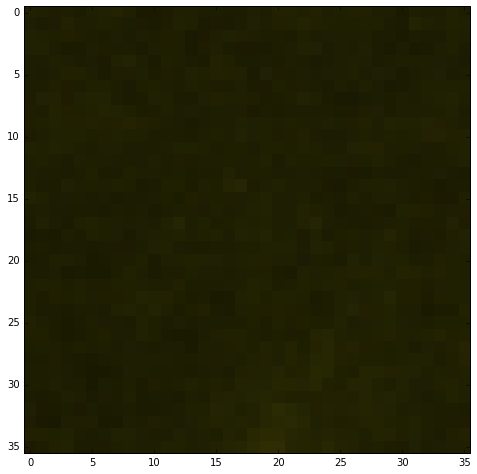

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


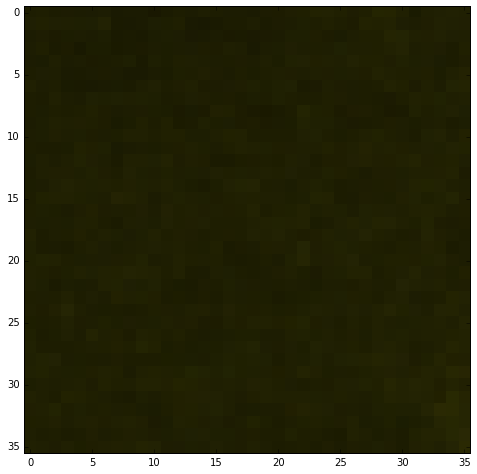

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


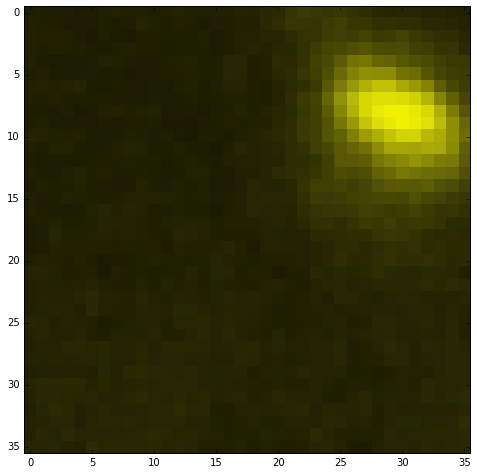

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


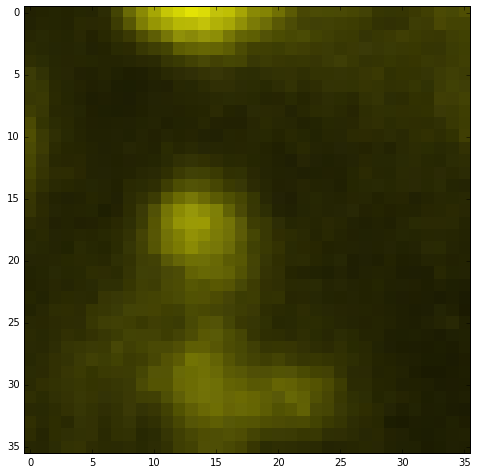

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


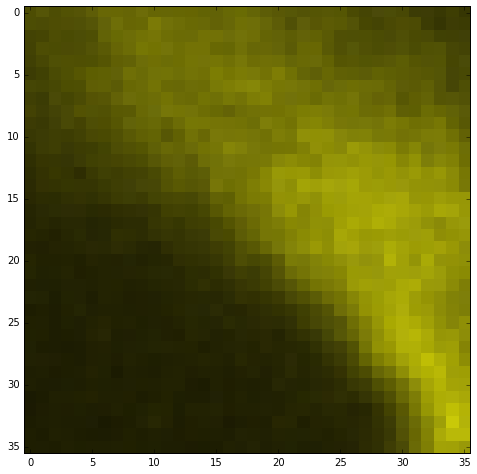

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


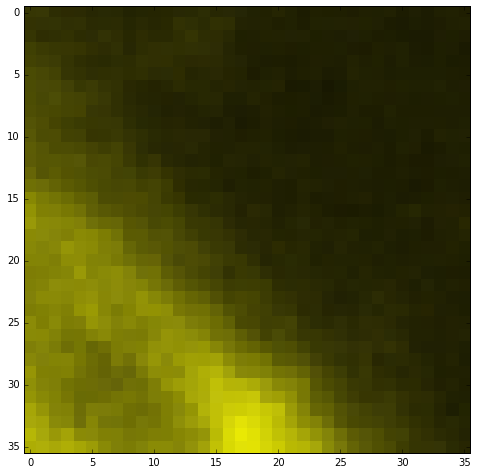

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


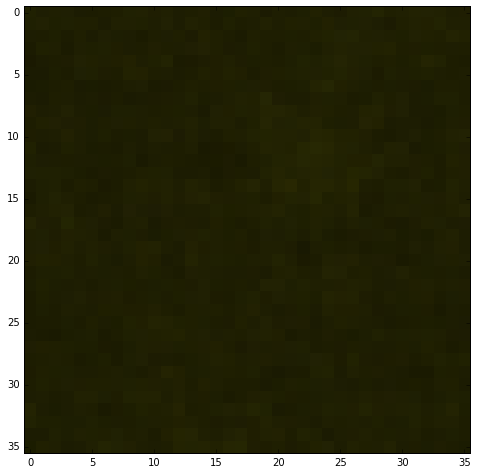

Cropped Image has shape (36, 36, 3)
This was a dendritic spine


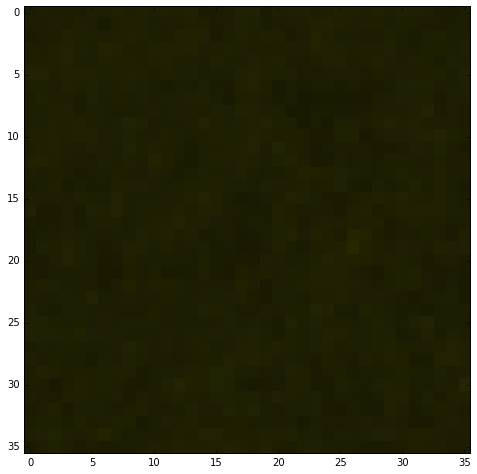

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


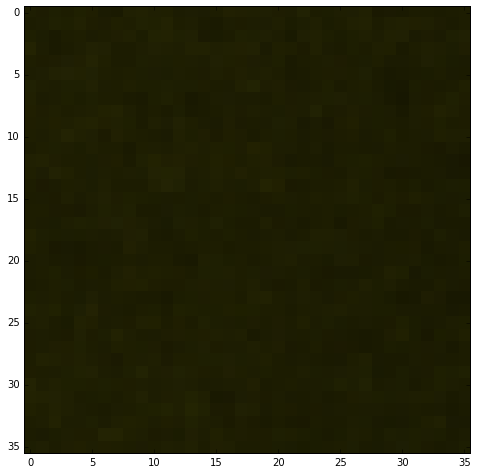

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


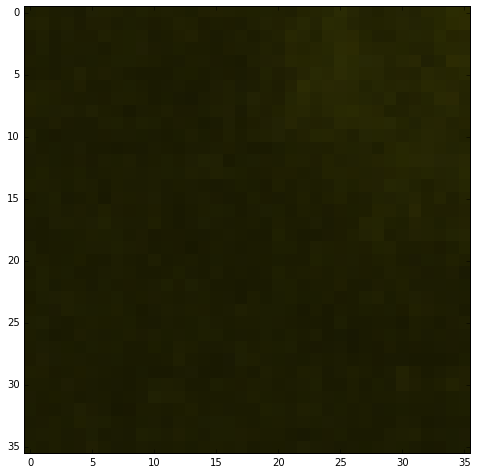

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


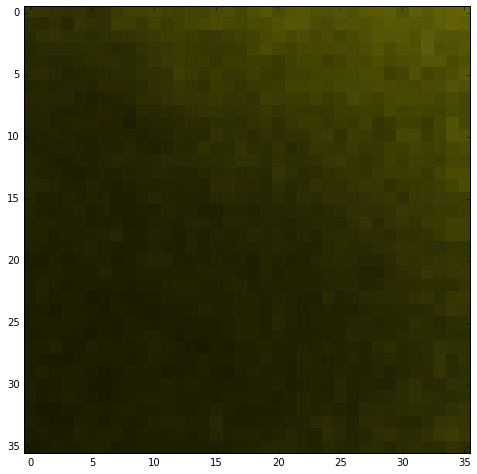

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


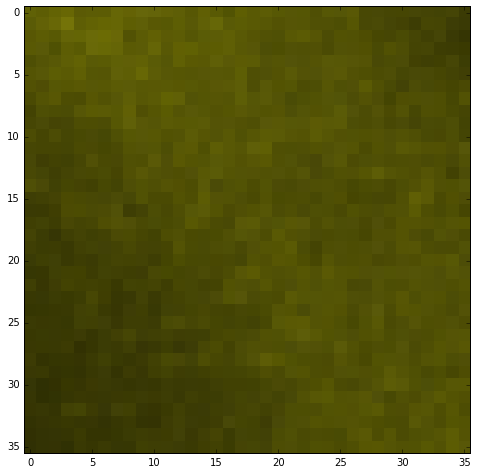

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


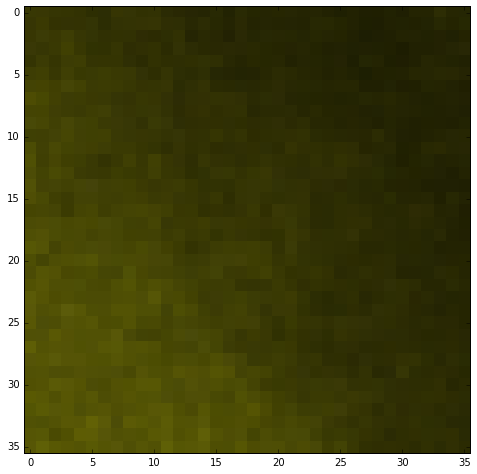

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


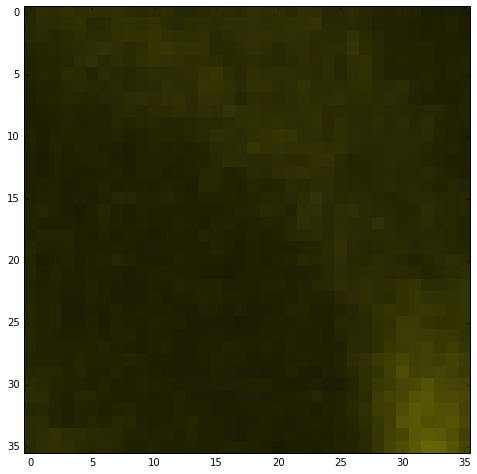

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


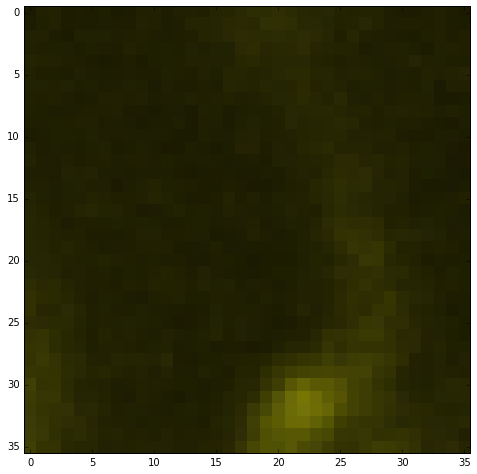

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


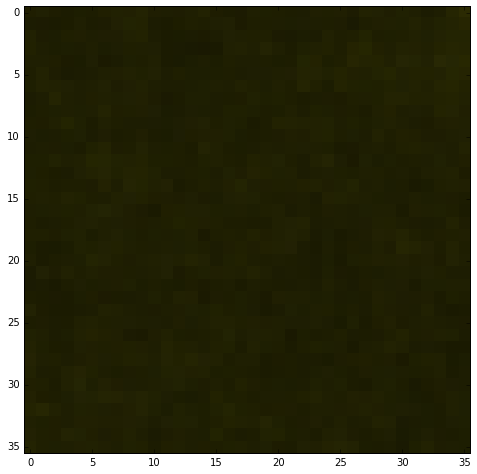

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


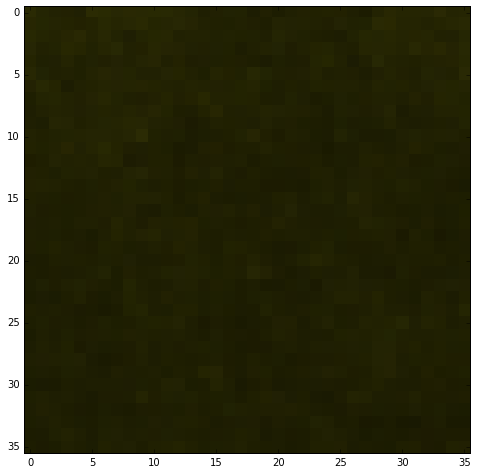

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


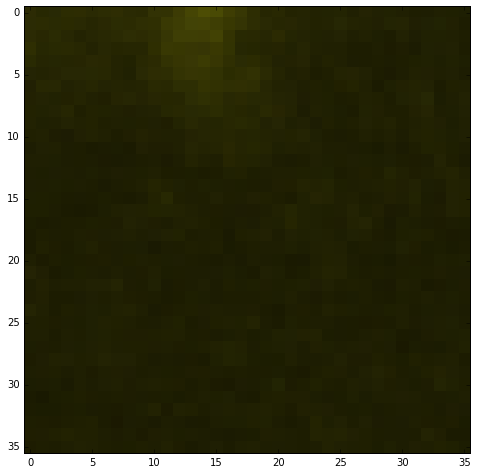

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


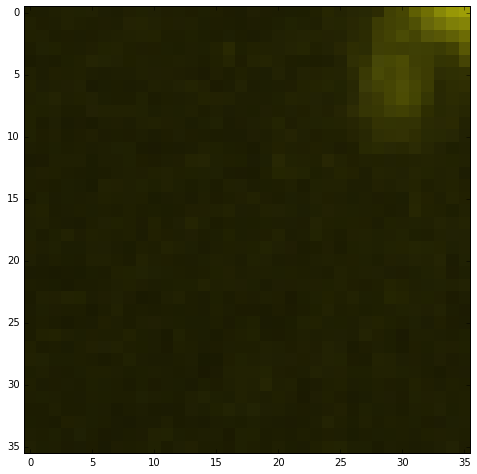

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


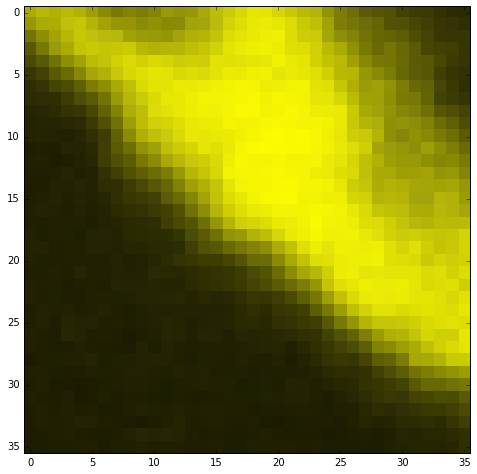

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


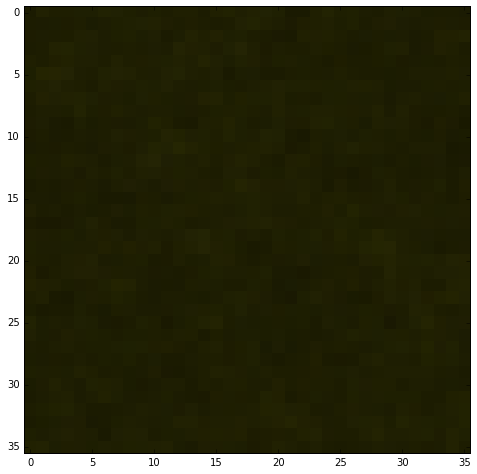

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


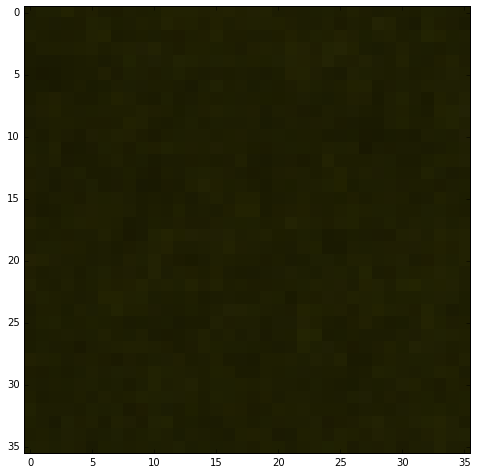

Cropped Image has shape (36, 36, 3)
This was a dendritic spine


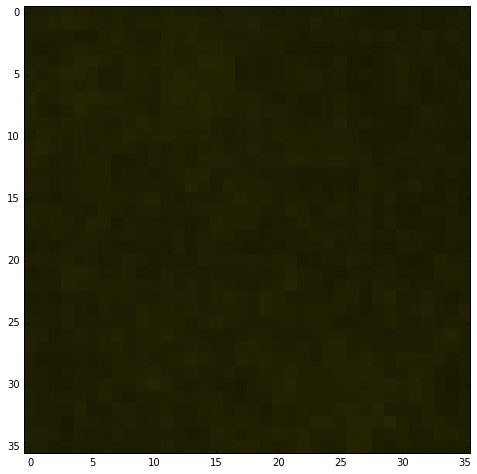

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


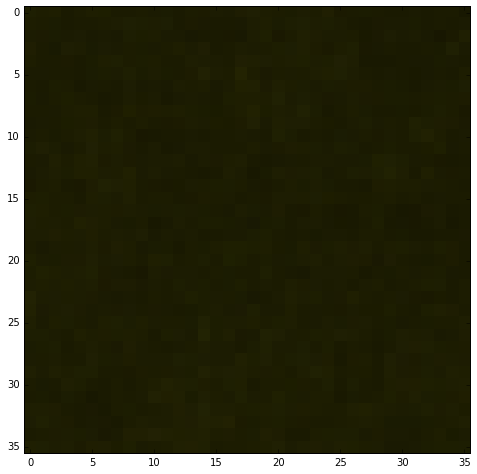

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


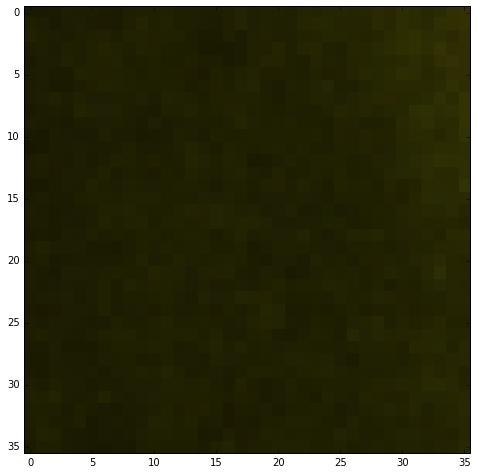

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


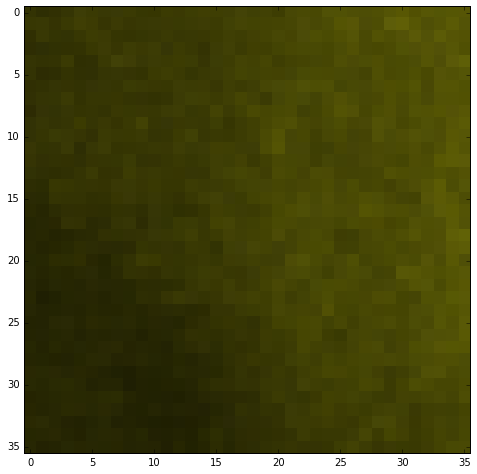

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


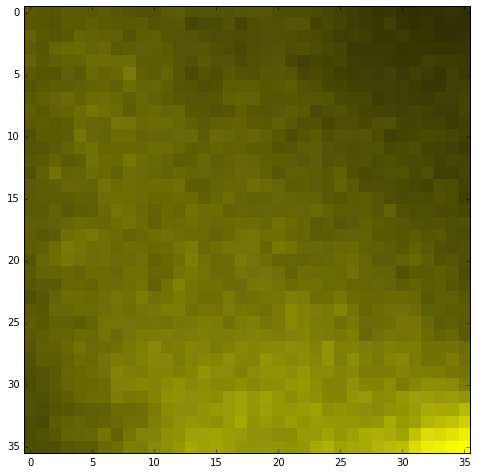

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


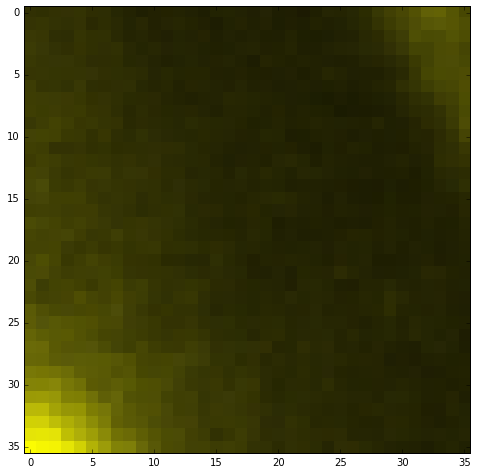

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


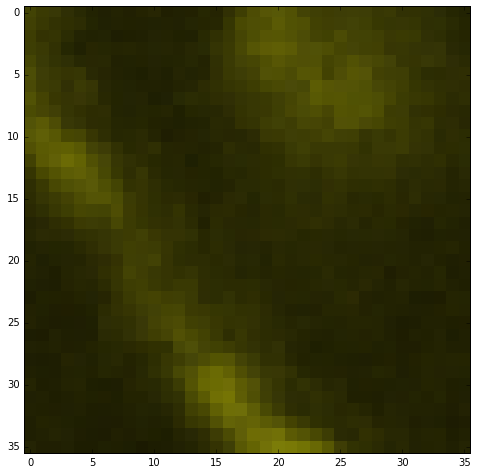

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


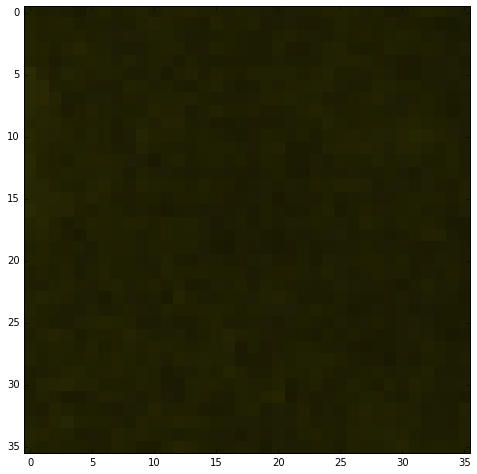

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


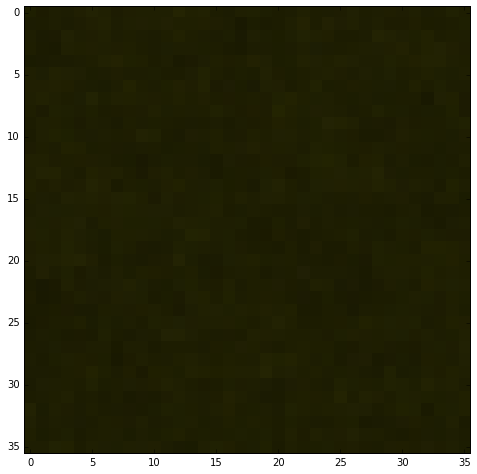

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


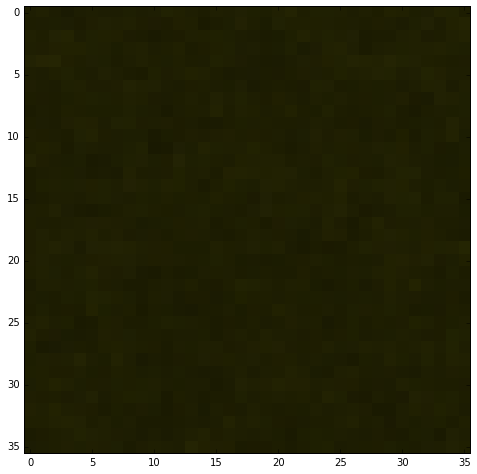

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


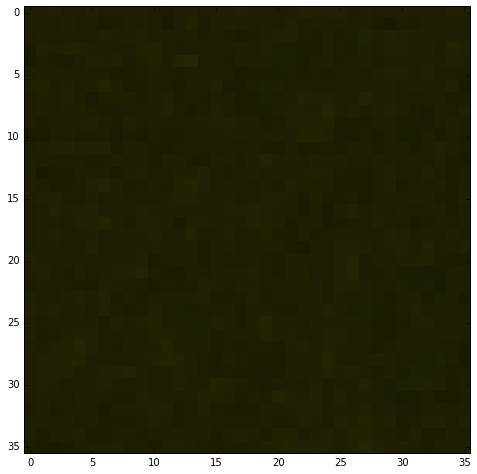

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


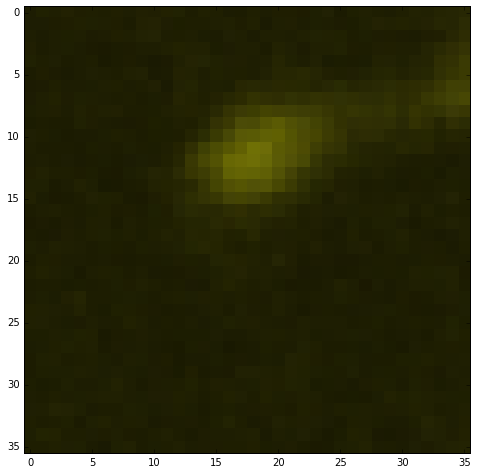

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


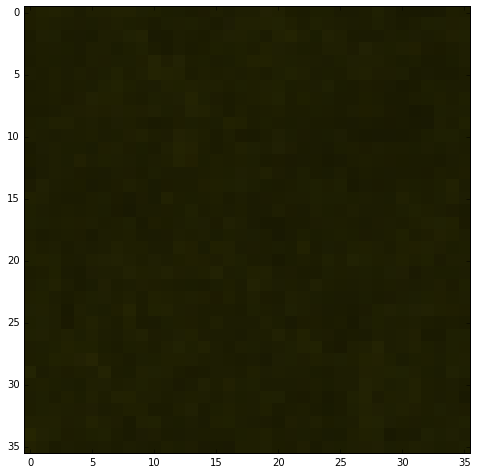

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


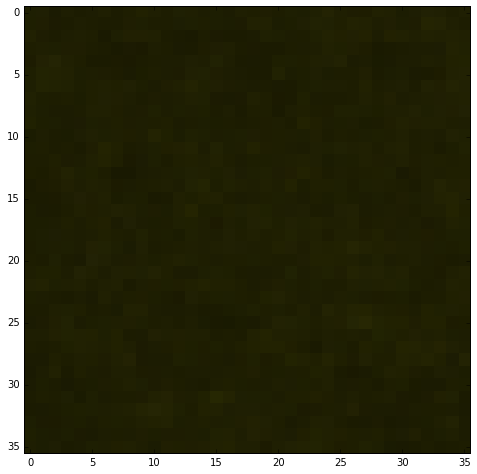

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


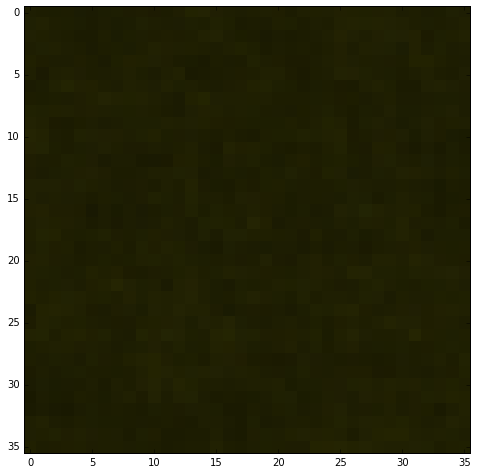

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


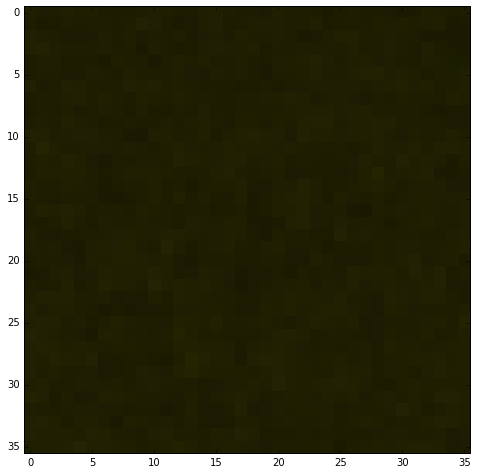

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


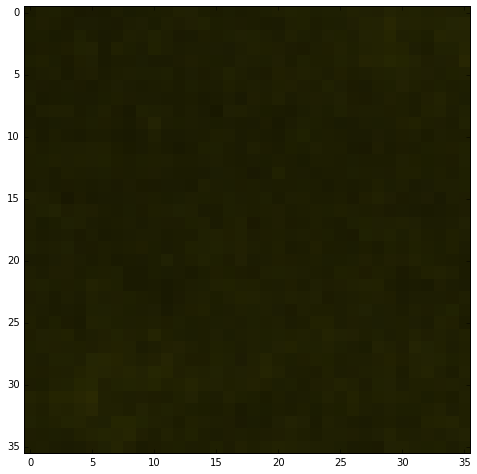

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


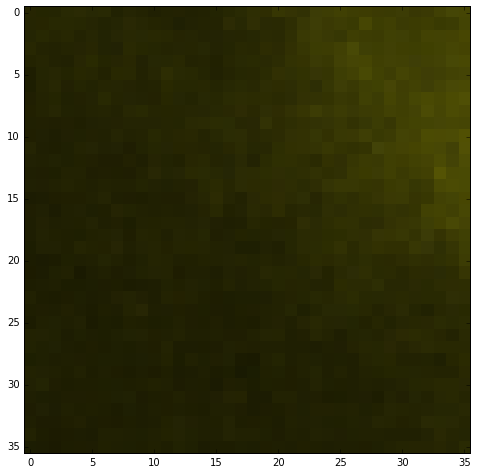

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


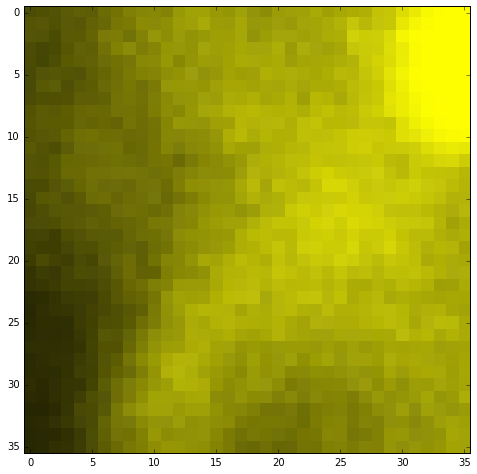

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


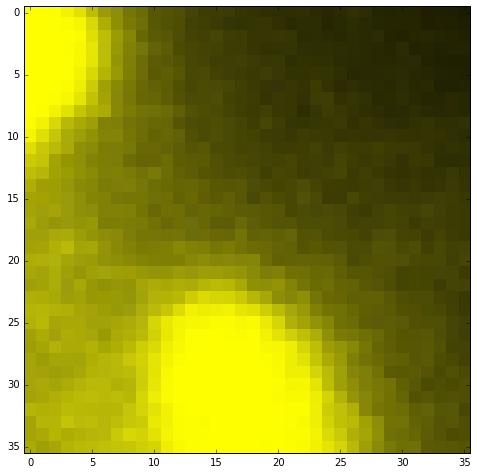

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


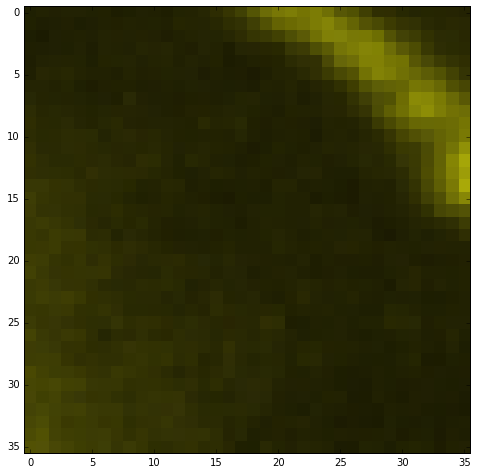

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


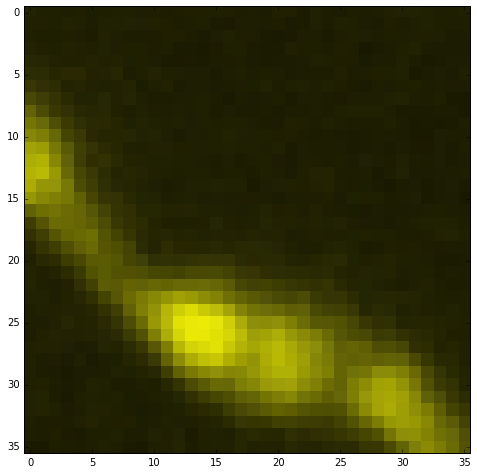

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


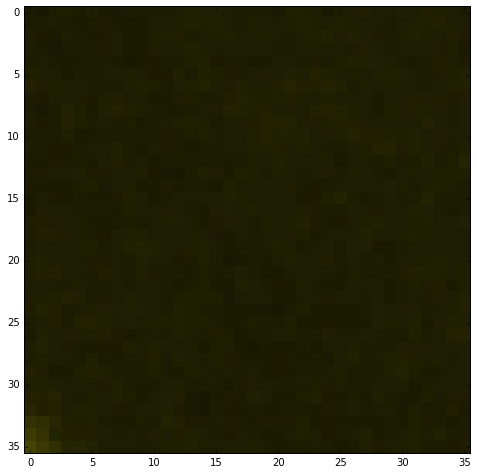

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


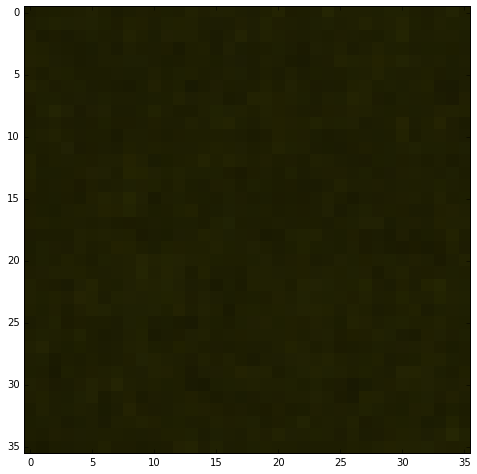

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


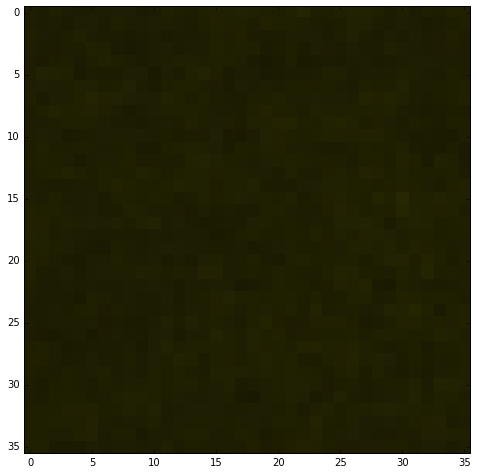

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


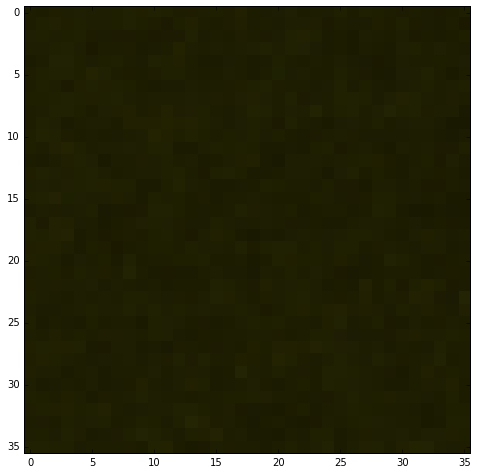

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


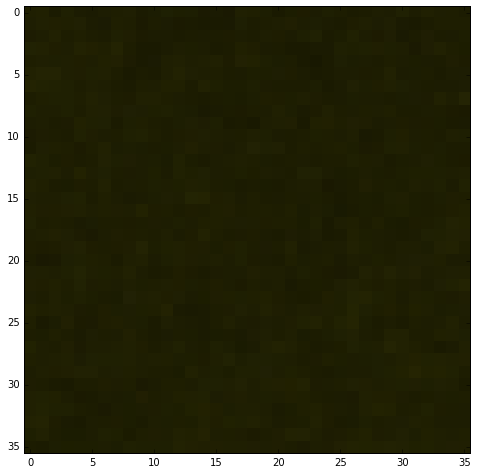

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


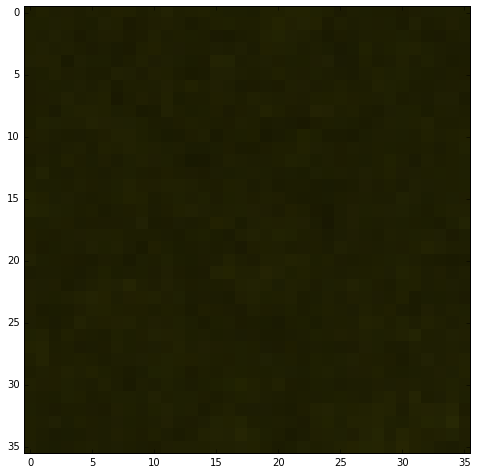

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


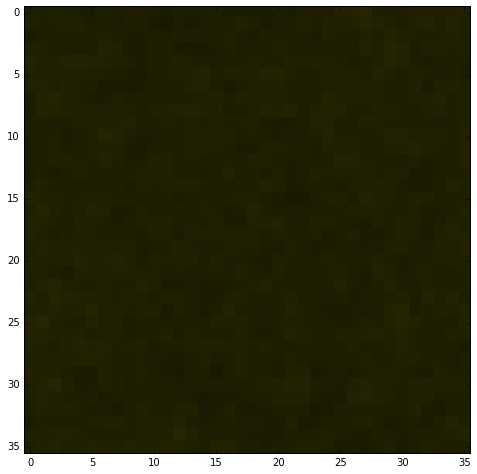

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


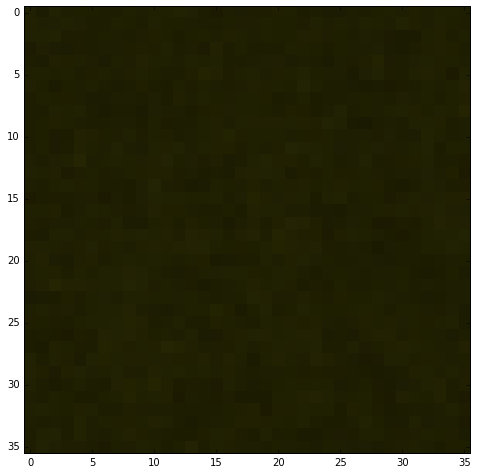

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


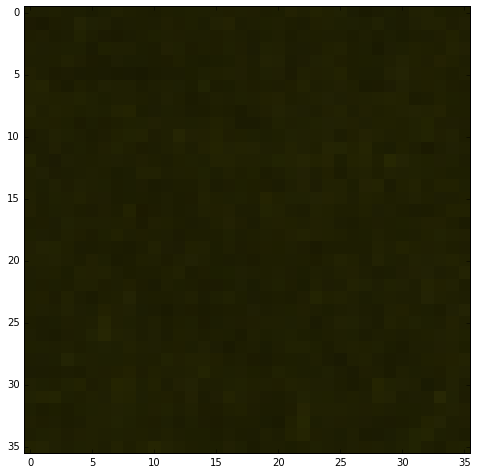

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


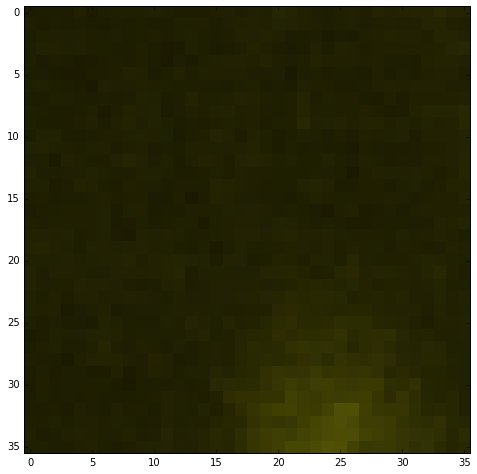

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


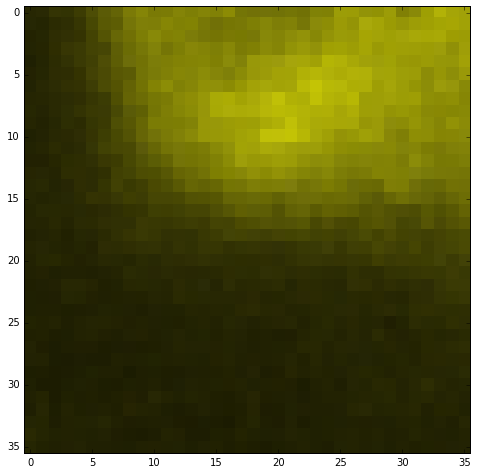

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


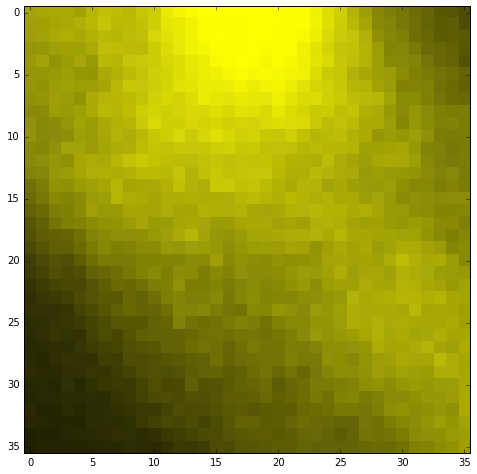

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


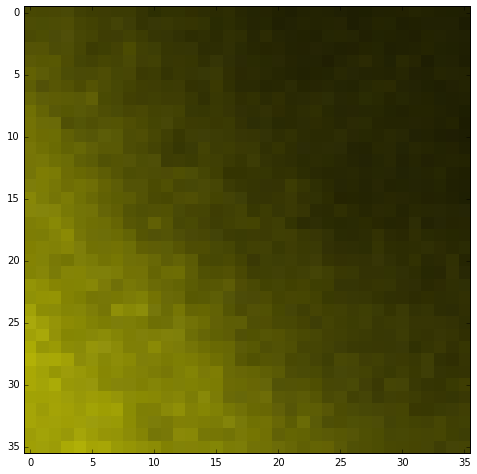

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


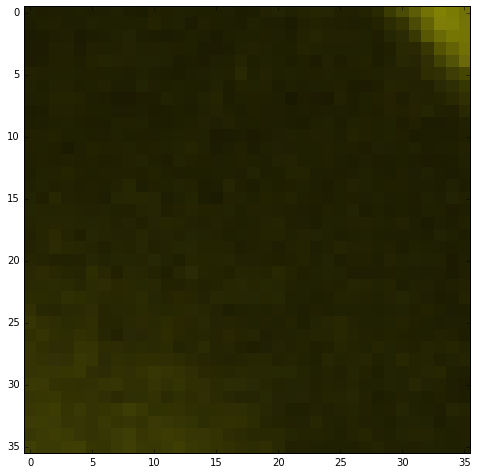

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


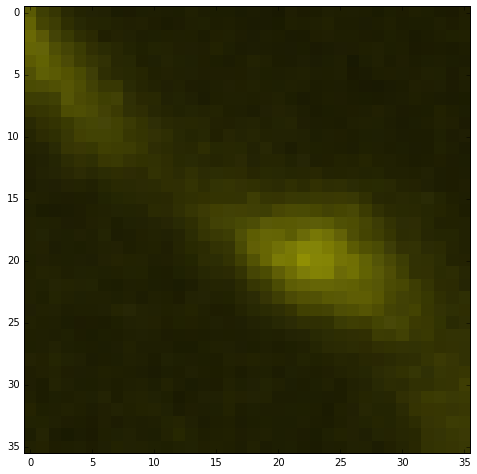

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


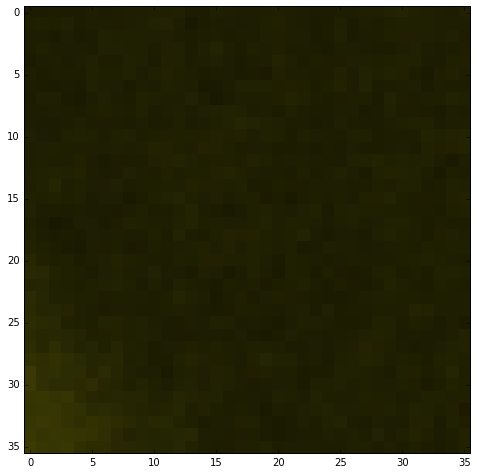

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


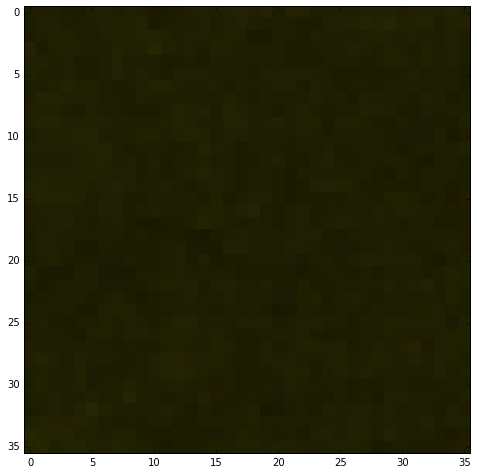

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


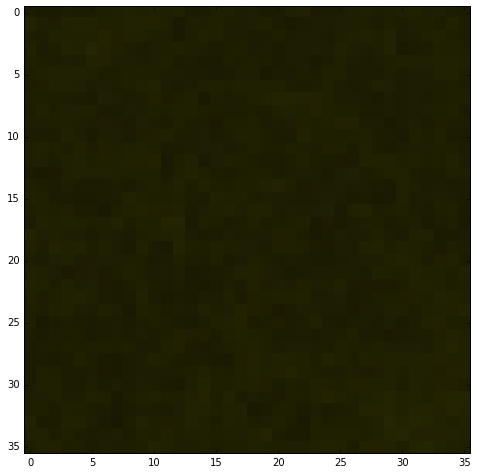

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


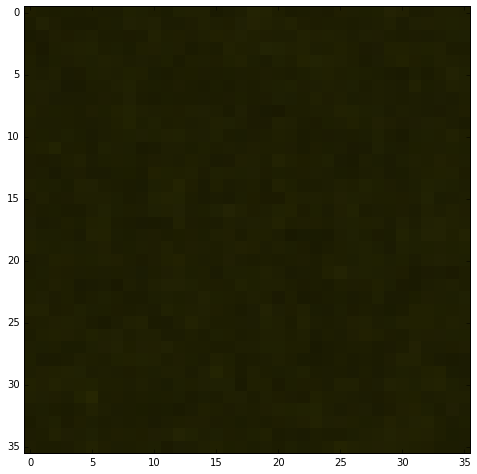

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


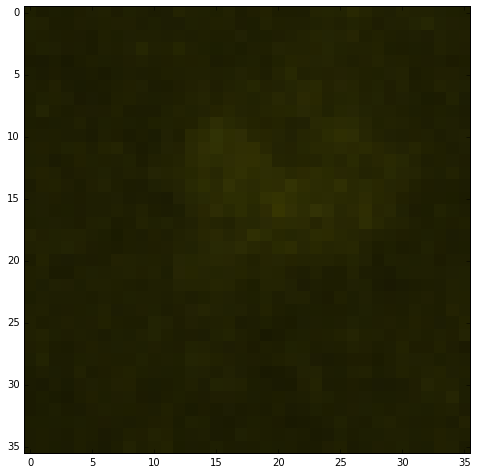

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


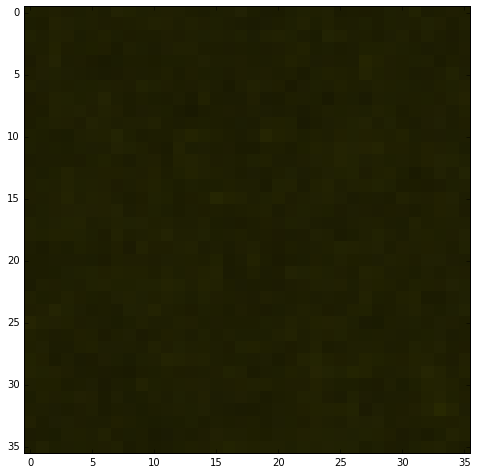

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


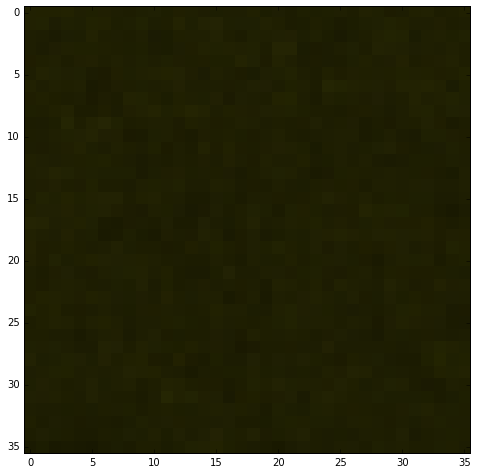

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


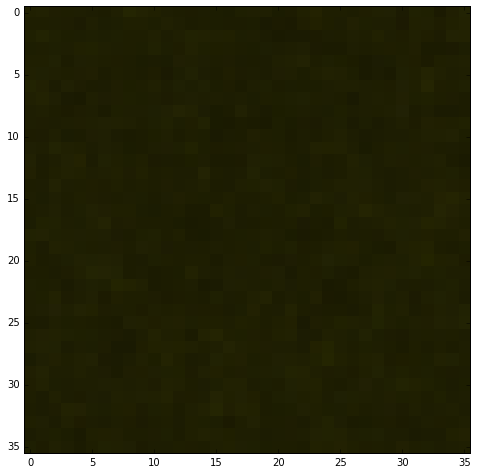

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


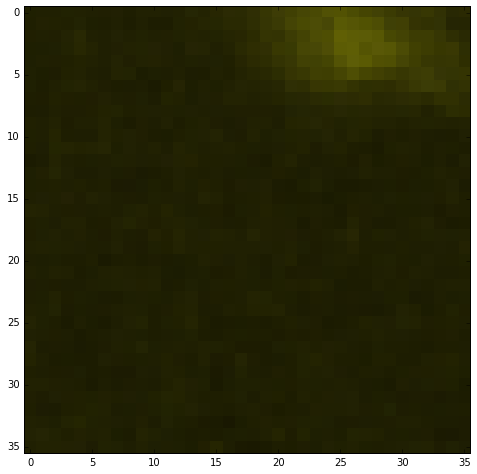

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


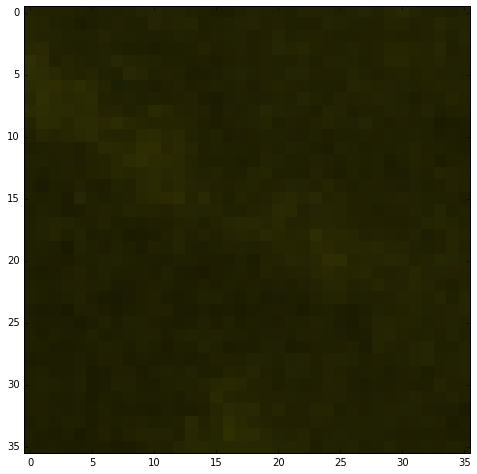

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


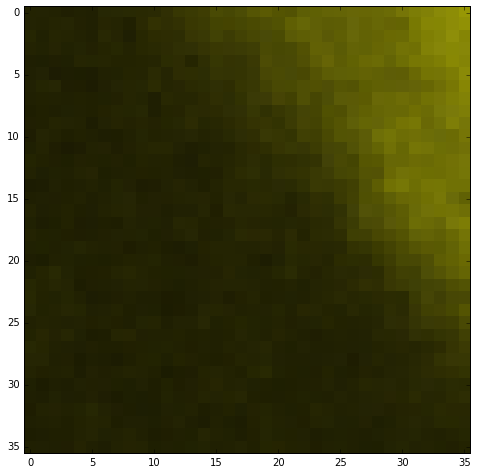

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


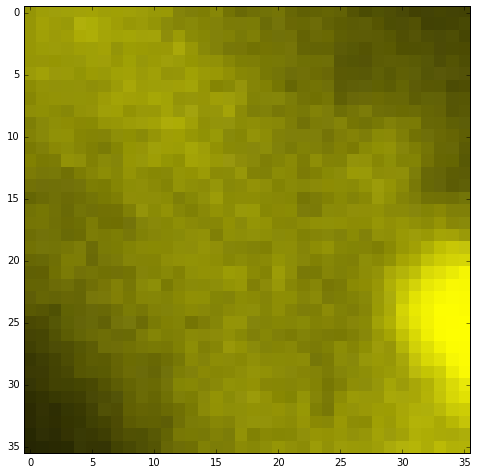

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


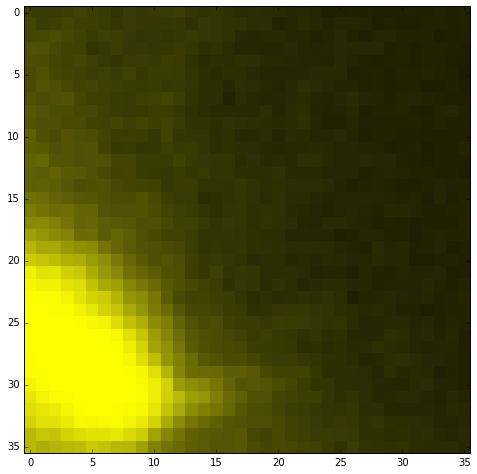

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


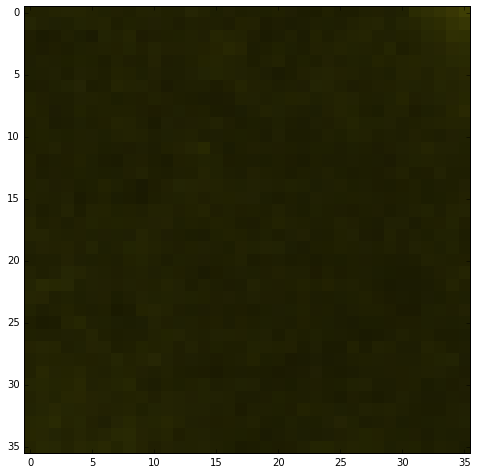

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


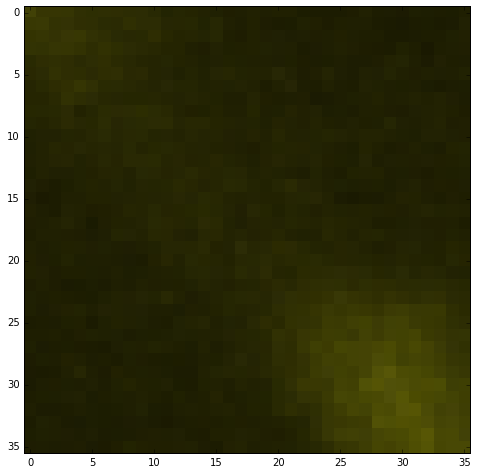

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


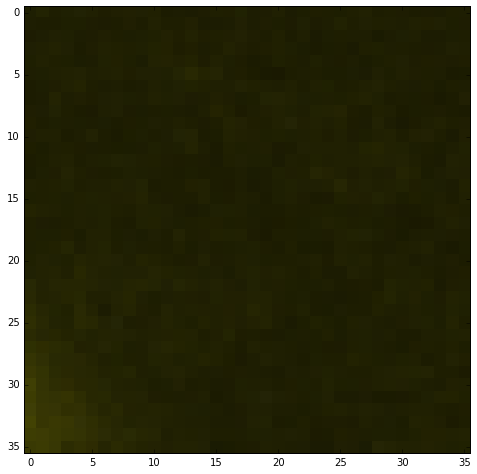

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


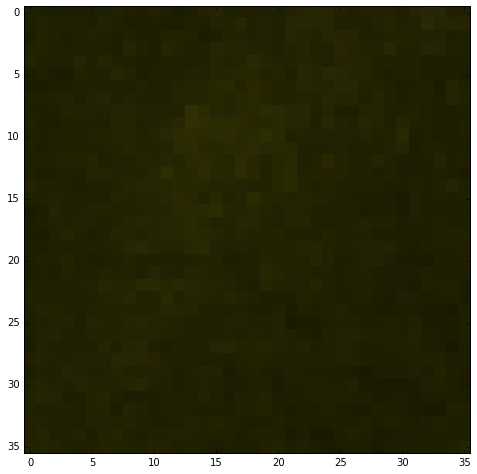

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


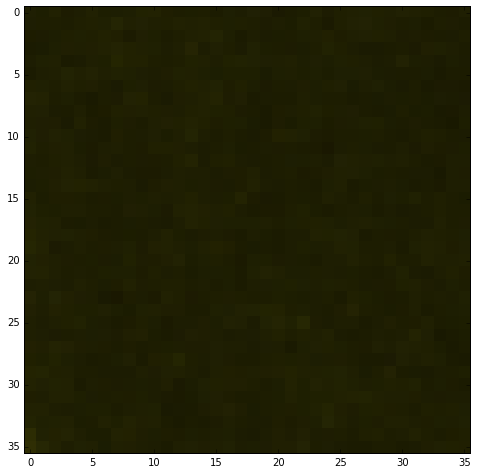

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


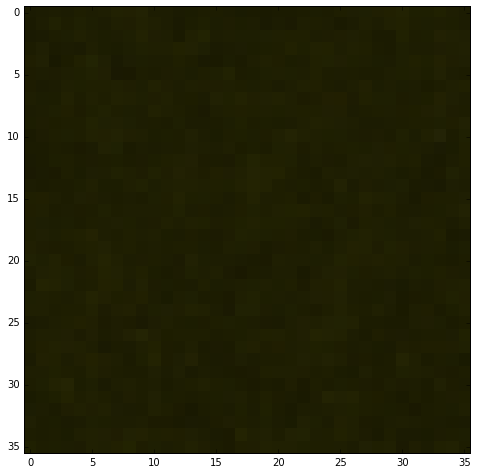

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


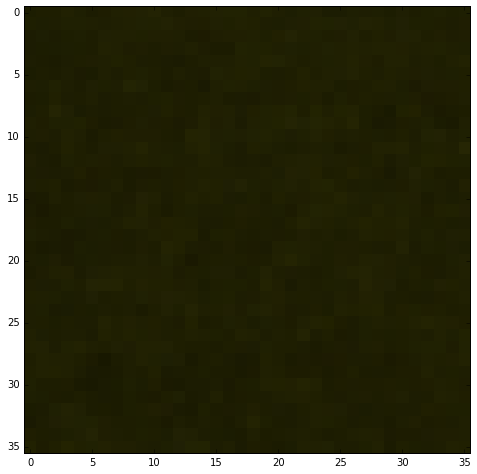

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


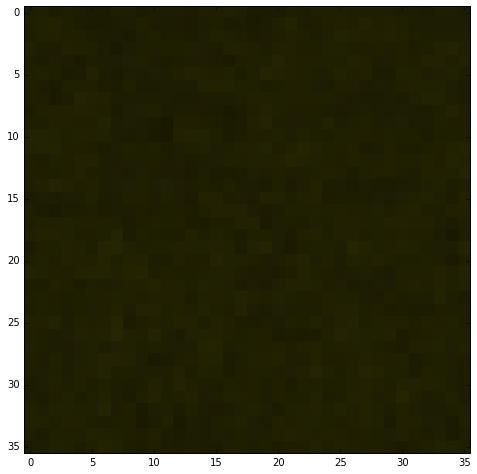

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


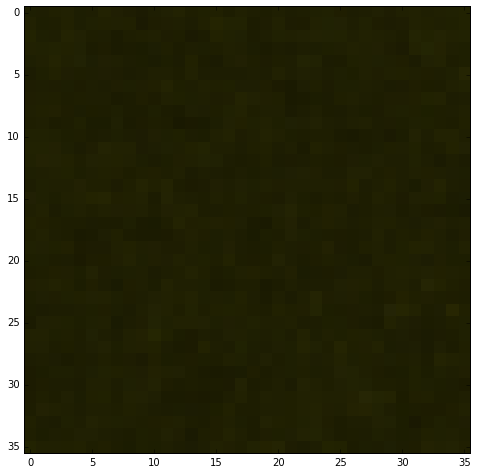

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


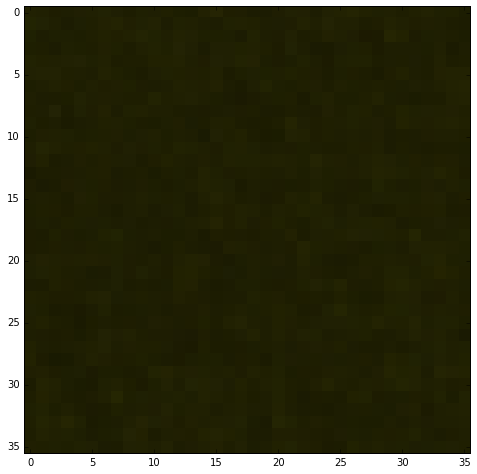

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


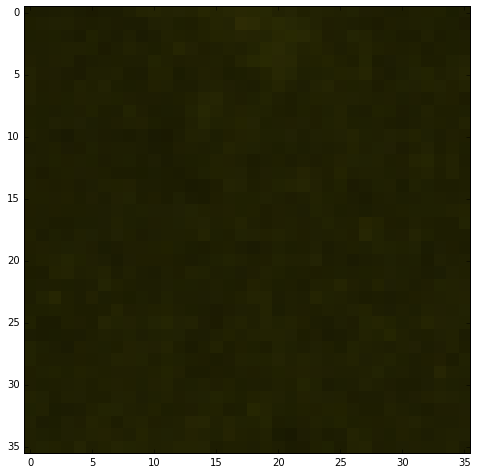

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


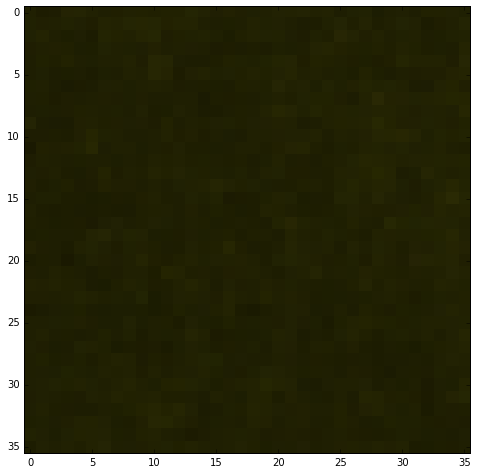

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


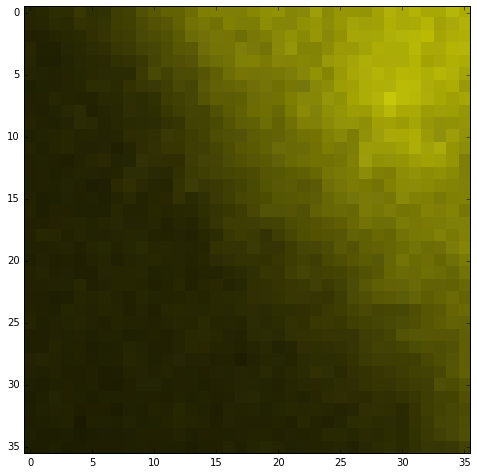

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


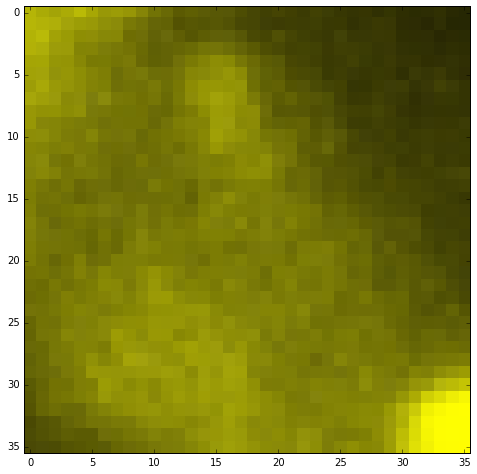

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


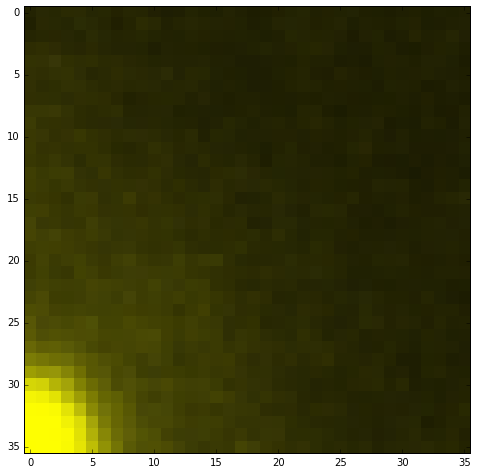

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


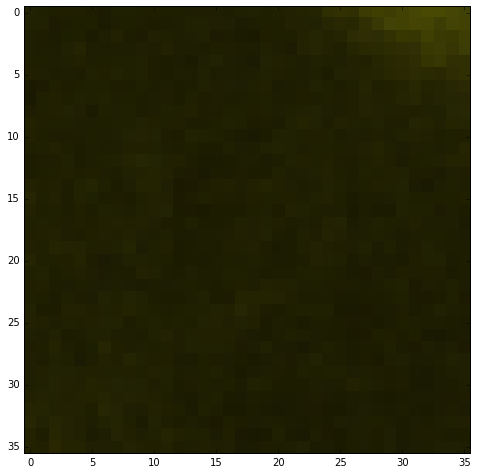

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


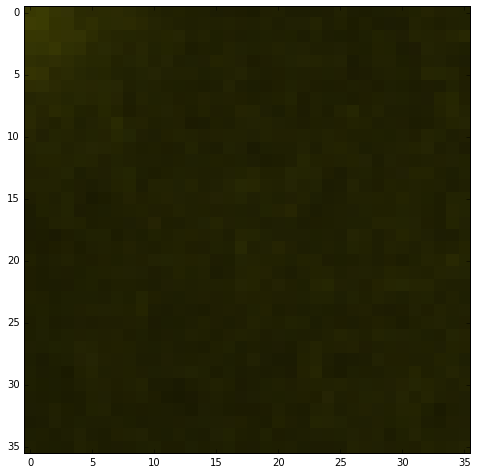

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


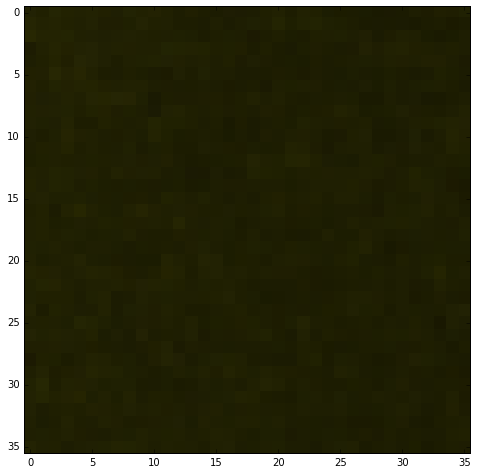

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


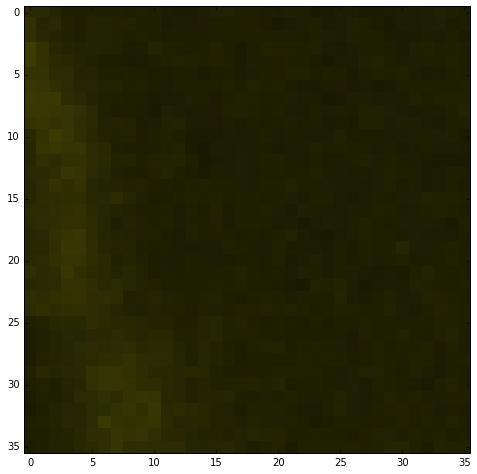

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


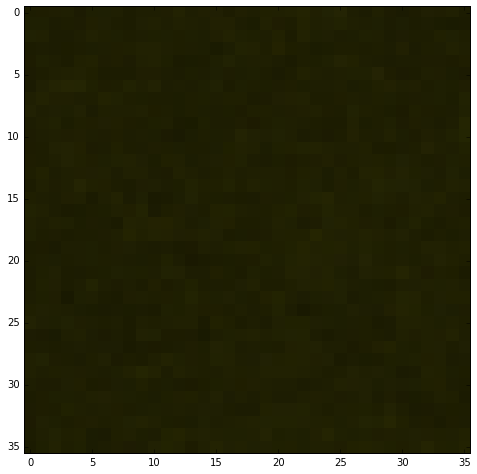

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


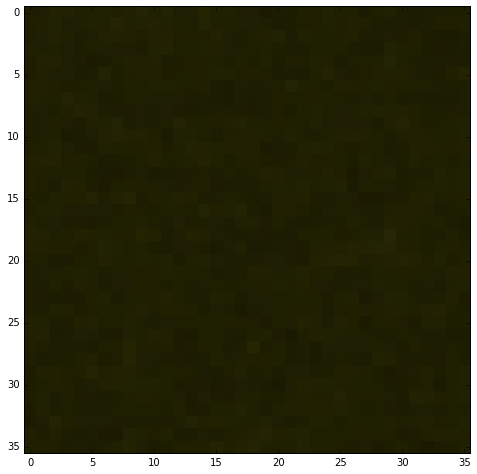

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


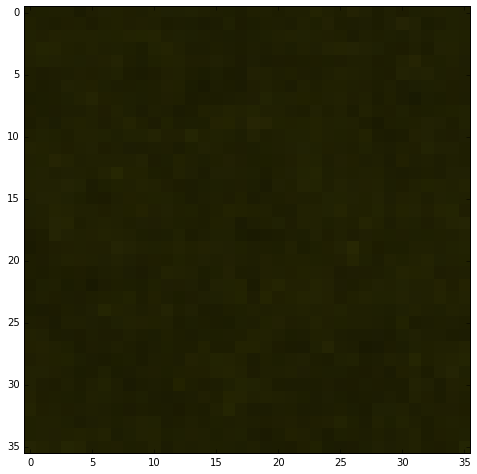

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


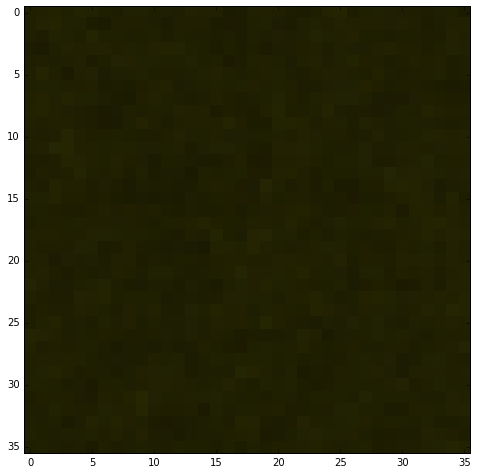

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


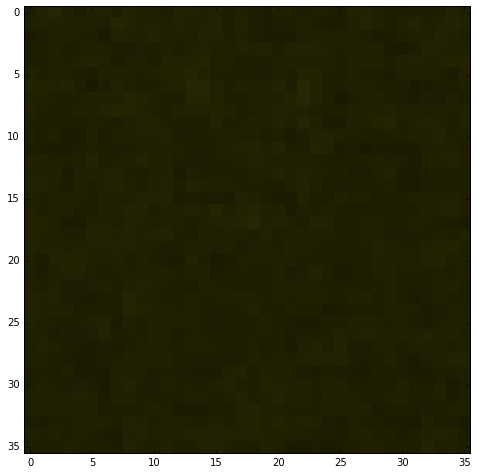

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


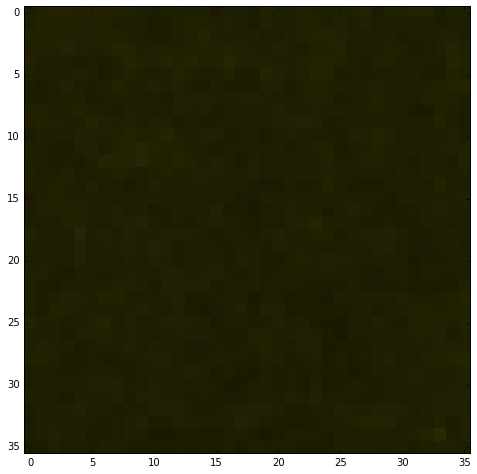

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


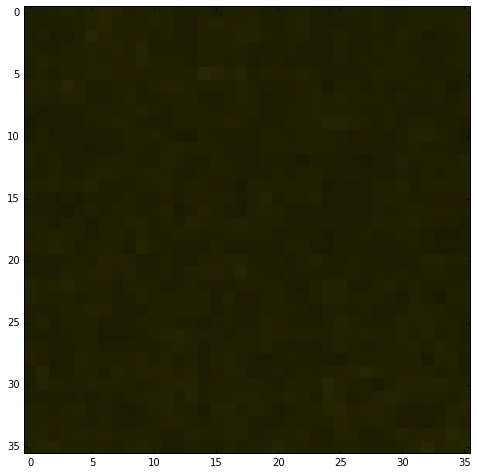

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


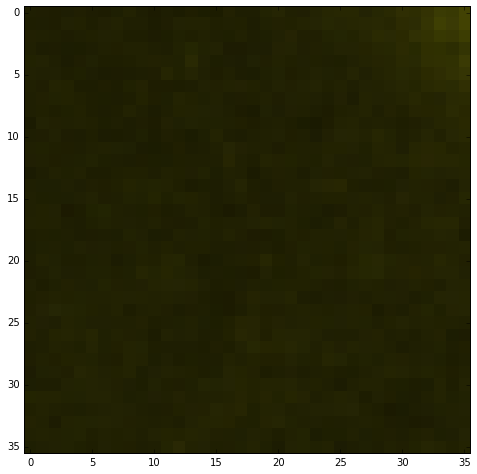

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


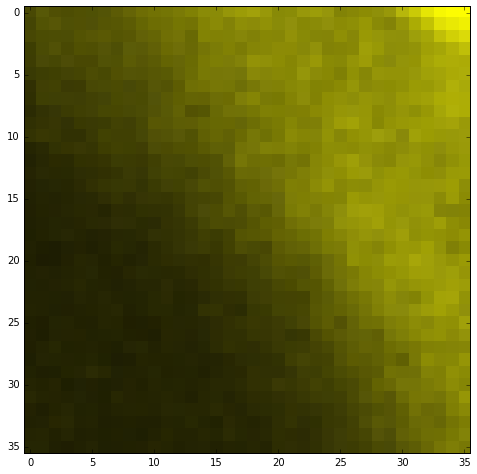

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


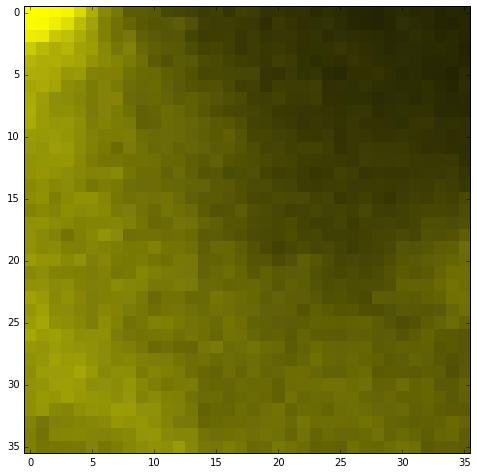

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


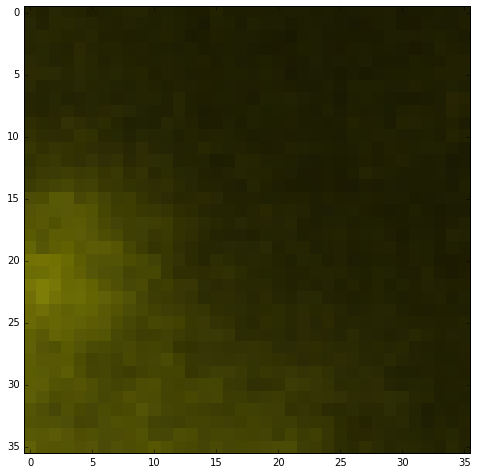

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


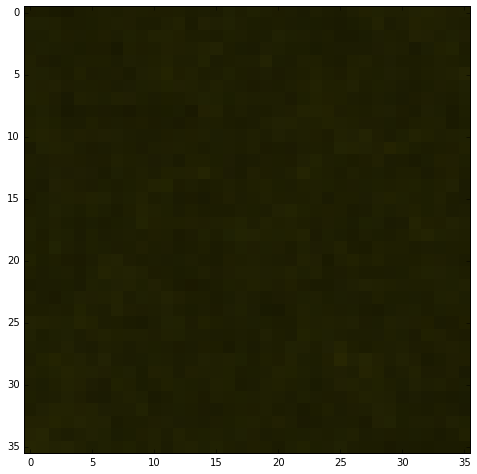

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


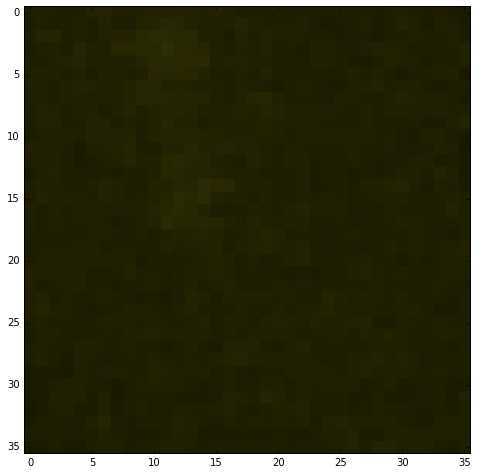

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


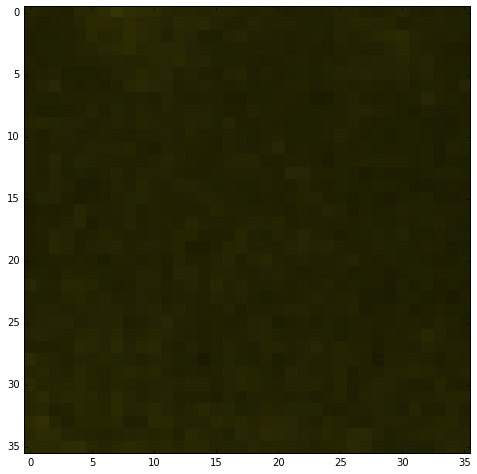

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


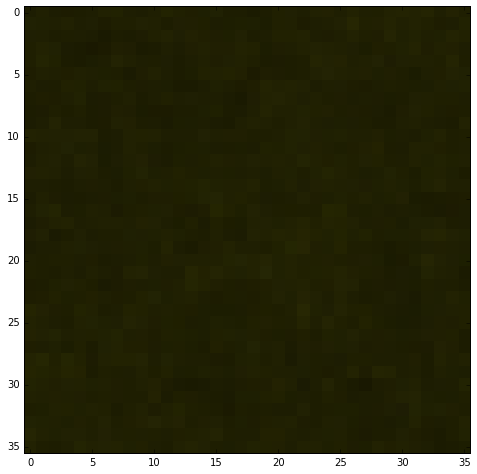

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


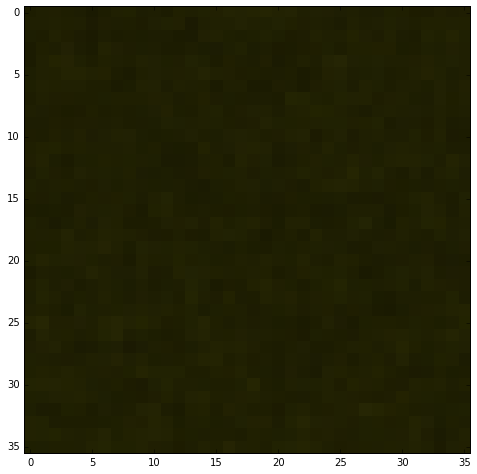

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


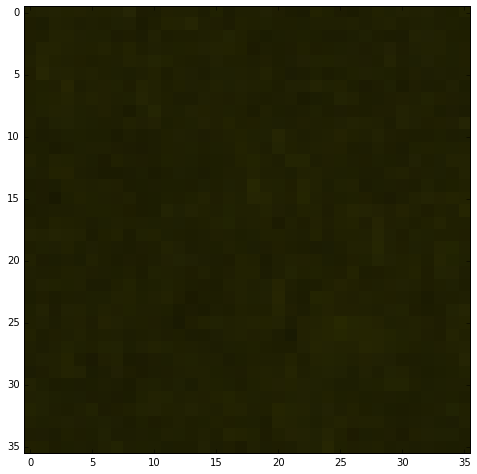

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


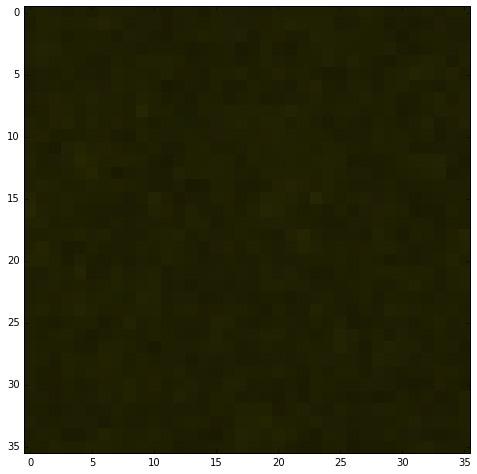

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


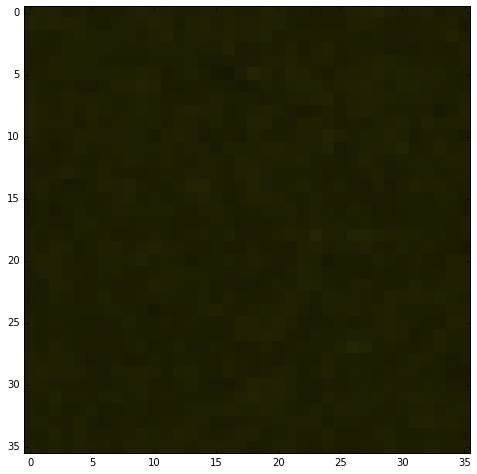

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


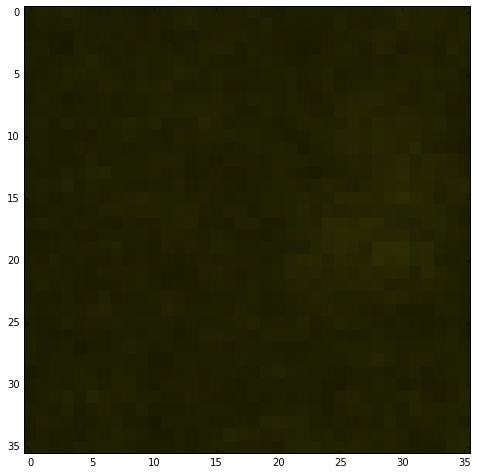

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


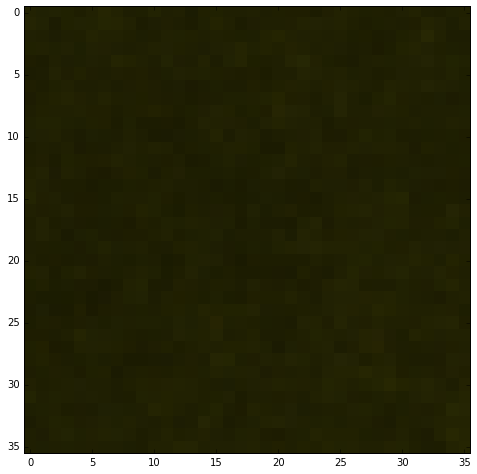

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


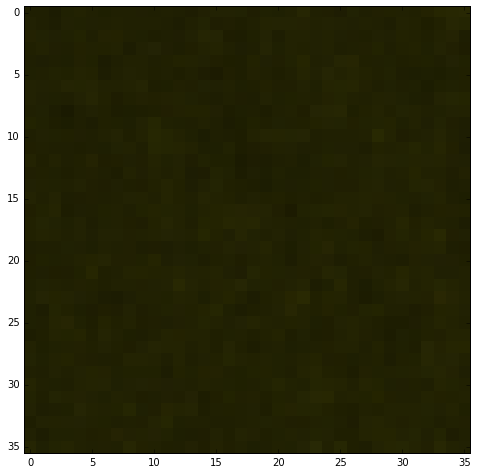

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


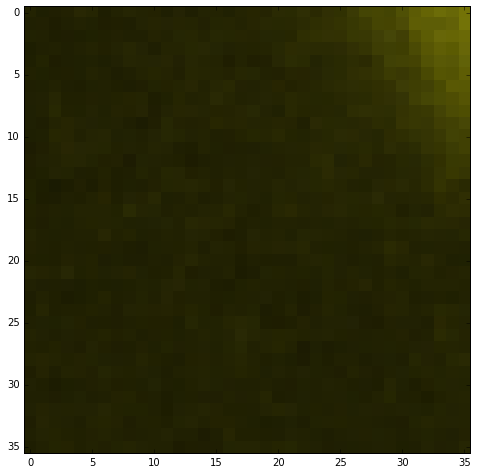

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


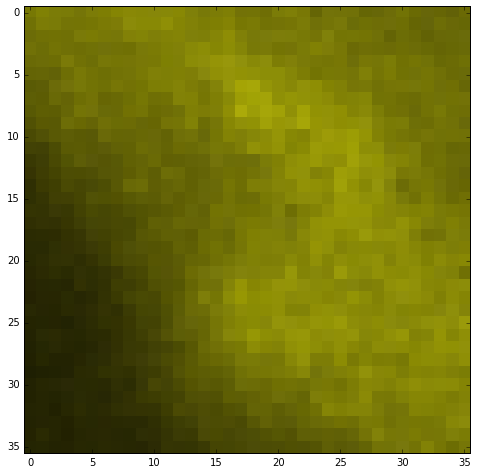

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


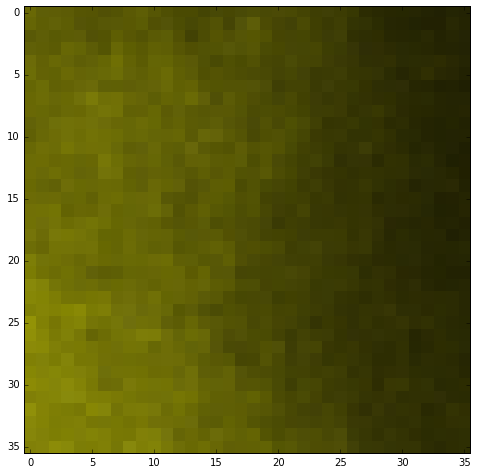

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


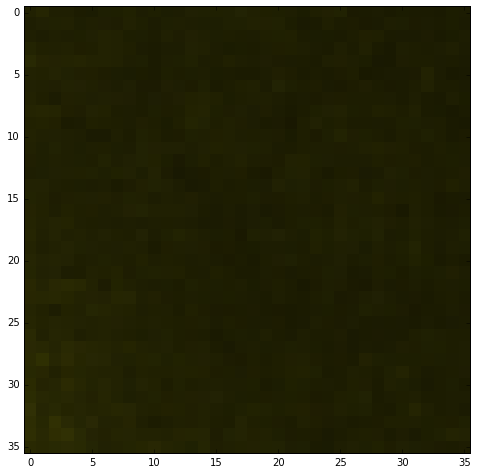

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


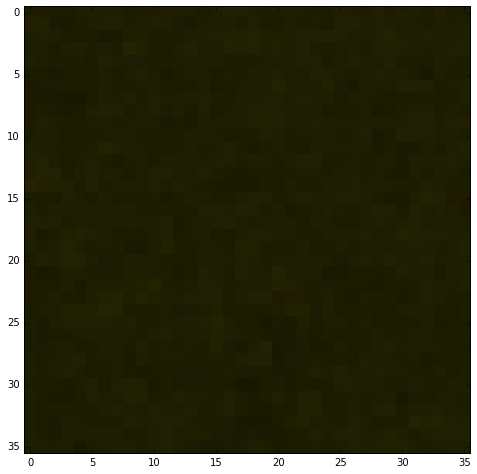

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


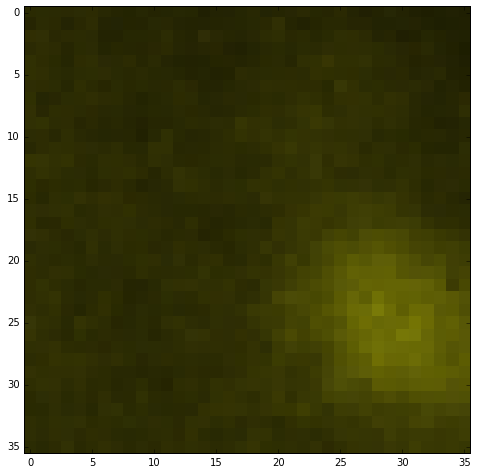

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


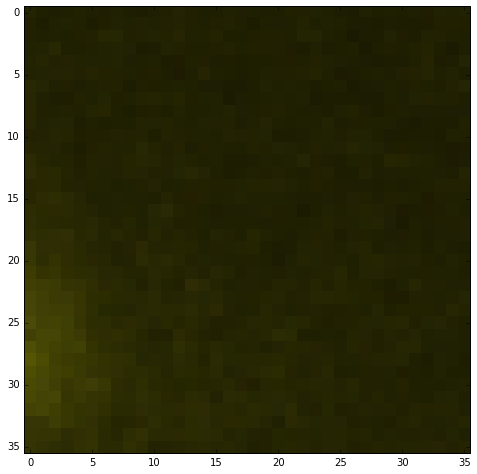

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


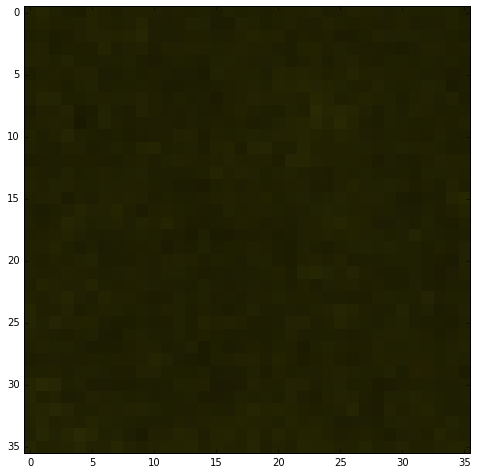

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


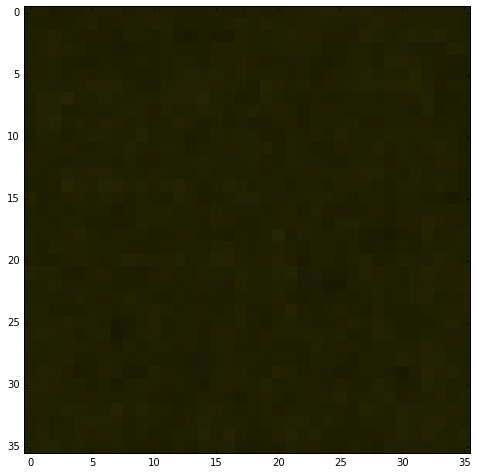

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


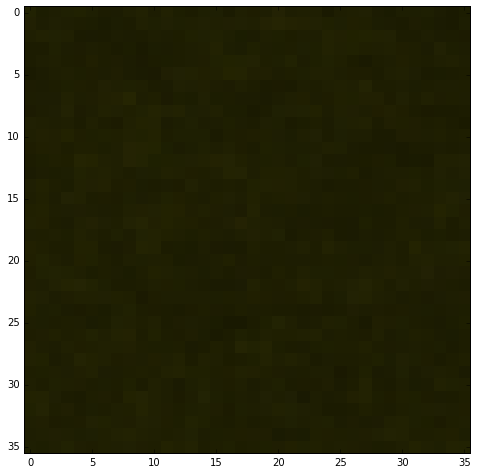

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


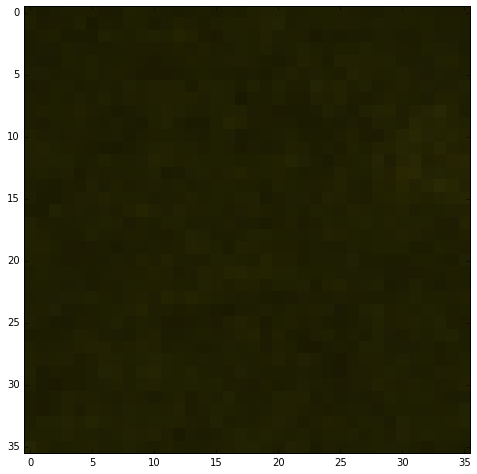

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


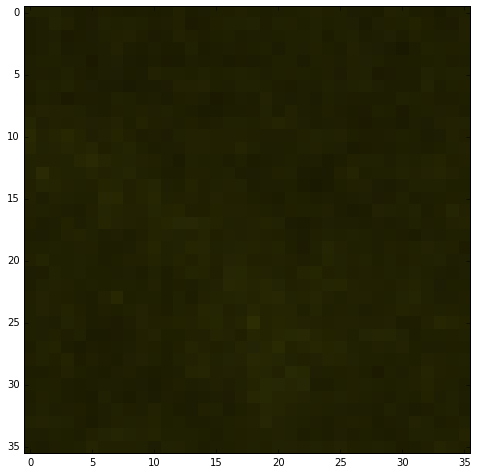

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


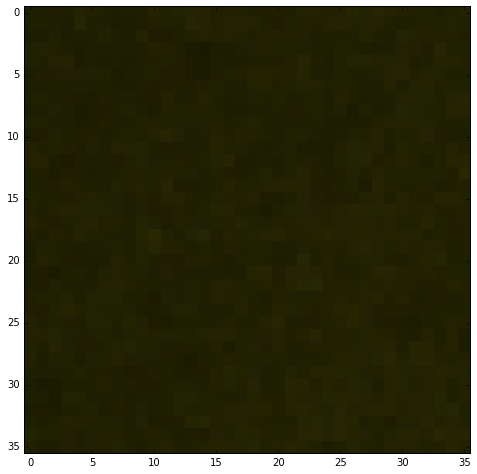

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


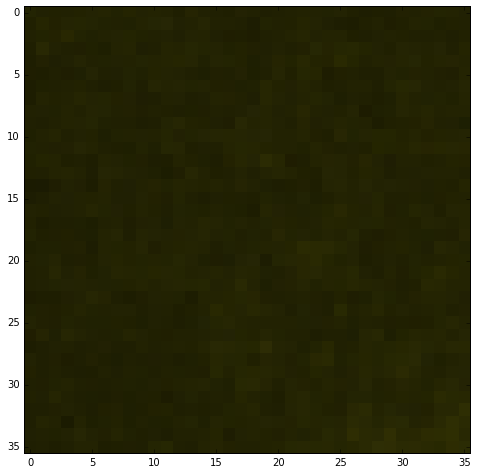

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


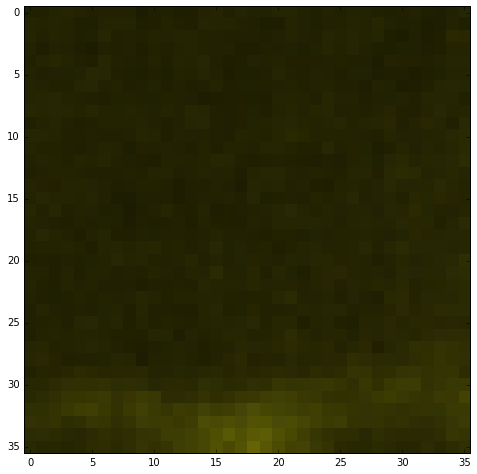

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


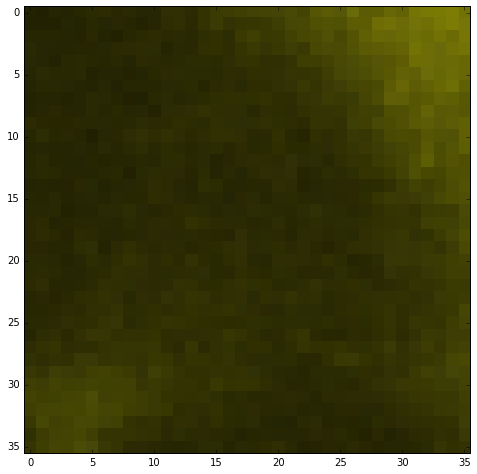

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


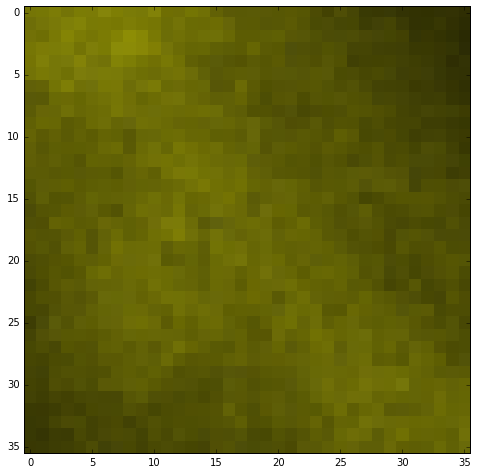

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


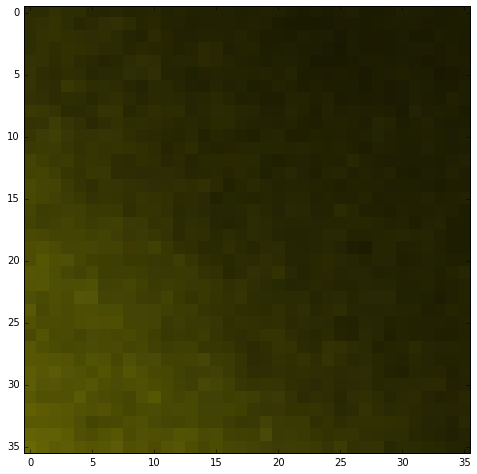

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


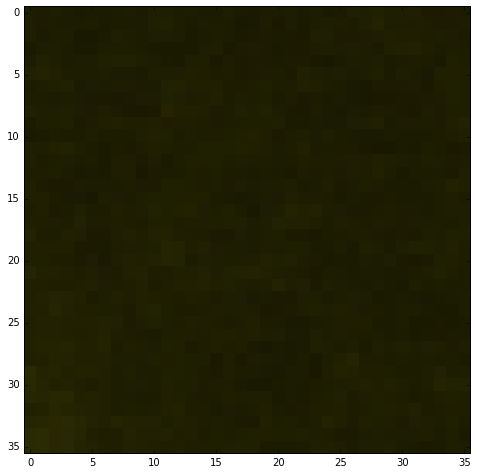

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


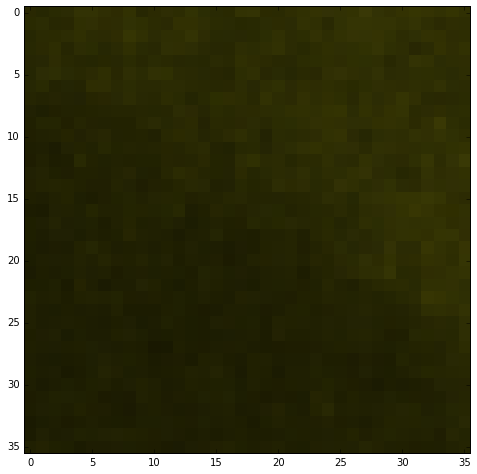

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


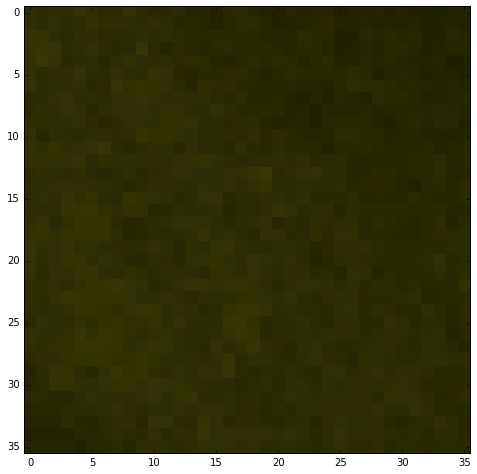

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


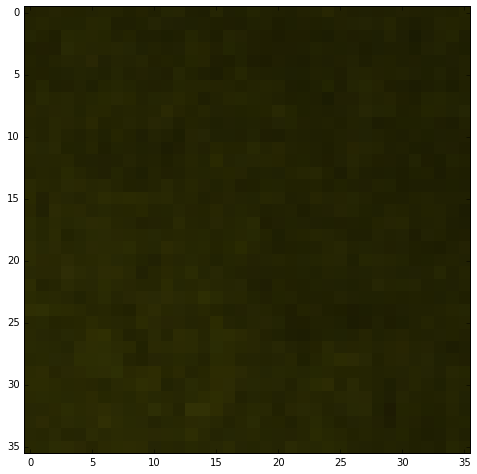

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


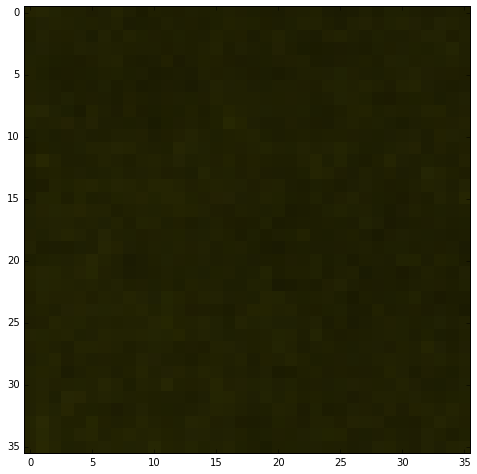

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


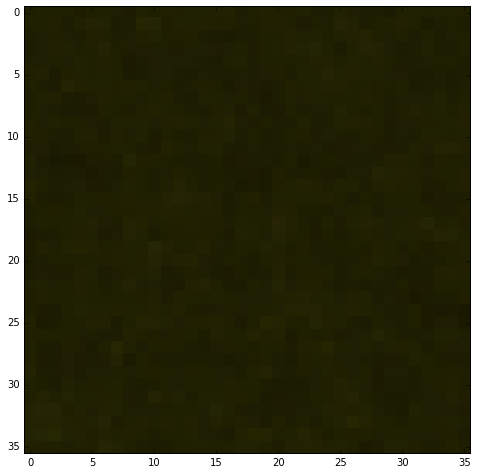

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


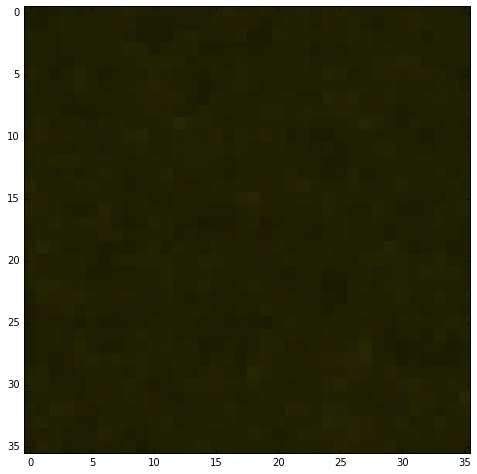

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


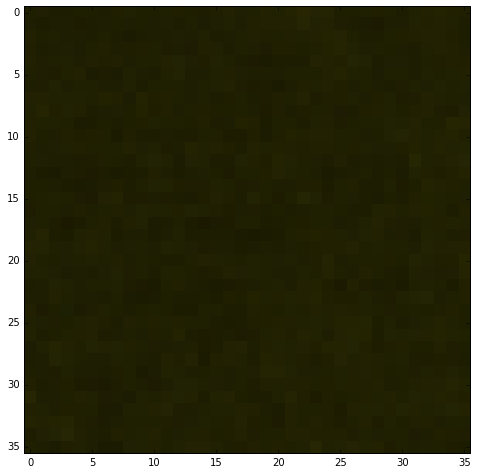

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


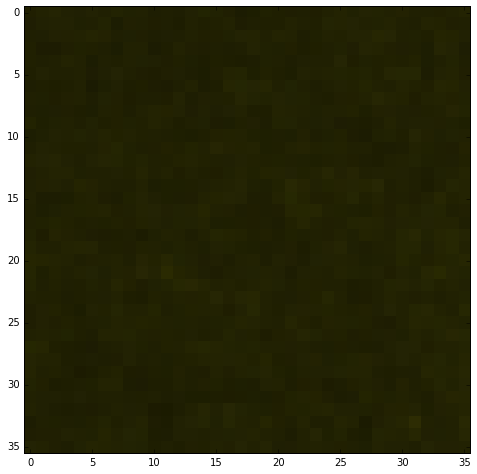

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


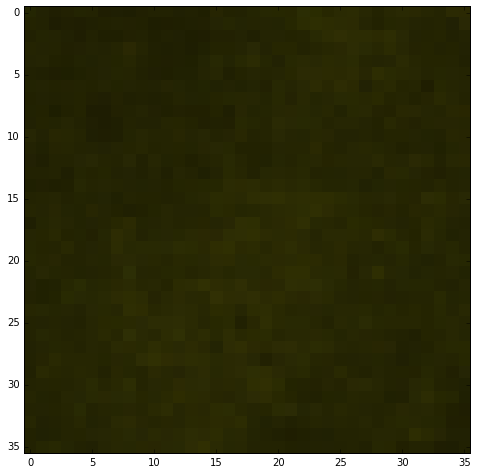

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


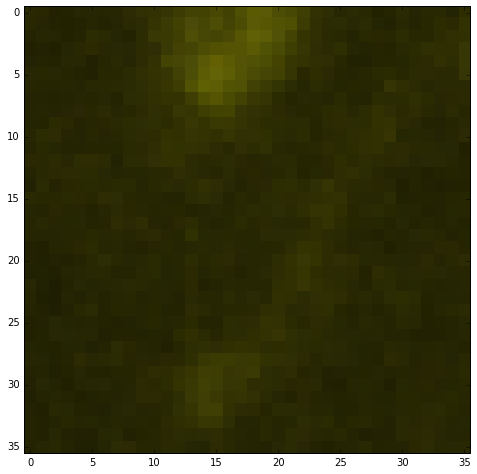

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


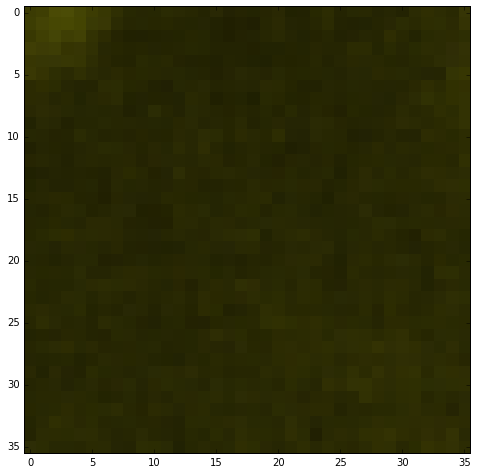

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


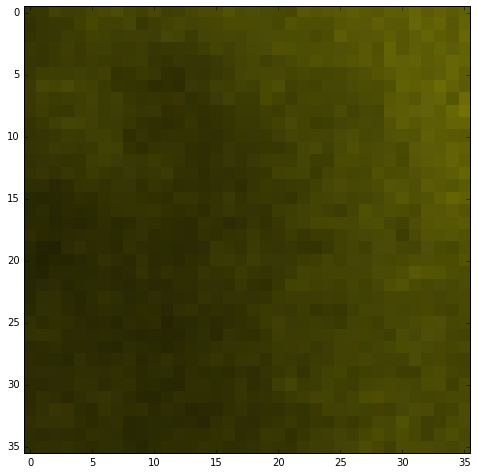

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


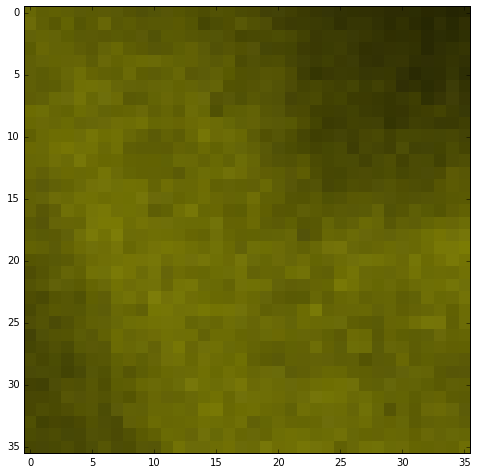

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


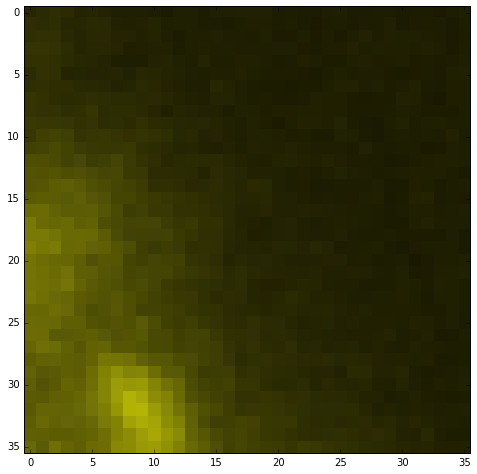

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


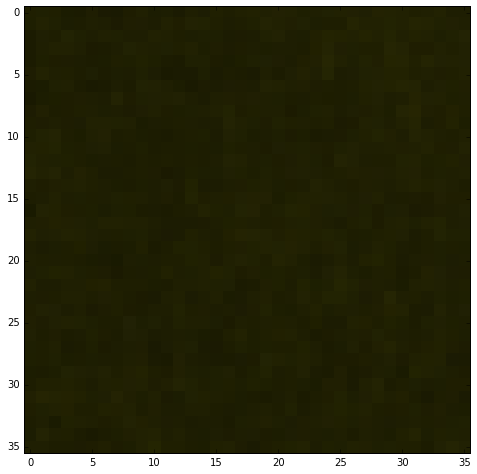

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


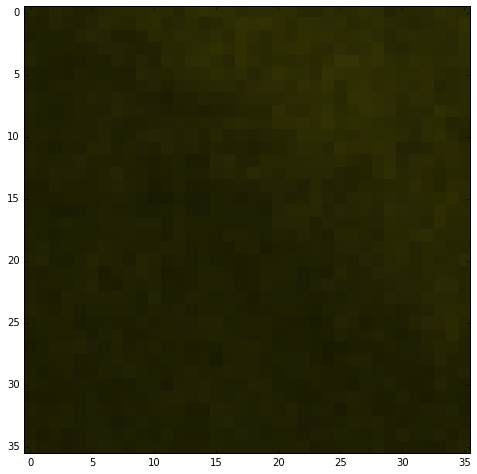

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


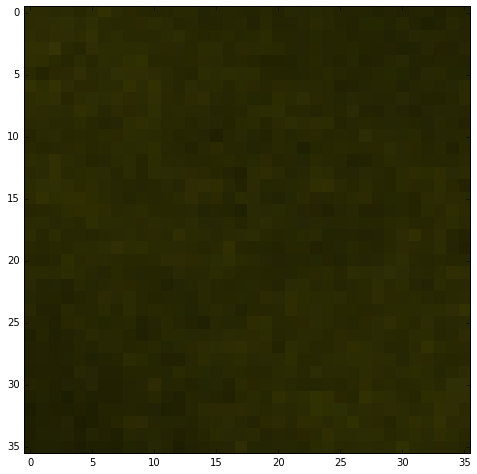

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


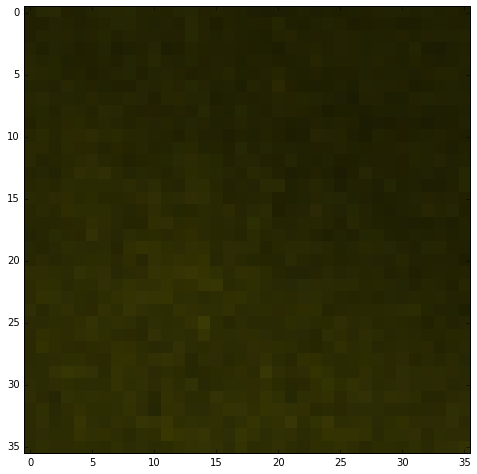

Cropped Image has shape (36, 36, 3)
This was a dendritic spine


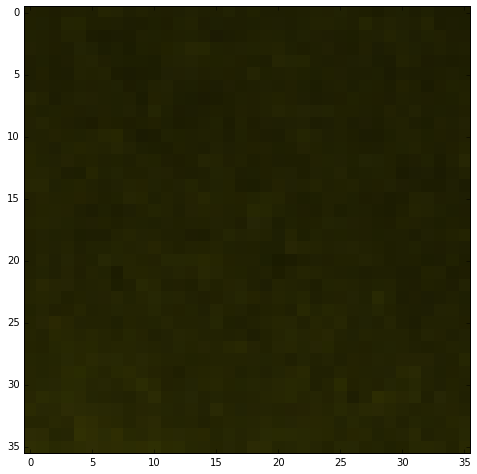

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


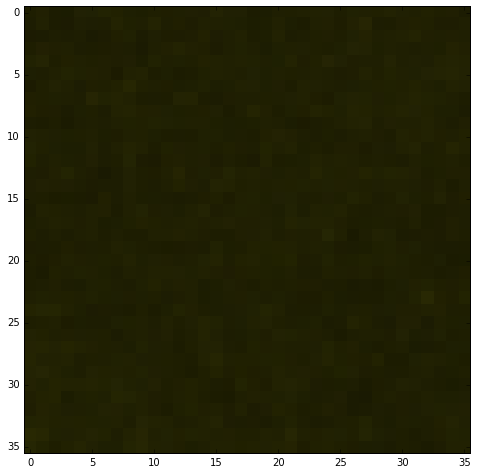

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


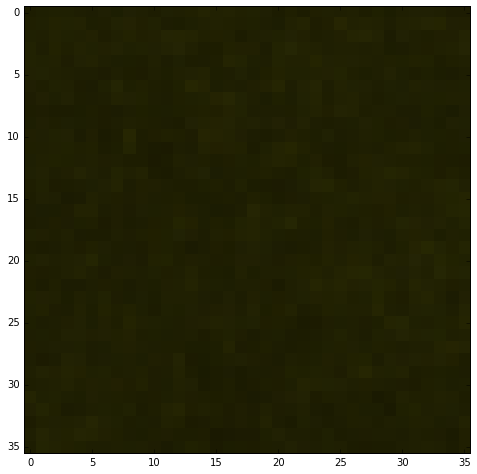

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


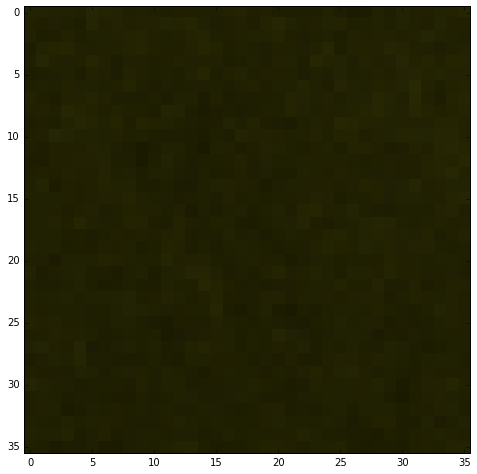

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


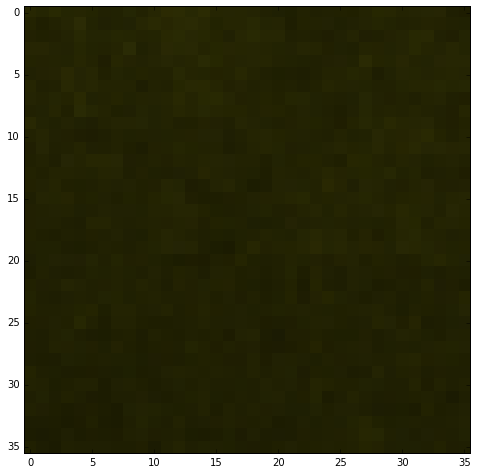

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


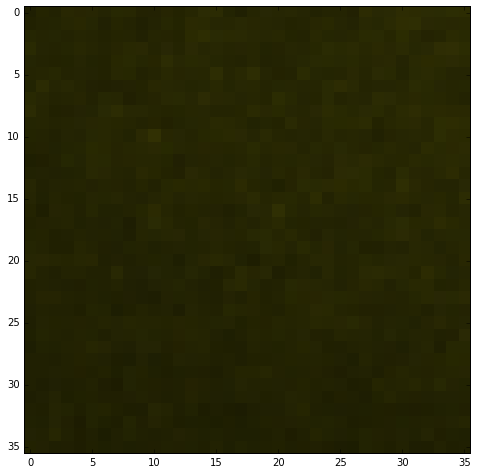

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


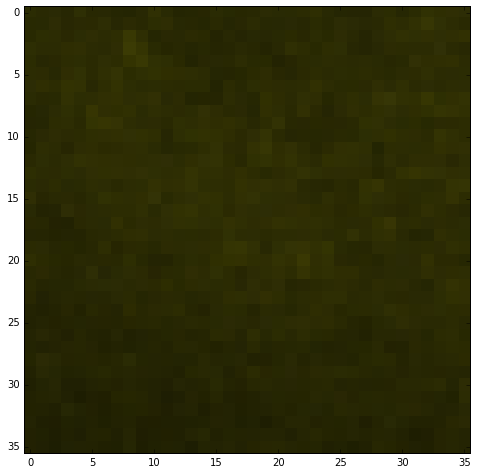

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


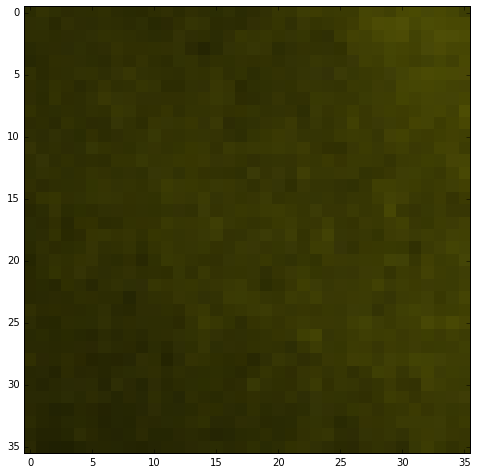

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


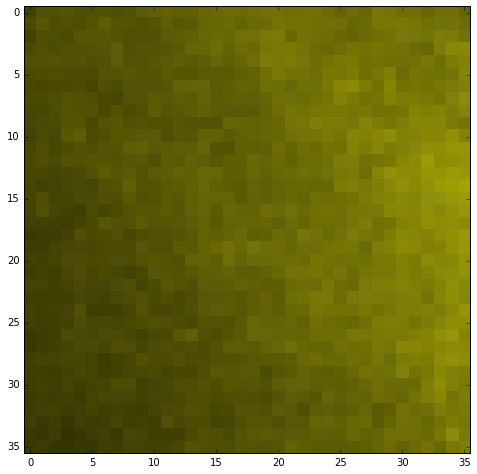

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


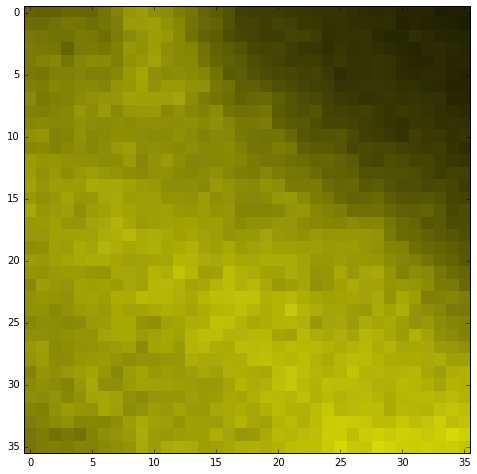

[55.8451578, 19.3204289]
[152.3612808, 73.3763395]
[137.72042150000001, 45.0408574]
[134.2451529, 40.068814700000004]
[491.182765, 154.6494527]


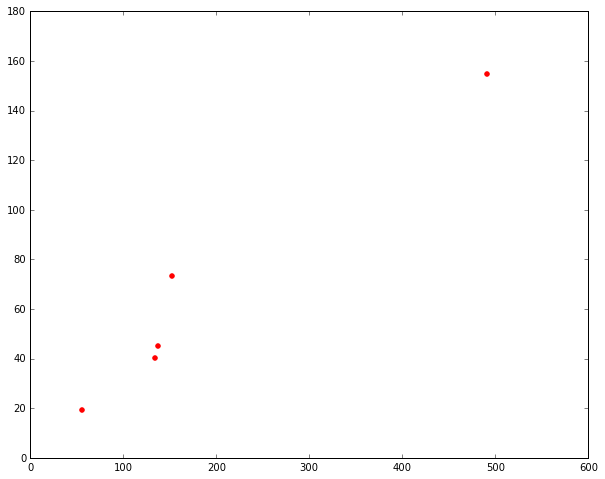

June 6 2011 (415-5)_Series008_z008_ch00
im shape (512, 512, 3)
Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


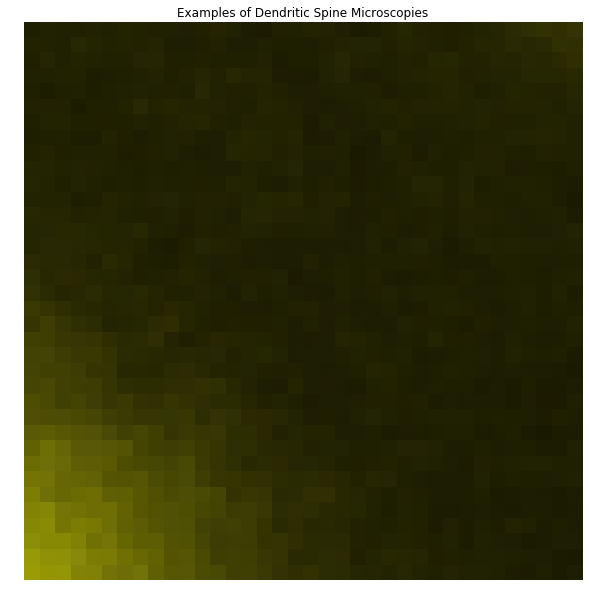

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


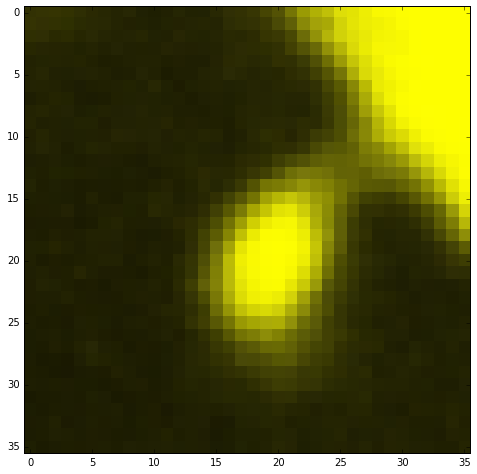

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


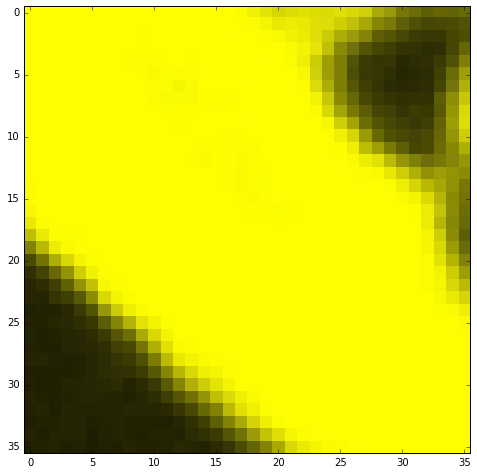

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


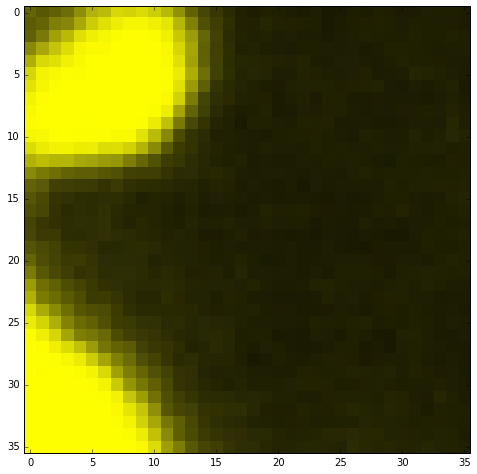

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


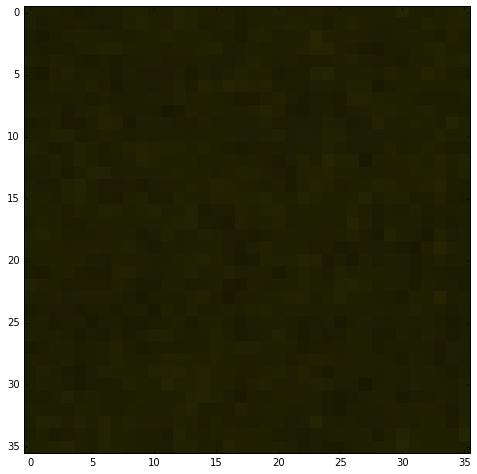

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


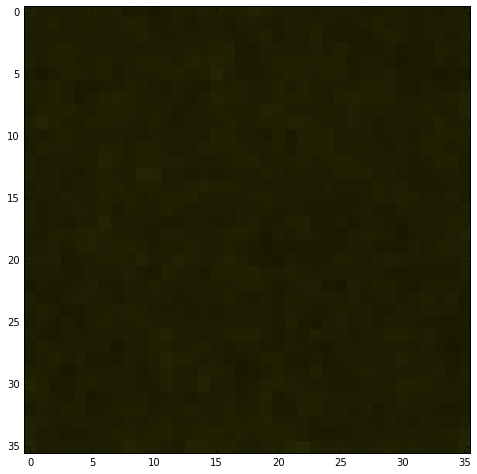

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


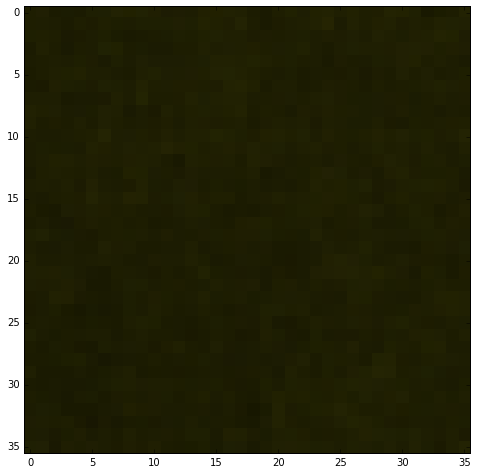

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


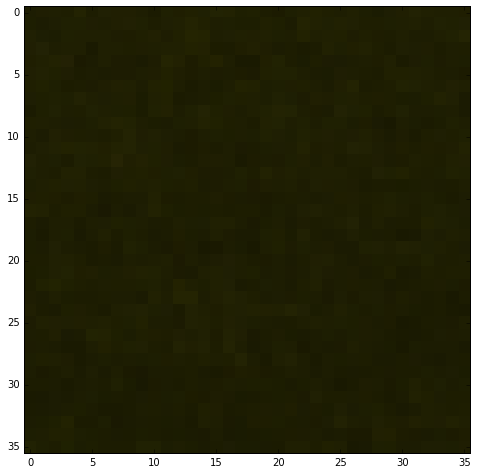

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


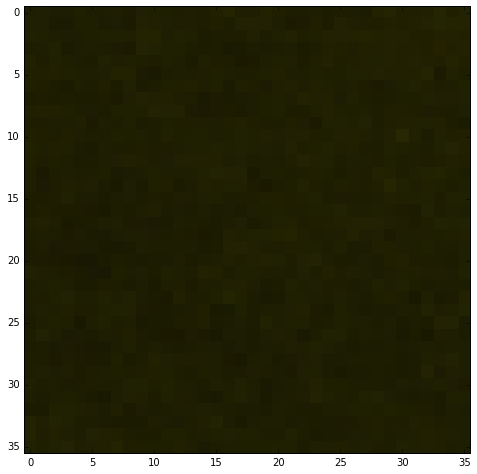

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


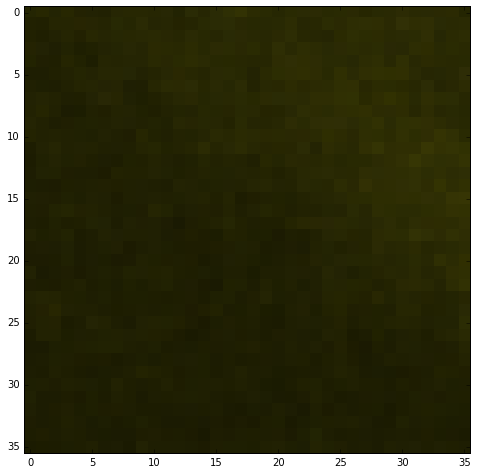

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


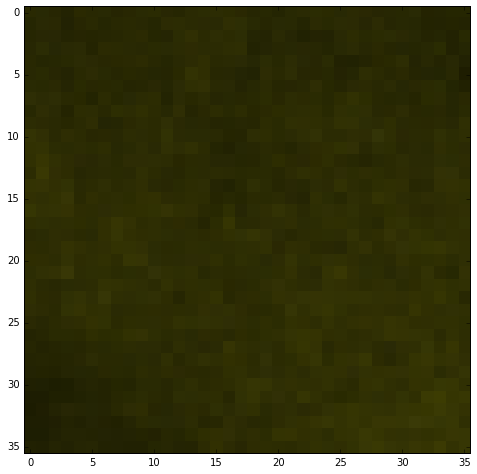

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


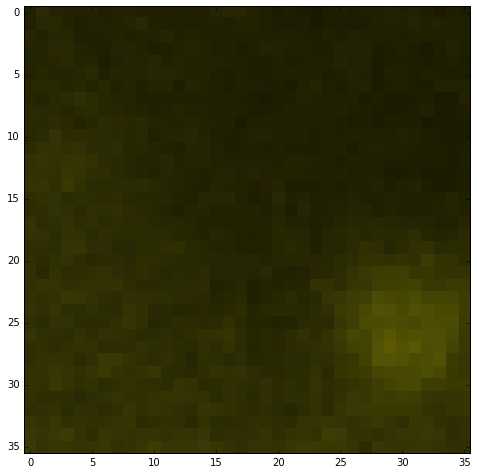

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


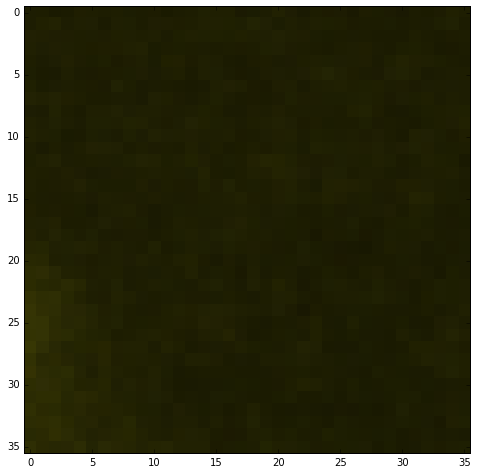

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


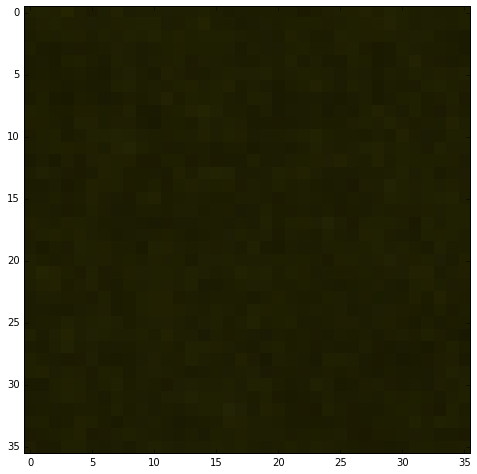

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


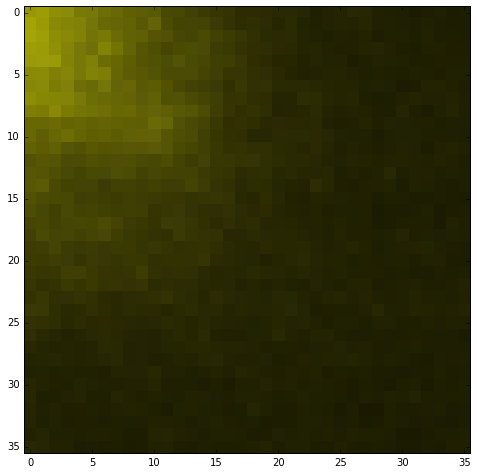

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


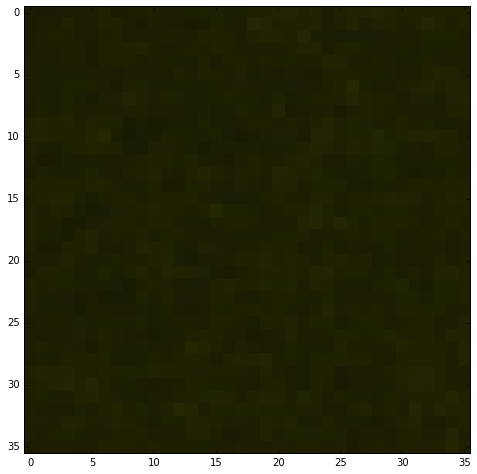

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


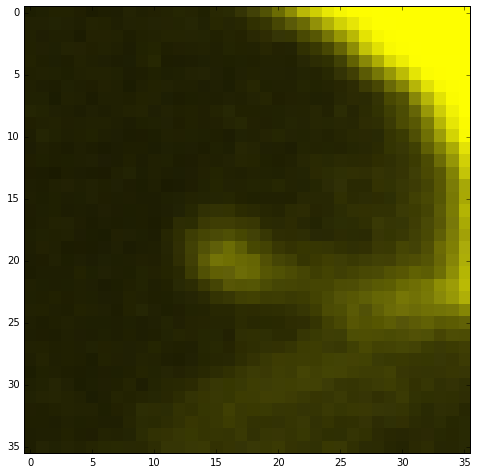

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


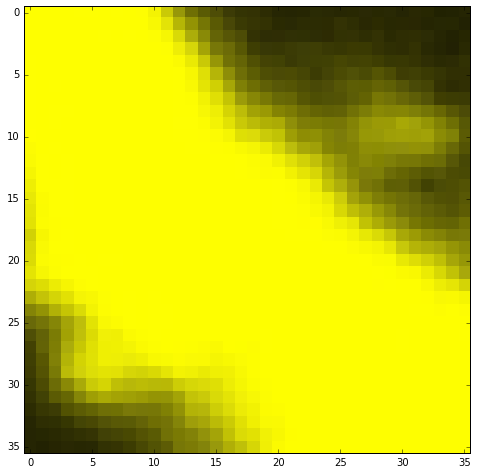

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


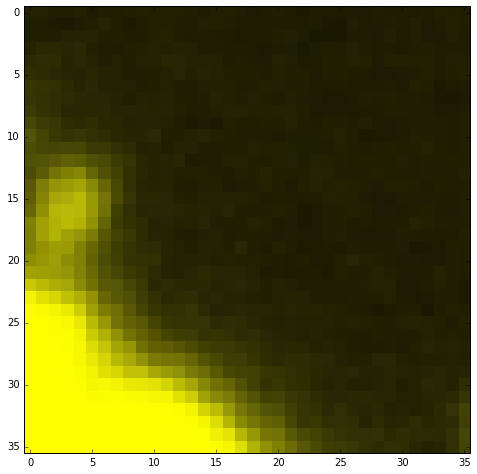

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


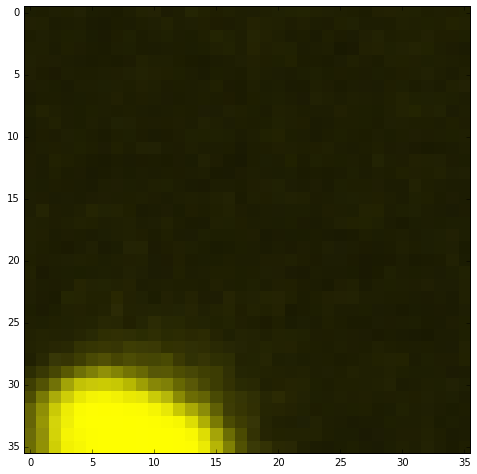

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


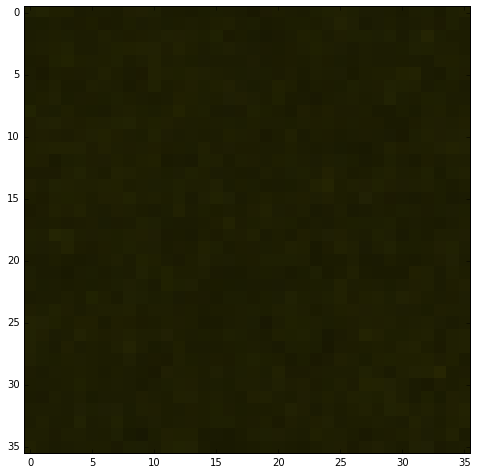

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


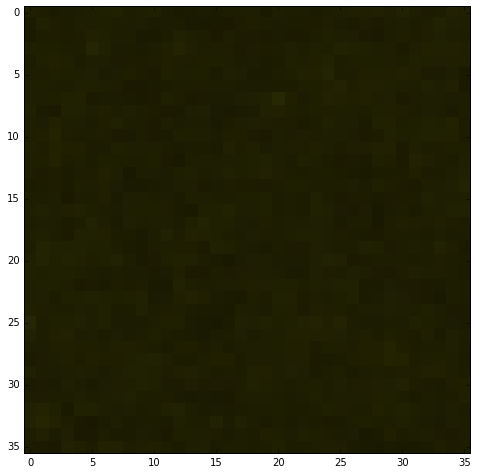

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


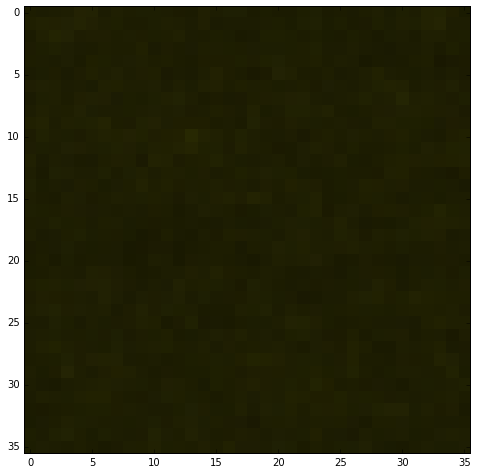

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


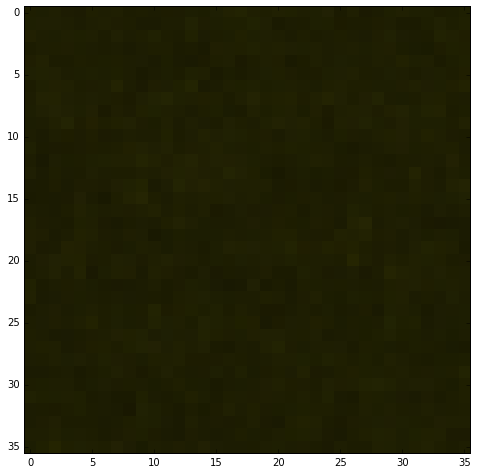

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


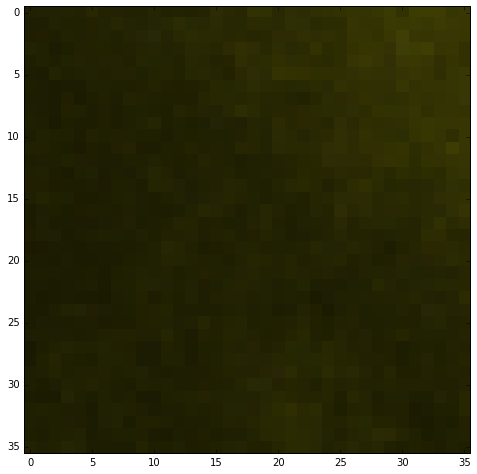

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


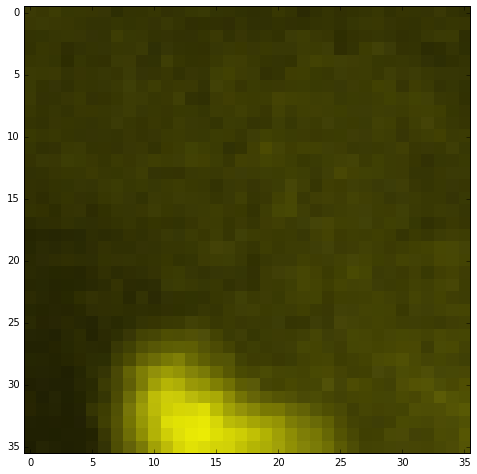

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


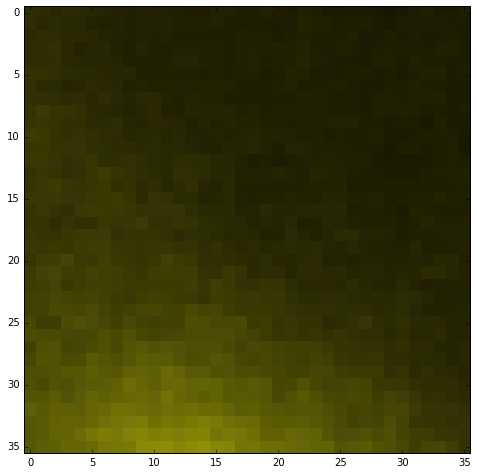

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


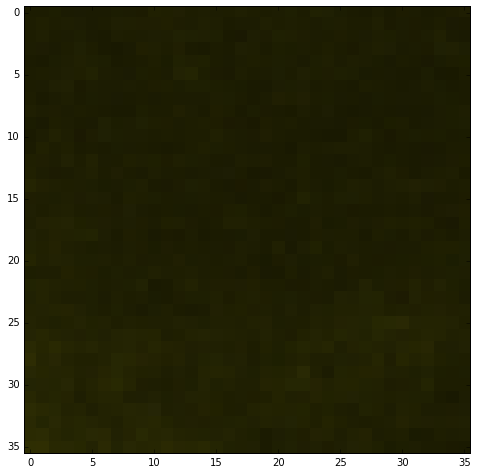

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


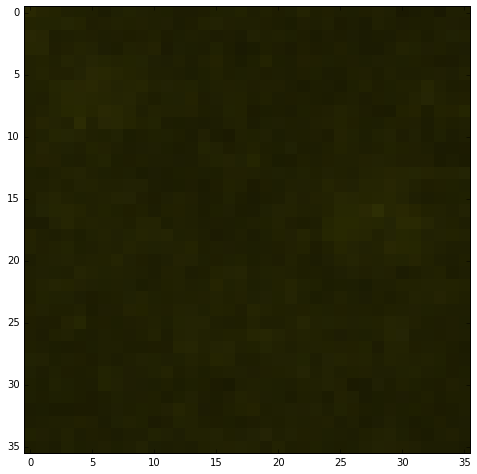

Cropped Image has shape (36, 36, 3)
This was a dendritic spine


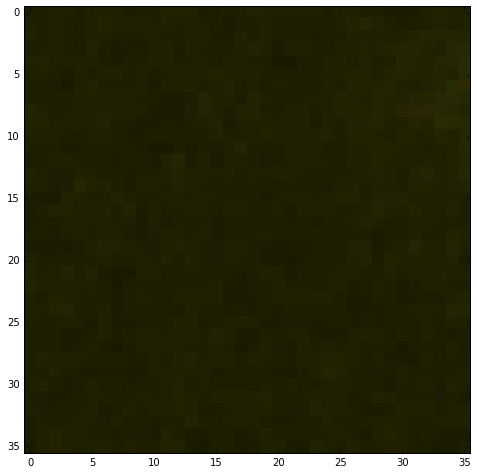

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


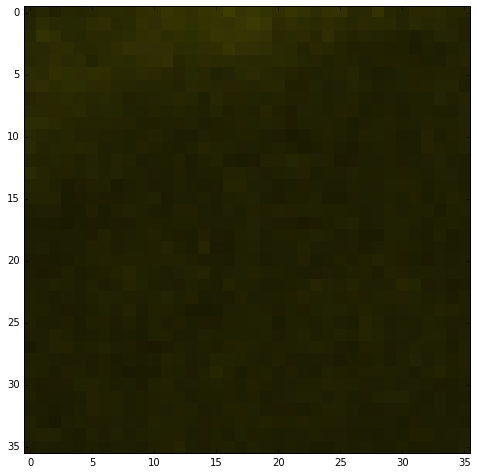

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


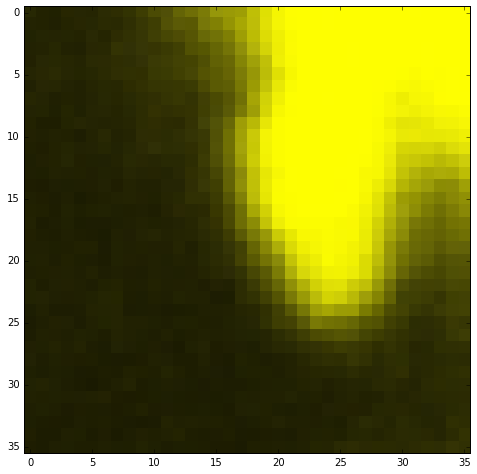

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


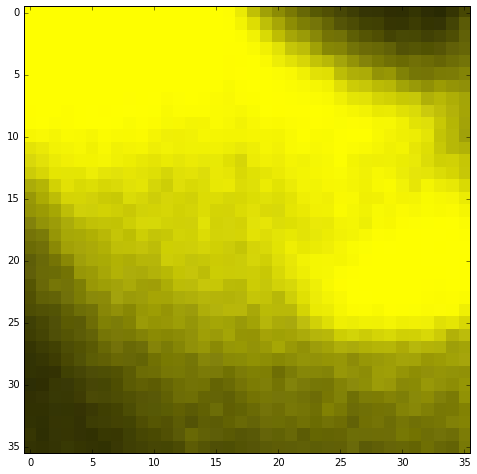

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


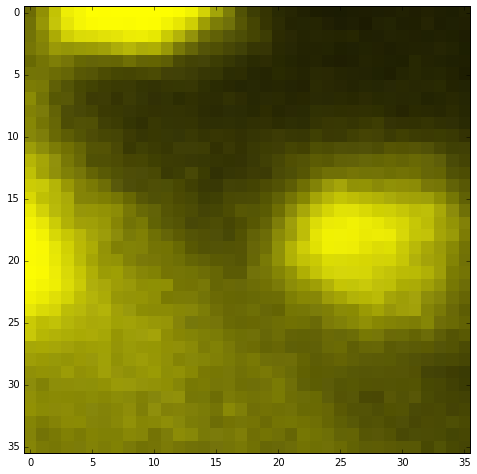

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


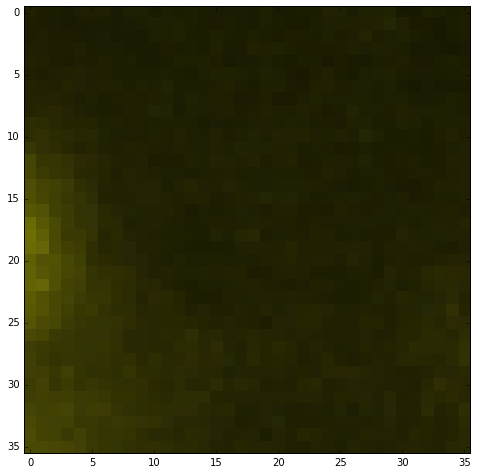

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


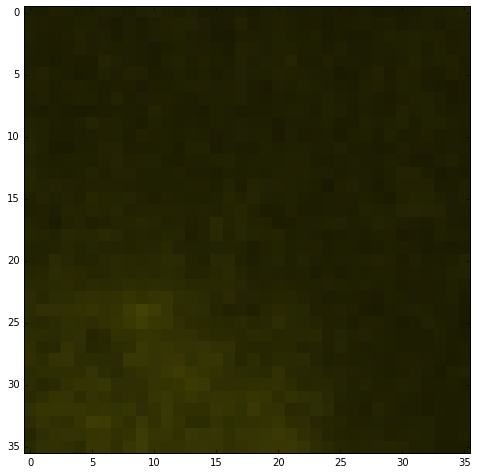

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


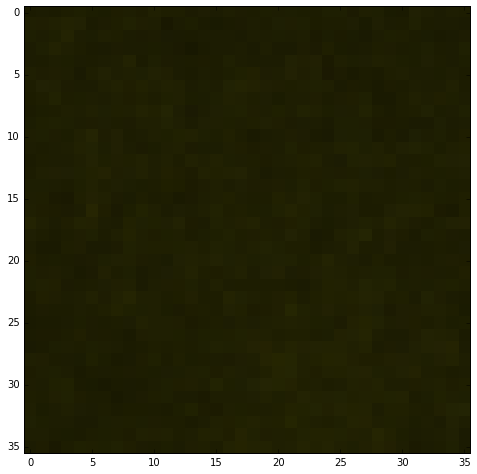

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


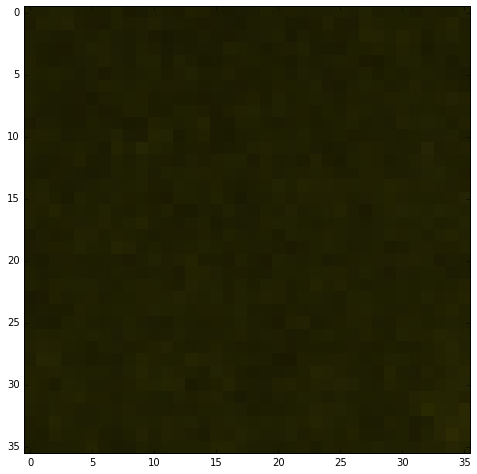

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


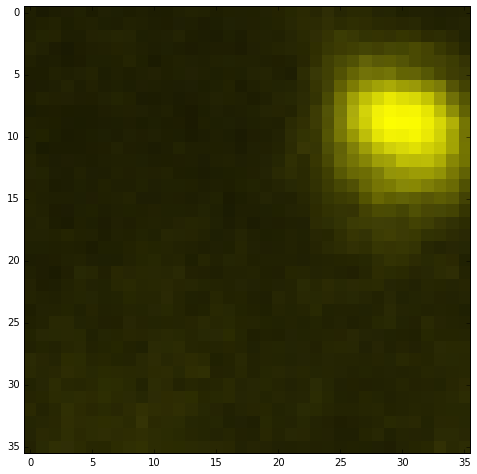

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


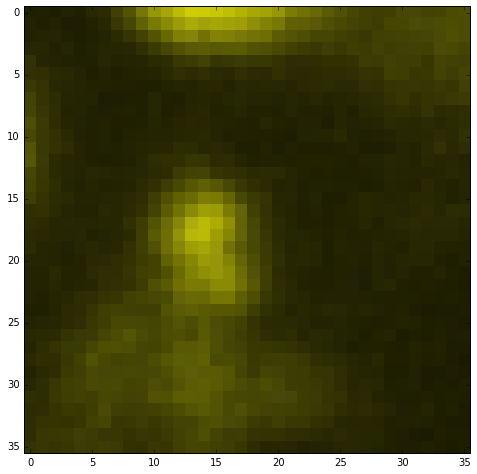

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


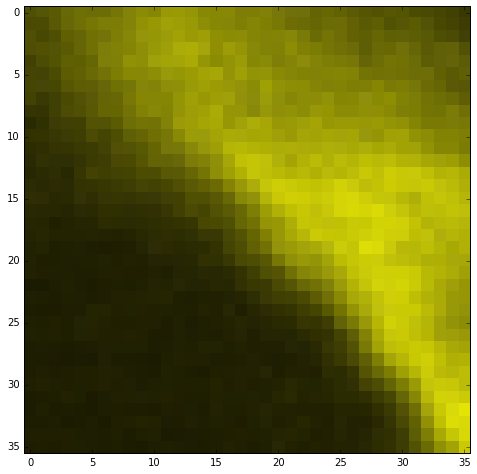

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


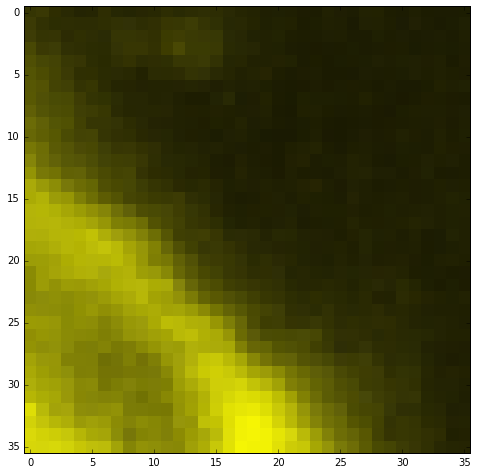

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


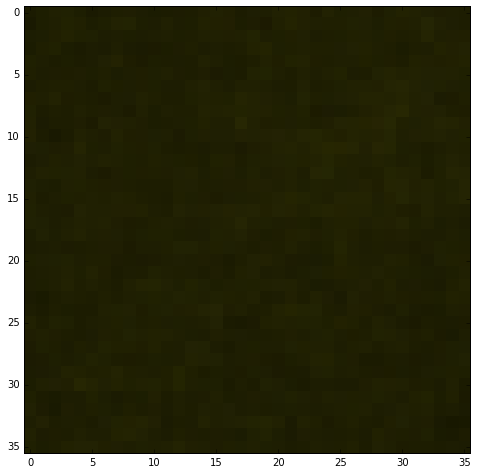

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


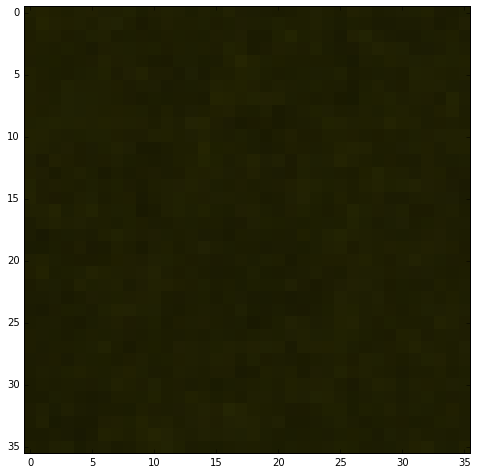

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


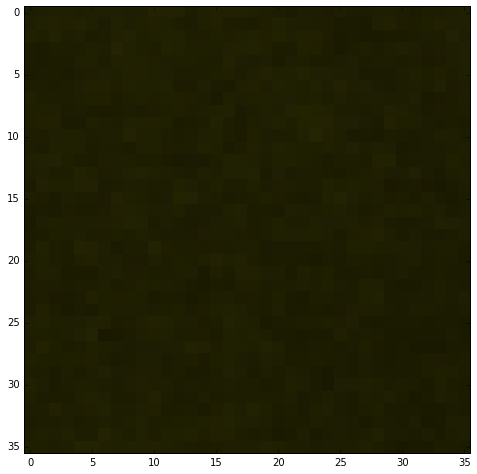

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


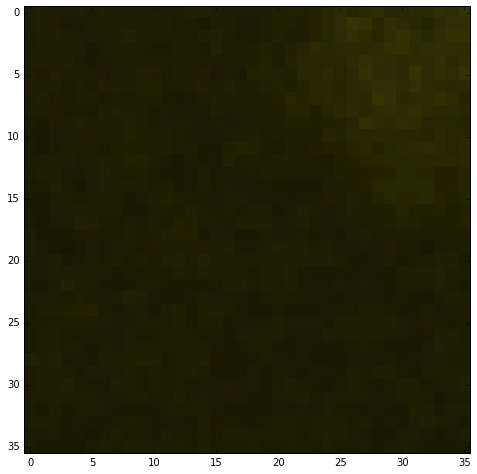

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


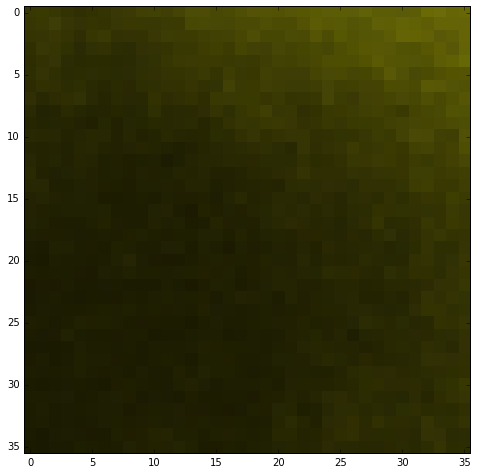

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


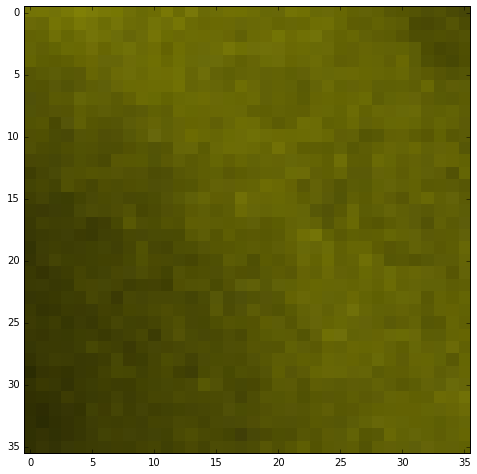

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


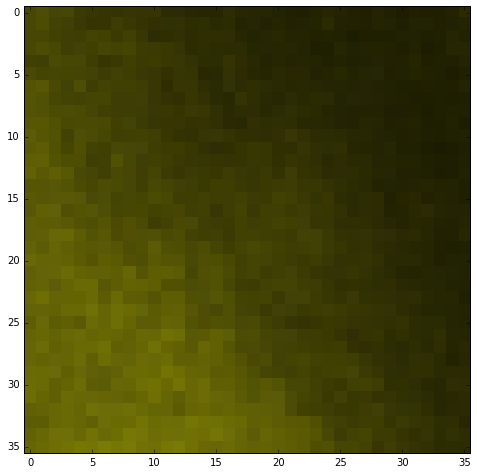

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


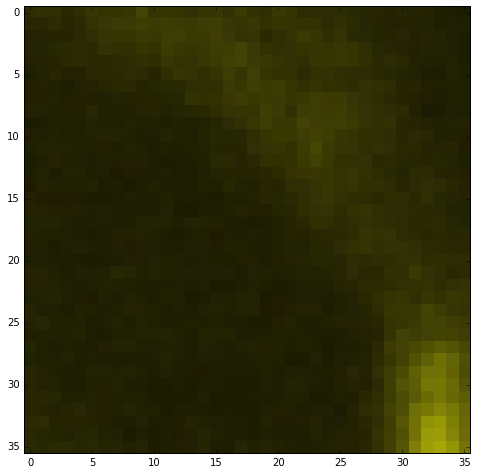

Cropped Image has shape (36, 36, 3)
This was NOT a dendritic spine


In [ ]:
image_height = 1024.0 / resize_scale
window_sz = 36
k = np.round( np.floor( image_height/ window_sz ) ).astype(np.int)
print k

for f in os.listdir( path_to_image_dir ):
    prefix = f.split(".")[0]
    print prefix
    if prefix in imageToLocations:
        path_to_specific_image = os.path.join( path_to_image_dir, f )
        im = imread( path_to_specific_image )
        im = imresize( im, (512,512,))
        plt.imshow( im.astype('uint8') )
        print 'im shape', im.shape
        subplt = plt.subplot(1,1,1)
        plt.axis('off')
        plt.gcf().set_size_inches(10, 10)
        plt.title('Examples of Dendritic Spine Microscopies')
        plt.axis('off')
        slide_one_image( im, imageToLocations[prefix], window_sz, k)
        for elem in imageToLocations[prefix]:
            print elem
            plt.scatter( elem[0], elem[1], color='red')
        plt.show()
            

In [79]:


def vis_detections(im, class_name, dets ): #, gtDetections):
    """Draw detected bounding boxes."""
    fig, ax = plt.subplots(figsize=(12, 12))
    im = im.transpose(2,1,0)
    ax.imshow(im.astype('uint8'))
    for i in dets: #gtDetections:
        if len(dets) != 0:
            bbox = i
            ax.add_patch(
                plt.Rectangle((bbox[0], bbox[2]),
                                bbox[1] - bbox[0],
                                bbox[2] - bbox[3], fill=False,
                                edgecolor="red", linewidth=3.5)
                )
            ax.text(bbox[0], bbox[2] - 2,
                    '{:s}'.format(class_name),
                    bbox=dict(facecolor='blue', alpha=0.5),
                    fontsize=14, color='white')
#         ax.add_patch(
#             plt.Rectangle((gtDetections[0], gtDetections[2]),
#                             gtDetections[1] - gtDetections[0],
#                             gtDetections[2] - gtDetections[3], fill=False,
#                             edgecolor="green", linewidth=3.5)
#             )
#         ax.text(gtDetections[0], gtDetections[2] - 2,
#                 '{:s}'.format(class_name),
#                 bbox=dict(facecolor='blue', alpha=0.5),
#                 fontsize=14, color='white')
    ax.set_title(('{} detections with').format(class_name),fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.draw()
    